In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import winsound
from sklearn import tree
from keras import regularizers
import time
import sklearn.metrics
import seaborn as sb
from mlxtend.plotting import plot_confusion_matrix

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.rc('font', size=22) #controls default text size
plt.rc('axes', titlesize=22) #fontsize of the title
plt.rc('axes', labelsize=22) #fontsize of the x and y labels
plt.rc('xtick', labelsize=22) #fontsize of the x tick labels
plt.rc('ytick', labelsize=22) #fontsize of the y tick labels
plt.rc('legend', fontsize=22) #fontsize of the legend
plt.style.use('fast')
plt.rcParams['figure.figsize'] = [10, 7]

## Dataset preparation

In [3]:
data = pd.read_csv('extracted_features.csv')
data = data.drop(['tourney_id','tourney_name'
                 ,'tourney_date','winner_id','winner_name'
                 ,'loser_id','loser_name',
                 'score','draw_size','proba_elo',
                 'w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_SvGms','w_bpSaved','w_bpFaced','w_2ndWon','l_2ndWon',
                 'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_SvGms','l_bpSaved','l_bpFaced','index'],axis=1)

In [4]:
data

surface         tourney_level winner_hand  winner_ht  winner_age  \
0        Hard                 Other           R      188.0        21.3   
1        Hard                 Other           R      178.0        20.7   
2        Hard                 Other           L      185.0        26.1   
3        Hard                 Other           L      180.0        24.2   
4        Hard                 Other           R      185.0        24.5   
...       ...                   ...         ...        ...         ...   
89358    Hard  Season-ending events           R      185.0        19.4   
89359    Hard  Season-ending events           R      185.0        19.4   
89360    Hard  Season-ending events           R      185.0        19.4   
89361    Hard  Season-ending events           R      185.0        19.4   
89362    Hard  Season-ending events           R      185.0        20.3   

      loser_hand    loser_ht  loser_age  best_of round  winner_rank  \
0              R  190.000000       26.7        3   R32        110.0   
1              R  193.000000       23.2        3   R32         80.0   
2              R  188.000000       21.5        3   R32         78.0   
3              R  180.000000       17.9        3   R32         37.0   
4              R  183.000000       16.8        3   R32         82.0   
...          ...         ...        ...      ...   ...          ...   
89358          R  185.000000       20.3        5    RR         36.0   
89359          R  184.305956       21.5        5    RR         36.0   
89360          L  180.000000       21.2        5    RR         36.0   
89361          R  184.305956       19.5        5    SF         36.0   
89362          R  185.000000       19.4        5     F        110.0   

       loser_rank  winner_tournaments_won  loser_tournaments_won  winner_aces  \
0             8.0                       0                      7     0.086037   
1             4.0                       0                      5     0.025649   
2           101.0                       0                      0     0.063127   
3           627.0                      10                      0     0.012874   
4          1059.0                       1                      0     0.022564   
...           ...                     ...                    ...          ...   
89358       115.0                       1                      0     0.081164   
89359       100.0                       1                      0     0.080609   
89360        94.0                       1                      0     0.081022   
89361        70.0                       1                      0     0.081647   
89362        36.0                       0                      1     0.113177   

       winner_double_faults  winner_first_serve_in  winner_first_serve_won  \
0                  0.042666               0.608604                0.692352   
1                  0.046771               0.602293                0.668337   
2                  0.035693               0.582596                0.710380   
3                  0.019871               0.735236                0.622764   
4                  0.035897               0.631795                0.665584   
...                     ...                    ...                     ...   
89358              0.043645               0.610260                0.735885   
89359              0.044948               0.607355                0.737615   
89360              0.044526               0.608394                0.737253   
89361              0.044373               0.608094                0.737887   
89362              0.053355               0.622474                0.729870   

       winner_second_serve_won  loser_aces  loser_double_faults  \
0                     0.475676    0.069455             0.033623   
1                     0.496206    0.083055             0.039300   
2                     0.506714    0.031285             0.020112   
3                     0.525370    0.038961             0.045455   
4                  

In [5]:
data['target'] = 1

In [6]:
s = data.sample(44681)

In [7]:
s['target'] = 0

In [8]:
def swap_columns(df, col1, col2):
    c1 = df[col1]
    c2 = df[col2]
    df[col1]=c2
    df[col2]=c1
    return df

In [9]:
s=swap_columns(s, 'winner_ht', 'loser_ht')
s=swap_columns(s, 'winner_age', 'loser_age')
s=swap_columns(s, 'winner_hand', 'loser_hand')

s=swap_columns(s, 'winner_rank', 'loser_rank')
s=swap_columns(s, 'winner_elo', 'loser_elo')
s=swap_columns(s, 'winner_glicko', 'loser_glicko')
s=swap_columns(s, 'winner_RD', 'loser_RD')

s=swap_columns(s, 'winner_tournaments_won', 'loser_tournaments_won')
s=swap_columns(s, 'winner_games_played', 'loser_games_played')
s=swap_columns(s, 'winner_games_won', 'loser_games_won')
s=swap_columns(s, 'winner_games_round_won', 'loser_games_round_won')
s=swap_columns(s, 'winner_games_tourney_won', 'loser_games_tourney_won')
s=swap_columns(s, 'winner_games_surface_won', 'loser_games_surface_won')
s=swap_columns(s, 'winner_games_opponent_won', 'loser_games_opponent_won')
s=swap_columns(s, 'winner_games_hand_won', 'loser_games_hand_won')
s=swap_columns(s, 'winner_matches_won', 'loser_matches_won')
s=swap_columns(s, 'winner_matches_lost', 'loser_matches_lost')

s=swap_columns(s, 'winner_consecutive_matches_won', 'loser_consecutive_matches_won')
s=swap_columns(s, 'winner_consecutive_matches_lost', 'loser_consecutive_matches_lost')
s=swap_columns(s, 'winner_weeks_inactive', 'loser_weeks_inactive')
s=swap_columns(s, 'winner_games_played_last_weeks', 'loser_games_played_last_weeks')

s=swap_columns(s, 'winner_first_serve_in', 'loser_first_serve_in')
s=swap_columns(s, 'winner_first_serve_won', 'loser_first_serve_won')
s=swap_columns(s, 'winner_second_serve_won', 'loser_second_serve_won')
s=swap_columns(s, 'winner_aces', 'loser_aces')
s=swap_columns(s, 'winner_double_faults', 'loser_double_faults')

s=swap_columns(s, 'winner_break_points_converted', 'loser_break_points_converted')
s=swap_columns(s, 'winner_first_serve_return_won', 'loser_first_serve_return_won')
s=swap_columns(s, 'winner_second_serve_return_won', 'loser_second_serve_return_won')

s=swap_columns(s, 'winner_break_points_saved', 'loser_break_points_saved')
s=swap_columns(s, 'winner_tiebreaks_won_year', 'loser_tiebreaks_won_year')
s=swap_columns(s, 'winner_home', 'loser_home')

In [10]:
data.update(s)

In [11]:
data

surface         tourney_level winner_hand   winner_ht  winner_age  \
0        Hard                 Other           R  188.000000        21.3   
1        Hard                 Other           R  193.000000        23.2   
2        Hard                 Other           L  185.000000        26.1   
3        Hard                 Other           R  180.000000        17.9   
4        Hard                 Other           R  185.000000        24.5   
...       ...                   ...         ...         ...         ...   
89358    Hard  Season-ending events           R  185.000000        20.3   
89359    Hard  Season-ending events           R  184.305956        21.5   
89360    Hard  Season-ending events           R  185.000000        19.4   
89361    Hard  Season-ending events           R  184.305956        19.5   
89362    Hard  Season-ending events           R  185.000000        19.4   

      loser_hand  loser_ht  loser_age  best_of round  winner_rank  loser_rank  \
0              R     190.0       26.7      3.0   R32        110.0         8.0   
1              R     178.0       20.7      3.0   R32          4.0        80.0   
2              R     188.0       21.5      3.0   R32         78.0       101.0   
3              L     180.0       24.2      3.0   R32        627.0        37.0   
4              R     183.0       16.8      3.0   R32         82.0      1059.0   
...          ...       ...        ...      ...   ...          ...         ...   
89358          R     185.0       19.4      5.0    RR        115.0        36.0   
89359          R     185.0       19.4      5.0    RR        100.0        36.0   
89360          L     180.0       21.2      5.0    RR         36.0        94.0   
89361          R     185.0       19.4      5.0    SF         70.0        36.0   
89362          R     185.0       20.3      5.0     F         36.0       110.0   

       winner_tournaments_won  loser_tournaments_won  winner_aces  \
0                         0.0                    7.0     0.086037   
1                         5.0                    0.0     0.083055   
2                         0.0                    0.0     0.063127   
3                         0.0                   10.0     0.038961   
4                         1.0                    0.0     0.022564   
...                       ...                    ...          ...   
89358                     0.0                    1.0     0.036364   
89359                     0.0                    1.0     0.051724   
89360                     1.0                    0.0     0.081022   
89361                     0.0                    1.0     0.038742   
89362                     1.0                    0.0     0.082785   

       winner_double_faults  winner_first_serve_in  winner_first_serve_won  \
0                  0.042666               0.608604                0.692352   
1                  0.039300               0.583930                0.758311   
2                  0.035693               0.582596                0.710380   
3                  0.045455               0.571429                0.647727   
4                  0.035897               0.631795                0.665584   
...                     ...                    ...                     ...   
89358              0.023636               0.676364                0.642473   
89359              0.034483               0.571429                0.698276   
89360              0.044526               0.608394                0.737253   
89361              0.035290               0.594553                0.672903   
89362              0.044683               0.608937                0.741183   

       winner_second_serve_won  loser_aces  loser_double_faults  \
0                     0.475676    0.069455             0.033623   
1                     0.557553    0.025649             0.046771   
2                     0.506714    0.031285             0.020112   
3                     0.439394    0.012874             0.019871   
4                     0.470752 

### Symmetric representation

In [12]:
data_symmetric = pd.DataFrame()

In [13]:
data_symmetric['surface'] = data['surface']
data_symmetric['tourney_level'] = data['tourney_level']
data_symmetric['round'] = data['round']
data_symmetric['best_of'] = data['best_of']
data_symmetric['year'] = data['year']

data_symmetric['height'] = data['winner_ht']-data['loser_ht']
data_symmetric['age'] = data['winner_age']-data['loser_age']
data_symmetric['player1_hand'] = data['winner_hand']
data_symmetric['player2_hand'] = data['loser_hand']

data_symmetric['rank'] = data['winner_rank']-data['loser_rank']
data_symmetric['elo'] = data['winner_elo']-data['loser_elo']
data_symmetric['glicko'] = data['winner_glicko']-data['loser_glicko']
data_symmetric['RD'] = data['winner_RD']-data['loser_RD']
data_symmetric['tournaments_won'] = data['winner_tournaments_won']-data['loser_tournaments_won']
data_symmetric['games_played'] = data['winner_games_played']-data['loser_games_played']
data_symmetric['games_won'] = data['winner_games_won']-data['loser_games_won']
data_symmetric['games_round_won'] = data['winner_games_round_won']-data['loser_games_round_won']
data_symmetric['games_tourney_won'] = data['winner_games_tourney_won']-data['loser_games_tourney_won']
data_symmetric['games_surface_won'] = data['winner_games_surface_won']-data['loser_games_surface_won']
data_symmetric['games_opponent_won'] = data['winner_games_opponent_won']-data['loser_games_opponent_won']
data_symmetric['games_hand_won'] = data['winner_games_hand_won']-data['loser_games_hand_won']
data_symmetric['matches_won'] = data['winner_matches_won']-data['loser_matches_won']
data_symmetric['matches_lost'] = data['winner_matches_lost']-data['loser_matches_lost']

data_symmetric['consecutive_matches_won'] = data['winner_consecutive_matches_won']-data['loser_consecutive_matches_won']
data_symmetric['consecutive_matches_lost'] = data['winner_consecutive_matches_lost']-data['loser_consecutive_matches_lost']
data_symmetric['weeks_inactive'] = data['winner_weeks_inactive']-data['loser_weeks_inactive']
data_symmetric['games_played_last_weeks'] = data['winner_games_played_last_weeks']-data['loser_games_played_last_weeks']

data_symmetric['first_serve_in'] = data['winner_first_serve_in']-data['loser_first_serve_in']
data_symmetric['first_serve_won'] = data['winner_first_serve_won']-data['loser_first_serve_won']
data_symmetric['second_serve_won'] = data['winner_second_serve_won']-data['loser_second_serve_won']
data_symmetric['aces'] = data['winner_aces']-data['loser_aces']
data_symmetric['double_faults'] = data['winner_double_faults']-data['loser_double_faults']

data_symmetric['break_points_converted'] = data['winner_break_points_converted']-data['loser_break_points_converted']
data_symmetric['first_serve_return_won'] = data['winner_first_serve_return_won']-data['loser_first_serve_return_won']
data_symmetric['second_serve_return_won'] = data['winner_second_serve_return_won']-data['loser_second_serve_return_won']

data_symmetric['break_points_saved'] = data['winner_break_points_saved']-data['loser_break_points_saved']
data_symmetric['tiebreaks_won'] = data['winner_tiebreaks_won_year']-data['loser_tiebreaks_won_year']
data_symmetric['player1_home'] = data['winner_home']
data_symmetric['player2_home'] = data['loser_home']

data_symmetric['target'] = data['target']

In [14]:
data_symmetric

surface         tourney_level round  best_of    year     height  age  \
0        Hard                 Other   R32      3.0  1992.0  -2.000000 -5.4   
1        Hard                 Other   R32      3.0  1992.0  15.000000  2.5   
2        Hard                 Other   R32      3.0  1992.0  -3.000000  4.6   
3        Hard                 Other   R32      3.0  1992.0   0.000000 -6.3   
4        Hard                 Other   R32      3.0  1992.0   2.000000  7.7   
...       ...                   ...   ...      ...     ...        ...  ...   
89358    Hard  Season-ending events    RR      5.0  2023.0   0.000000  0.9   
89359    Hard  Season-ending events    RR      5.0  2023.0  -0.694044  2.1   
89360    Hard  Season-ending events    RR      5.0  2023.0   5.000000 -1.8   
89361    Hard  Season-ending events    SF      5.0  2023.0  -0.694044  0.1   
89362    Hard  Season-ending events     F      5.0  2023.0   0.000000 -0.9   

      player1_hand player2_hand   rank         elo      glicko          RD  \
0                R            R  102.0 -391.629010 -354.204836   20.591926   
1                R            R  -76.0  304.368445  259.657966   -7.811765   
2                L            R  -23.0    6.522715   15.263198    1.564591   
3                R            L  590.0 -407.913914 -630.733700  210.447203   
4                R            R -977.0  357.669015  523.845029 -182.323633   
...            ...          ...    ...         ...         ...         ...   
89358            R            R   79.0 -260.293008 -420.628507  107.096833   
89359            R            R   64.0 -168.105313 -195.917047   46.780356   
89360            R            L  -58.0   24.557854   28.750428   -9.400948   
89361            R            R   34.0 -198.764456 -197.976984   15.325615   
89362            R            R  -74.0  155.311680   59.707790  -40.267675   

       tournaments_won  games_played  games_won  games_round_won  \
0                 -7.0       -1079.0  -0.086114        -0.070326   
1                  5.0        1153.0   0.059686         0.052809   
2                  0.0         269.0  -0.007262        -0.002710   
3                -10.0       -1087.0  -0.126609        -0.035517   
4                  1.0         370.0   0.235598         0.177768   
...                ...           ...        ...              ...   
89358             -1.0        -635.0  -0.097883         0.416667   
89359             -1.0        -582.0  -0.005795         0.053571   
89360              1.0         378.0   0.024076         0.016946   
89361             -1.0         -83.0  -0.050281        -0.445378   
89362              1.0         514.0   0.023635         0.512195   

       games_tourney_won  games_surface_won  games_opponent_won  \
0              -0.529412          -0.059501            0.000000   
1               0.188209           0.047307            0.333333   
2              -0.022142          -0.020700            0.000000   
3               0.000000          -0.106503            0.000000   
4               0.000000           0.227009            0.000000   
...                  ...                ...                 ...   
89358           0.416667          -0.061555            0.000000   
89359           0.053571          -0.029331            0.000000   
89360           0.045056           0.004641           -0.076923   
89361          -0.044478          -0.057989            0.000000   
89362           0.011905           0.003494            0.000000   

       games_hand_won  matches_won  matches_lost  consecutive_matches_won  \
0           -0.040020       -144.0        -100.0                      0.0   
1            0.052457         62.0           4.0                      0.0   
2            0.037070         19.0          29.0                      0.0   
3           -0.341111       -187.0        -101.0                      0.0   
4            0.185153         40.0          50.0                      4.0   
...               ...          ...           ...

### Correlation matrix

C:\Users\krych\AppData\Local\Temp\ipykernel_15684\397567727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data_symmetric.corr().round(2),cmap='coolwarm',annot=True)


<Axes: >

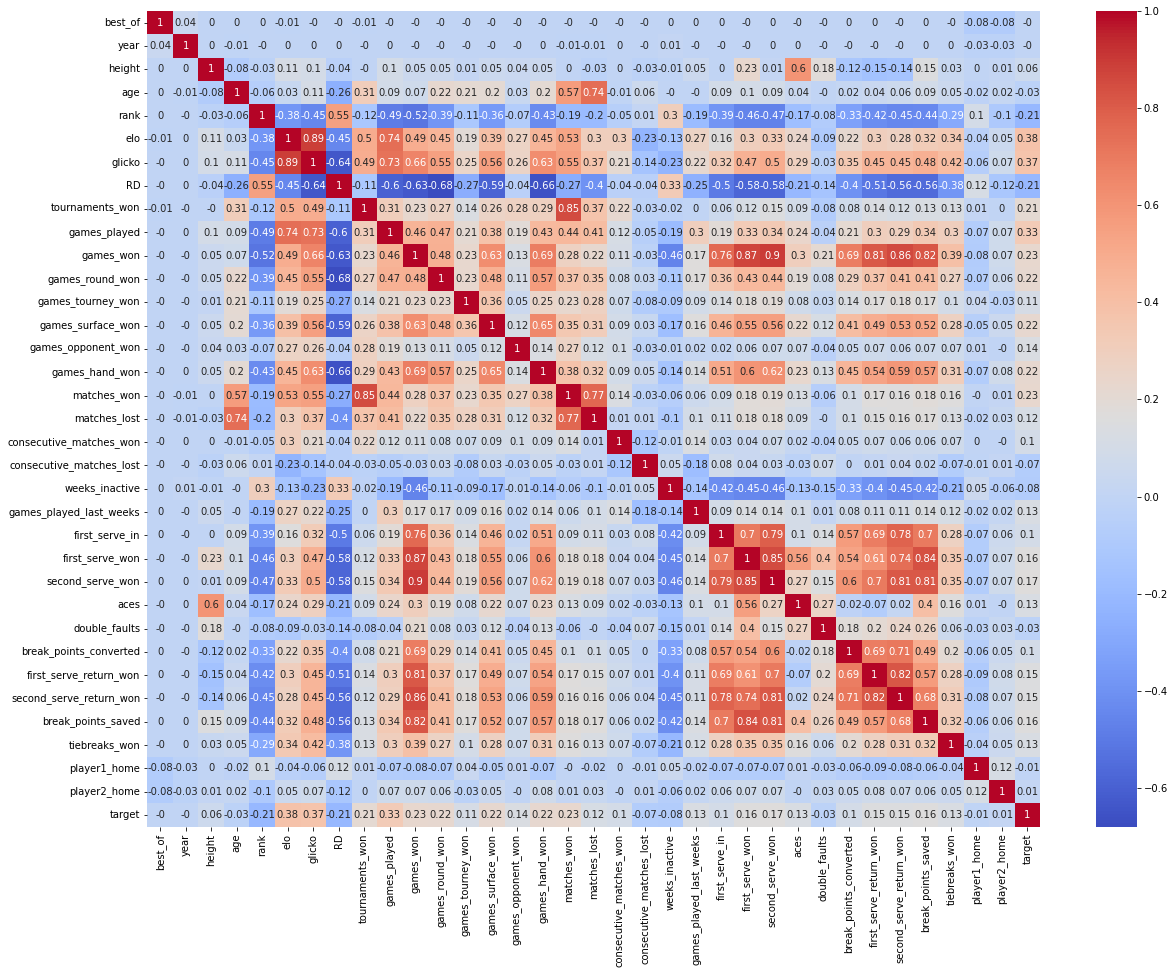

In [56]:
plt.figure(figsize=(20,15))
sn.heatmap(data_symmetric.corr().round(2),cmap='coolwarm',annot=True)

### Preparing 2 datasets

In [15]:
#1 with categorical columns
data_symmetric.dtypes

surface                      object
tourney_level                object
round                        object
best_of                     float64
year                        float64
height                      float64
age                         float64
player1_hand                 object
player2_hand                 object
rank                        float64
elo                         float64
glicko                      float64
RD                          float64
tournaments_won             float64
games_played                float64
games_won                   float64
games_round_won             float64
games_tourney_won           float64
games_surface_won           float64
games_opponent_won          float64
games_hand_won              float64
matches_won                 float64
matches_lost                float64
consecutive_matches_won     float64
consecutive_matches_lost    float64
weeks_inactive              float64
games_played_last_weeks     float64
first_serve_in              

In [4]:
for col in ['surface', 'tourney_level', 'round', 'player1_hand','player2_hand']:
    data_symmetric[col] = data_symmetric[col].astype('category')

In [17]:
for col in ['player1_home', 'player2_home', 'best_of', 'year','rank','tournaments_won','games_played','matches_won','target',
           'matches_lost','consecutive_matches_won','consecutive_matches_lost','weeks_inactive','games_played_last_weeks']:
    data_symmetric[col] = data_symmetric[col].astype('int64')

In [18]:
data_symmetric['Y'] = data_symmetric['year']

In [19]:
#2 with encoding and scaling

In [20]:
num_cols = ['best_of', 'year', 'height', 'age',
       'rank', 'elo', 'glicko', 'RD', 'tournaments_won', 'games_played',
       'games_won', 'games_round_won', 'games_tourney_won',
       'games_surface_won', 'games_opponent_won', 'games_hand_won',
       'matches_won', 'matches_lost', 'consecutive_matches_won',
       'consecutive_matches_lost', 'weeks_inactive', 'games_played_last_weeks',
       'first_serve_in', 'first_serve_won',
       'second_serve_won', 'aces', 'double_faults', 'break_points_converted',
       'first_serve_return_won', 'second_serve_return_won',
       'break_points_saved', 'tiebreaks_won']

In [4]:
cat_cols = ['surface','tourney_level','round','player1_hand','player2_hand']

In [22]:
data_symmetric_enc = data_symmetric.copy()

In [23]:
for col in num_cols:
    data_symmetric_enc[col] = stats.zscore(data_symmetric_enc[col])

In [24]:
data_symmetric_enc = pd.get_dummies(data_symmetric_enc)

In [26]:
data_symmetric.to_csv('data_symmetric.csv', index=False)
data_symmetric_enc.to_csv('data_symmetric_enc.csv', index=False)

In [3]:
data_symmetric = pd.read_csv('data_symmetric.csv')
data_symmetric_enc = pd.read_csv('data_symmetric_enc.csv')

## Window size

In [21]:
lr = LogisticRegression(max_iter=600,penalty='none')

In [45]:
rf = RandomForestClassifier()

In [46]:
xg = xgb.XGBClassifier(enable_categorical=True)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
sv = svm.SVC()

In [49]:
gnb = GaussianNB()

In [50]:
dt = tree.DecisionTreeClassifier()

In [51]:
def check_performance(clf, df, test_year):
    tests = []
    trains = []
    for k in range(3,9):
        train = df[(df['Y']<test_year) & (df['Y']>=test_year-k)]
        test = df[df['Y']==test_year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        tests.append(test_score)

    
    return tests

In [52]:
def check_performance_NN(clf, df, test_year):
    tests = []
    trains = []
    for k in range(3,9):
        train = df[(df['Y']<test_year) & (df['Y']>=test_year-k)]
        test = df[df['Y']==test_year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        clf.fit(X_train, y_train, epochs=30, batch_size=32)
        test_score = clf.evaluate(X_test,  y_test)[1]
        tests.append(test_score)

    
    return tests

In [6]:
def check_window(clf, df):
    ts = []
    for year in range(2001,2006):
        t = check_performance(clf, df, year)
        ts.append(t)
        
    return np.average(np.asarray(ts, dtype=np.float64), axis=0)

In [54]:
def check_window_NN(clf, df):
    ts = []
    for year in range(2001,2006):
        t = check_performance_NN(clf, df, year)
        ts.append(t)
        
    return np.average(np.asarray(ts, dtype=np.float64), axis=0)

In [97]:
lr_test = check_window(lr, data_symmetric_enc)

In [98]:
rf_test = check_window(rf, data_symmetric_enc)

In [99]:
xg_test = check_window(xg, data_symmetric)

In [100]:
knn_test = check_window(knn, data_symmetric_enc)

In [101]:
svm_test = check_window(sv, data_symmetric_enc)

In [102]:
nb_test = check_window(gnb, data_symmetric_enc)

In [103]:
dt_test = check_window(dt, data_symmetric_enc)

In [95]:
res = []
for k in range(3,9):   
    test_scores = []
    df = data_symmetric_enc
    for year in range(2001,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-k)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_all]
        X_train = X_train[columns_all]
        
        ann = Sequential()
        ann.add(Dense(64, activation="tanh"))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
    res.append(np.mean(test_scores))

Epoch 1/40
283/283 [==============================] - 1s 1ms/step - loss: 0.6347 - accuracy: 0.6426
Epoch 2/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.6507
Epoch 3/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6547
Epoch 4/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.6565
Epoch 5/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6588
Epoch 6/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6576
Epoch 7/40
283/283 [==============================] - 0s 984us/step - loss: 0.6154 - accuracy: 0.6553
Epoch 8/40
283/283 [==============================] - 0s 987us/step - loss: 0.6136 - accuracy: 0.6614
Epoch 9/40
283/283 [==============================] - 0s 980us/step - loss: 0.6125 - accuracy: 0.6628
Epoch 10/40
283/283 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 

90/90 [==============================] - 0s 874us/step - loss: 0.6568 - accuracy: 0.6431
Epoch 1/40
261/261 [==============================] - 1s 1ms/step - loss: 0.6325 - accuracy: 0.6401
Epoch 2/40
261/261 [==============================] - 0s 978us/step - loss: 0.6165 - accuracy: 0.6589
Epoch 3/40
261/261 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6632
Epoch 4/40
261/261 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6629
Epoch 5/40
261/261 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6680
Epoch 6/40
261/261 [==============================] - 0s 986us/step - loss: 0.6062 - accuracy: 0.6662
Epoch 7/40
261/261 [==============================] - 0s 990us/step - loss: 0.6042 - accuracy: 0.6663
Epoch 8/40
261/261 [==============================] - 0s 990us/step - loss: 0.6027 - accuracy: 0.6684
Epoch 9/40
261/261 [==============================] - 0s 991us/step - loss: 0.6010 - accuracy: 0.6703
E

382/382 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7233
Epoch 40/40
94/94 [==============================] - 0s 903us/step - loss: 0.6578 - accuracy: 0.6463
Epoch 1/40
377/377 [==============================] - 1s 1ms/step - loss: 0.6346 - accuracy: 0.6444
Epoch 2/40
377/377 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.6503
Epoch 3/40
377/377 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6521
Epoch 4/40
377/377 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6541
Epoch 5/40
377/377 [==============================] - 0s 997us/step - loss: 0.6174 - accuracy: 0.6576
Epoch 6/40
377/377 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6611
Epoch 7/40
377/377 [==============================] - 0s 995us/step - loss: 0.6136 - accuracy: 0.6599
Epoch 8/40
377/377 [==============================] - 0s 995us/step - loss: 0.6114 - accuracy: 0.6602
Epoc

355/355 [==============================] - 0s 997us/step - loss: 0.5408 - accuracy: 0.7210
Epoch 36/40
355/355 [==============================] - 0s 994us/step - loss: 0.5393 - accuracy: 0.7231
Epoch 37/40
355/355 [==============================] - 0s 997us/step - loss: 0.5369 - accuracy: 0.7192
Epoch 38/40
355/355 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7227
Epoch 39/40
355/355 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7260
Epoch 40/40
89/89 [==============================] - 0s 873us/step - loss: 0.6060 - accuracy: 0.6685
Epoch 1/40
489/489 [==============================] - 1s 1ms/step - loss: 0.6295 - accuracy: 0.6487
Epoch 2/40
489/489 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.6559
Epoch 3/40
489/489 [==============================] - 0s 991us/step - loss: 0.6170 - accuracy: 0.6606
Epoch 4/40
489/489 [==============================] - 0s 1000us/step - loss: 0.6154 - accuracy: 0.

449/449 [==============================] - 0s 982us/step - loss: 0.5557 - accuracy: 0.7079
Epoch 32/40
449/449 [==============================] - 0s 993us/step - loss: 0.5530 - accuracy: 0.7115
Epoch 33/40
449/449 [==============================] - 0s 982us/step - loss: 0.5498 - accuracy: 0.7150
Epoch 34/40
449/449 [==============================] - 0s 989us/step - loss: 0.5485 - accuracy: 0.7133
Epoch 35/40
449/449 [==============================] - 0s 997us/step - loss: 0.5469 - accuracy: 0.7192
Epoch 36/40
449/449 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7153
Epoch 37/40
449/449 [==============================] - 0s 989us/step - loss: 0.5403 - accuracy: 0.7232
Epoch 38/40
449/449 [==============================] - 0s 1000us/step - loss: 0.5401 - accuracy: 0.7220
Epoch 39/40
449/449 [==============================] - 0s 988us/step - loss: 0.5374 - accuracy: 0.7212
Epoch 40/40
90/90 [==============================] - 0s 886us/step - loss: 0.6552 - ac

562/562 [==============================] - 1s 1ms/step - loss: 0.5691 - accuracy: 0.6968
Epoch 28/40
562/562 [==============================] - 1s 996us/step - loss: 0.5675 - accuracy: 0.7013
Epoch 29/40
562/562 [==============================] - 1s 992us/step - loss: 0.5658 - accuracy: 0.7006
Epoch 30/40
562/562 [==============================] - 1s 973us/step - loss: 0.5645 - accuracy: 0.6998
Epoch 31/40
562/562 [==============================] - 1s 988us/step - loss: 0.5619 - accuracy: 0.7032
Epoch 32/40
562/562 [==============================] - 1s 981us/step - loss: 0.5598 - accuracy: 0.7031
Epoch 33/40
562/562 [==============================] - 1s 996us/step - loss: 0.5596 - accuracy: 0.7033
Epoch 34/40
562/562 [==============================] - 1s 990us/step - loss: 0.5561 - accuracy: 0.7094
Epoch 35/40
562/562 [==============================] - 1s 985us/step - loss: 0.5541 - accuracy: 0.7073
Epoch 36/40
562/562 [==============================] - 1s 983us/step - loss: 0.5520 - a

689/689 [==============================] - 1s 1ms/step - loss: 0.5800 - accuracy: 0.6888
Epoch 24/40
689/689 [==============================] - 1s 1ms/step - loss: 0.5795 - accuracy: 0.6872
Epoch 25/40
689/689 [==============================] - 1s 1ms/step - loss: 0.5772 - accuracy: 0.6893
Epoch 26/40
689/689 [==============================] - 1s 987us/step - loss: 0.5748 - accuracy: 0.6925
Epoch 27/40
689/689 [==============================] - 1s 1ms/step - loss: 0.5739 - accuracy: 0.6938
Epoch 28/40
689/689 [==============================] - 1s 992us/step - loss: 0.5718 - accuracy: 0.6966
Epoch 29/40
689/689 [==============================] - 1s 992us/step - loss: 0.5700 - accuracy: 0.6958
Epoch 30/40
689/689 [==============================] - 1s 996us/step - loss: 0.5689 - accuracy: 0.6991
Epoch 31/40
689/689 [==============================] - 1s 996us/step - loss: 0.5676 - accuracy: 0.7009
Epoch 32/40
689/689 [==============================] - 1s 1ms/step - loss: 0.5654 - accuracy:

817/817 [==============================] - 1s 985us/step - loss: 0.5863 - accuracy: 0.6860
Epoch 20/40
817/817 [==============================] - 1s 980us/step - loss: 0.5851 - accuracy: 0.6848
Epoch 21/40
817/817 [==============================] - 1s 975us/step - loss: 0.5838 - accuracy: 0.6886
Epoch 22/40
817/817 [==============================] - 1s 986us/step - loss: 0.5823 - accuracy: 0.6867
Epoch 23/40
817/817 [==============================] - 1s 984us/step - loss: 0.5797 - accuracy: 0.6945
Epoch 24/40
817/817 [==============================] - 1s 980us/step - loss: 0.5790 - accuracy: 0.6930
Epoch 25/40
817/817 [==============================] - 1s 1ms/step - loss: 0.5767 - accuracy: 0.6955
Epoch 26/40
817/817 [==============================] - 1s 996us/step - loss: 0.5760 - accuracy: 0.6948
Epoch 27/40
817/817 [==============================] - 1s 986us/step - loss: 0.5748 - accuracy: 0.6977
Epoch 28/40
817/817 [==============================] - 1s 985us/step - loss: 0.5728 - a

776/776 [==============================] - 1s 1ms/step - loss: 0.5885 - accuracy: 0.6826
Epoch 19/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5864 - accuracy: 0.6826
Epoch 20/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5859 - accuracy: 0.6850
Epoch 21/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5830 - accuracy: 0.6872
Epoch 22/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5820 - accuracy: 0.6862
Epoch 23/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5804 - accuracy: 0.6900
Epoch 24/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5790 - accuracy: 0.6887
Epoch 25/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5764 - accuracy: 0.6928
Epoch 26/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5754 - accuracy: 0.6924
Epoch 27/40
776/776 [==============================] - 1s 1ms/step - loss: 0.5745 - accuracy: 0.6942
Ep

In [96]:
res

[0.6445460915565491,
 0.6445100784301758,
 0.6453973054885864,
 0.6413865923881531,
 0.6450826764106751,
 0.6470795035362243]

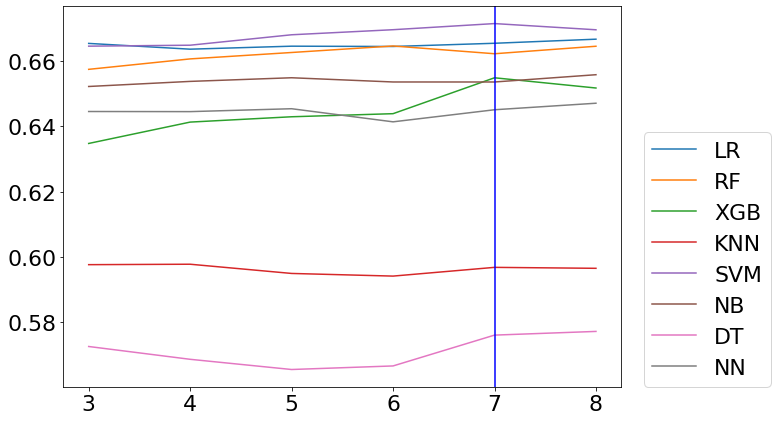

In [104]:
plt.plot(range(3,9),lr_test,label='LR') 
plt.plot(range(3,9),rf_test,label='RF') 
plt.plot(range(3,9),xg_test,label='XGB') 
plt.plot(range(3,9),knn_test,label='KNN') 
plt.plot(range(3,9),svm_test,label='SVM') 
plt.plot(range(3,9),nb_test,label='NB') 
plt.plot(range(3,9),dt_test,label='DT')
plt.plot(range(3,9),res,label='NN') 
plt.axvline(x = 7, color = 'b')
plt.legend(loc=(1.04, 0))
plt.savefig(r'img\\Models\\window_size.pdf',bbox_inches='tight')

## Default models on all features

In [8]:
def check_performance_window(clf, df):
    test_scores = []
    train_scores = []
    for year in range(2006,2024):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        #tutaj feature selection

        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        train_score = clf.score(X_train, y_train)
        test_scores.append(test_score)
        train_scores.append(train_score)
    
    return test_scores, train_scores

In [74]:
results_window_test = pd.DataFrame()
results_window_train = pd.DataFrame()

### logistic regression

In [75]:
test, train = check_performance_window(lr, data_symmetric_enc)
results_window_test['LR'] = test
results_window_train['LR'] = train

### Random forest

In [76]:
test, train = check_performance_window(rf, data_symmetric_enc)
results_window_test['RF'] = test
results_window_train['RF'] = train

### xgboost

In [77]:
test, train = check_performance_window(xg, data_symmetric_enc)
results_window_test['XGB'] = test
results_window_train['XGB'] = train

### KNN

In [78]:
test, train = check_performance_window(knn, data_symmetric_enc)
results_window_test['KNN'] = test
results_window_train['KNN'] = train

### SVM

In [79]:
test, train = check_performance_window(sv, data_symmetric_enc)
results_window_test['SVM'] = test
results_window_train['SVM'] = train

### Naive bayes

In [80]:
test, train = check_performance_window(gnb, data_symmetric_enc)
results_window_test['NB'] = test
results_window_train['NB'] = train

### decision tree

In [81]:
test, train = check_performance_window(dt, data_symmetric_enc)
results_window_test['DT'] = test
results_window_train['DT'] = train

### NN

In [37]:
def check_performance_window_NN(clf, df):
    test_scores = []
    train_scores = []
    for year in range(2006,2024):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        #tutaj feature selection

        clf.fit(X_train, y_train, epochs=30, batch_size=32)
    
        test_score = clf.evaluate(X_test,  y_test)[1]
        train_score = clf.evaluate(X_train,  y_train)[1]
    
        test_scores.append(test_score)
        train_scores.append(train_score)
    
    return test_scores, train_scores

In [87]:
    test_scores = []
    train_scores = []
    df = data_symmetric_enc
    for year in range(2006,2024):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_all]
        X_train = X_train[columns_all]
        
        ann = Sequential()
        ann.add(Dense(64, activation="tanh"))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
        train_score = ann.evaluate(X_train,  y_train)[1]
        train_scores.append(train_score)
        
    results_window_test['NN'] = test_scores
    results_window_train['NN'] = train_scores

Epoch 1/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6562
Epoch 2/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6134 - accuracy: 0.6607
Epoch 3/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6617
Epoch 4/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.6639
Epoch 5/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6655
Epoch 6/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6694
Epoch 7/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6716
Epoch 8/40
628/628 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6718
Epoch 9/40
628/628 [==============================] - 1s 1ms/step - loss: 0.5972 - accuracy: 0.6742
Epoch 10/40
628/628 [==============================] - 1s 1ms/step - loss: 0.5955 - accuracy: 0.6761

608/608 [==============================] - 1s 996us/step - loss: 0.5322 - accuracy: 0.7301
Epoch 38/40
608/608 [==============================] - 1s 996us/step - loss: 0.5310 - accuracy: 0.7287
Epoch 39/40
608/608 [==============================] - 1s 994us/step - loss: 0.5286 - accuracy: 0.7310
Epoch 40/40
608/608 [==============================] - 1s 877us/step - loss: 0.5233 - accuracy: 0.7351
Epoch 1/40
604/604 [==============================] - 2s 1ms/step - loss: 0.6015 - accuracy: 0.6749
Epoch 2/40
604/604 [==============================] - 1s 1ms/step - loss: 0.5916 - accuracy: 0.6822
Epoch 3/40
604/604 [==============================] - 1s 1ms/step - loss: 0.5888 - accuracy: 0.6818
Epoch 4/40
604/604 [==============================] - 1s 1ms/step - loss: 0.5866 - accuracy: 0.6844
Epoch 5/40
604/604 [==============================] - 1s 1ms/step - loss: 0.5856 - accuracy: 0.6856
Epoch 6/40
604/604 [==============================] - 1s 1ms/step - loss: 0.5833 - accuracy: 0.6879


588/588 [==============================] - 1s 994us/step - loss: 0.5242 - accuracy: 0.7336
Epoch 32/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5233 - accuracy: 0.7344
Epoch 33/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5206 - accuracy: 0.7380
Epoch 34/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7390
Epoch 35/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7383
Epoch 36/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.7417
Epoch 37/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5136 - accuracy: 0.7422
Epoch 38/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5112 - accuracy: 0.7432
Epoch 39/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5099 - accuracy: 0.7474
Epoch 40/40
588/588 [==============================] - 1s 879us/step - loss: 0.4980 - accuracy: 0.752

562/562 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7245
Epoch 26/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7276
Epoch 27/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7280
Epoch 28/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7290
Epoch 29/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7319
Epoch 30/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7327
Epoch 31/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7348
Epoch 32/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7347
Epoch 33/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5225 - accuracy: 0.7359
Epoch 34/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5207 - accuracy: 0.7393
Ep

518/518 [==============================] - 1s 1ms/step - loss: 0.5684 - accuracy: 0.6967
Epoch 20/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5668 - accuracy: 0.6982
Epoch 21/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5645 - accuracy: 0.6985
Epoch 22/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5627 - accuracy: 0.7023
Epoch 23/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5601 - accuracy: 0.7032
Epoch 24/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7057
Epoch 25/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7098
Epoch 26/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7093
Epoch 27/40
518/518 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7124
Epoch 28/40
518/518 [==============================] - 1s 997us/step - loss: 0.5510 - accuracy: 0.7134


### Comparison

In [88]:
results_window_test.mean()

LR     0.681025
RF     0.677462
XGB    0.660601
KNN    0.616870
SVM    0.681600
NB     0.671415
DT     0.585998
NN     0.661485
dtype: float64

In [89]:
results_window_train.mean() 

LR     0.684846
RF     0.999997
XGB    0.908115
KNN    0.800173
SVM    0.717310
NB     0.676364
DT     1.000000
NN     0.742170
dtype: float64

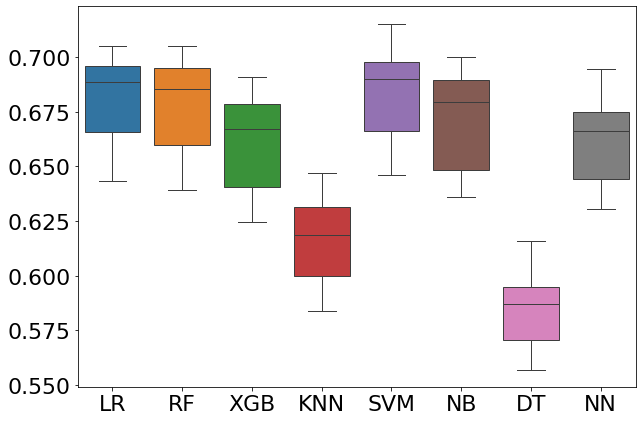

In [90]:
sb.boxplot(results_window_test)
#plt.xticks(rotation=30)
plt.savefig(r'img\\Models\\defailt_models_boxplot_test.pdf',bbox_inches='tight')

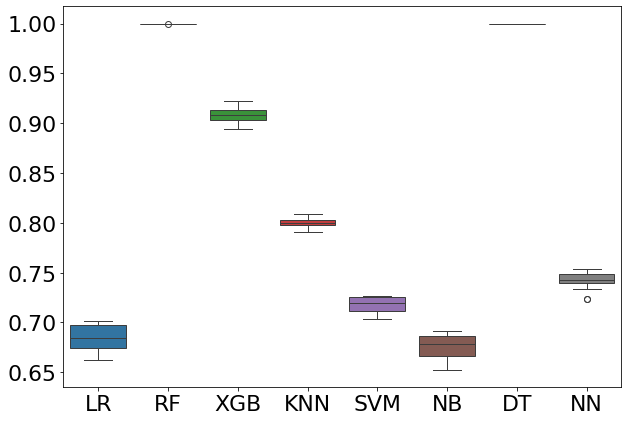

In [91]:
sb.boxplot(results_window_train)
#plt.xticks(rotation=30)
plt.savefig(r'img\\Models\\defailt_models_boxplot_train.pdf',bbox_inches='tight')

In [92]:
for col in results_window_test.columns.values.tolist():
    results_window_test = results_window_test.rename(columns={col:col+' test'})
    results_window_train = results_window_train.rename(columns={col:col+' train'})

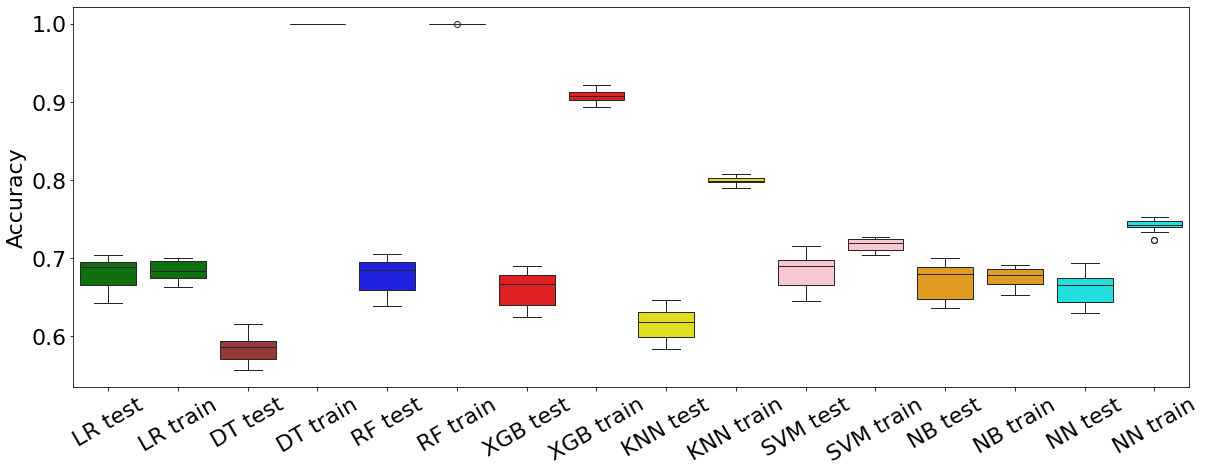

In [93]:
con = pd.concat([results_window_test, results_window_train], axis=1)[['LR test','LR train','DT test','DT train','RF test','RF train',
                                                              'XGB test','XGB train','KNN test','KNN train',
                                                              'SVM test','SVM train','NB test','NB train',
                                                              'NN test','NN train']]
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
colors={'LR test':'green','LR train':'green','RF test':'blue','RF train':'blue',
        'XGB test':'red','XGB train':'red','KNN test':'yellow','KNN train':'yellow',
        'SVM test':'pink','SVM train':'pink','NB test':'orange','NB train':'orange',
        'NN test':'cyan','NN train':'cyan','DT test':'brown','DT train':'brown'}
sb.boxplot(con,palette=colors)
plt.savefig(r'img\\Models\\defailt_models_boxplot_train_test.pdf',bbox_inches='tight')

## Feature selection

In [31]:
def check_performance_window_mean(clf, df, features):
    test_scores = []
    
    for year in range(1999,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[features]
        X_train = X_train[features]

        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)
        
    return np.mean(test_scores)

In [105]:
def check_performance_window_mean_NN(df, features):
    test_scores = []
    
    for year in range(1999,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[features]
        X_train = X_train[features]
        
        ann = Sequential()
        ann.add(Dense(64, activation="tanh"))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=10, batch_size=32)

        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
    return np.mean(test_scores)

In [13]:
def feature_selection(clf, df):
    columns = df.columns.values.tolist()
    columns.remove('target')
    columns.remove('Y')
    acc = check_performance_window_mean(clf, df, columns)
    print('whole: ',acc)
    removed = []
    
    while True:
        res = {}
        for col in tqdm(columns):
            new_columns = columns.copy()
            new_columns.remove(col)
            r = check_performance_window_mean(clf, df, new_columns)
            print(r)
            res[col] = r
            
        if max(res.values()) >= acc:
            acc = max(res.values())
            column = search(res, acc)
            columns.remove(column)
            removed.append(column)
            print(column,acc)
        else:
            return acc, columns, removed

In [106]:
def feature_selection_NN(df):
    columns = df.columns.values.tolist()
    columns.remove('target')
    columns.remove('Y')
    removed = []
    
    acc = check_performance_window_mean_NN(df, columns)
    print('whole: ',acc)
    
    while True:
        res = {}
        for col in tqdm(columns):
            new_columns = columns.copy()
            new_columns.remove(col)
            
            r = check_performance_window_mean_NN(df, new_columns)
            print(r)
            res[col] = r
            
        if max(res.values()) >= acc:
            acc = max(res.values())
            column = search(res, acc)
            columns.remove(column)
            removed.append(column)
            print(column,acc)
        else:
            return acc, columns, removed

In [107]:
def search(dic, val):
    for n, v in dic.items():
        if v == val:
            return n

### logistic regression

In [153]:
feature_selection(lr,data_symmetric_enc)

whole:  0.661159604731494


  2%|▏         | 1/54 [00:02<01:53,  2.14s/it]

0.6613560429993399


  4%|▎         | 2/54 [00:04<01:52,  2.16s/it]

0.6609016204080419


  6%|▌         | 3/54 [00:06<01:52,  2.21s/it]

0.6622527133394841


  7%|▋         | 4/54 [00:08<01:53,  2.26s/it]

0.6570686435038494


  9%|▉         | 5/54 [00:11<01:52,  2.30s/it]

0.661395290968919


 11%|█         | 6/54 [00:13<01:50,  2.29s/it]

0.6582312611391936


 13%|█▎        | 7/54 [00:15<01:47,  2.29s/it]

0.661639060267501


 15%|█▍        | 8/54 [00:18<01:45,  2.29s/it]

0.6634807968856881


 17%|█▋        | 9/54 [00:20<01:41,  2.26s/it]

0.6613841803303899


 19%|█▊        | 10/54 [00:22<01:39,  2.27s/it]

0.661250009961895


 20%|██        | 11/54 [00:24<01:37,  2.26s/it]

0.6614266660851845


 22%|██▏       | 12/54 [00:27<01:35,  2.27s/it]

0.6618002523331471


 24%|██▍       | 13/54 [00:29<01:34,  2.31s/it]

0.6624669124240014


 26%|██▌       | 14/54 [00:31<01:32,  2.32s/it]

0.6604528073561802


 28%|██▊       | 15/54 [00:34<01:30,  2.33s/it]

0.6608607822100402


 30%|██▉       | 16/54 [00:36<01:30,  2.39s/it]

0.6621101714026965


 31%|███▏      | 17/54 [00:38<01:26,  2.33s/it]

0.6615569404914543


 33%|███▎      | 18/54 [00:41<01:23,  2.31s/it]

0.6613181950898889


 35%|███▌      | 19/54 [00:43<01:20,  2.31s/it]

0.6615759135001946


 37%|███▋      | 20/54 [00:45<01:17,  2.29s/it]

0.6613024652347034


 39%|███▉      | 21/54 [00:48<01:15,  2.28s/it]

0.6608239381692147


 41%|████      | 22/54 [00:50<01:13,  2.28s/it]

0.6620158863385815


 43%|████▎     | 23/54 [00:52<01:10,  2.29s/it]

0.6618051783956861


 44%|████▍     | 24/54 [00:54<01:07,  2.26s/it]

0.6617492793726009


 46%|████▋     | 25/54 [00:57<01:04,  2.24s/it]

0.6610015241734233


 48%|████▊     | 26/54 [00:59<01:04,  2.31s/it]

0.6610016521109175


 50%|█████     | 27/54 [01:01<01:02,  2.32s/it]

0.6618740030316301


 52%|█████▏    | 28/54 [01:04<00:59,  2.28s/it]

0.6615062493089866


 54%|█████▎    | 29/54 [01:06<00:56,  2.25s/it]

0.6610106071207598


 56%|█████▌    | 30/54 [01:08<00:53,  2.23s/it]

0.6611593160996453


 57%|█████▋    | 31/54 [01:10<00:51,  2.22s/it]

0.6614791822362945


 59%|█████▉    | 32/54 [01:12<00:49,  2.23s/it]

0.6614548789034708


 61%|██████    | 33/54 [01:15<00:47,  2.24s/it]

0.6616123849498923


 63%|██████▎   | 34/54 [01:17<00:44,  2.24s/it]

0.6608540474857867


 65%|██████▍   | 35/54 [01:19<00:43,  2.26s/it]

0.6611587219672537


 67%|██████▋   | 36/54 [01:21<00:40,  2.26s/it]

0.6611107980547407


 69%|██████▊   | 37/54 [01:24<00:38,  2.27s/it]

0.6612071445460889


 70%|███████   | 38/54 [01:26<00:36,  2.26s/it]

0.6611099152905002


 72%|███████▏  | 39/54 [01:29<00:35,  2.40s/it]

0.6612071445460889


 74%|███████▍  | 40/54 [01:31<00:33,  2.36s/it]

0.6612071445460889


 76%|███████▌  | 41/54 [01:33<00:31,  2.39s/it]

0.6612103991788061


 78%|███████▊  | 42/54 [01:36<00:31,  2.59s/it]

0.6611099152905002


 80%|███████▉  | 43/54 [01:39<00:28,  2.60s/it]

0.6611588819978262


 81%|████████▏ | 44/54 [01:41<00:25,  2.54s/it]

0.6612084114082475


 83%|████████▎ | 45/54 [01:44<00:22,  2.52s/it]

0.6610616527422378


 85%|████████▌ | 46/54 [01:46<00:19,  2.46s/it]

0.661159604731494


 87%|████████▋ | 47/54 [01:49<00:16,  2.42s/it]

0.661159604731494


 89%|████████▉ | 48/54 [01:51<00:14,  2.45s/it]

0.6610616527422378


 91%|█████████ | 49/54 [01:54<00:12,  2.55s/it]

0.661157455105095


 93%|█████████▎| 50/54 [01:56<00:10,  2.55s/it]

0.6611587219672537


 94%|█████████▍| 51/54 [01:59<00:07,  2.47s/it]

0.6611099152905002


 96%|█████████▋| 52/54 [02:01<00:04,  2.45s/it]

0.6611118863117225


 98%|█████████▊| 53/54 [02:03<00:02,  2.41s/it]

0.661063079634969


100%|██████████| 54/54 [02:06<00:00,  2.34s/it]


0.661111182152659
RD 0.6634807968856881


  2%|▏         | 1/53 [00:01<01:37,  1.88s/it]

0.6634854081857415


  4%|▍         | 2/53 [00:03<01:41,  1.99s/it]

0.6621294323604007


  6%|▌         | 3/53 [00:06<01:44,  2.08s/it]

0.6630663771488574


  8%|▊         | 4/53 [00:08<01:44,  2.12s/it]

0.6581555592381249


  9%|▉         | 5/53 [00:10<01:41,  2.11s/it]

0.662798301012372


 11%|█▏        | 6/53 [00:12<01:38,  2.11s/it]

0.6590702652573638


 13%|█▎        | 7/53 [00:14<01:36,  2.11s/it]

0.6634290014866703


 15%|█▌        | 8/53 [00:16<01:32,  2.07s/it]

0.663988551149554


 17%|█▋        | 9/53 [00:18<01:31,  2.08s/it]

0.6612535835627779


 19%|█▉        | 10/53 [00:20<01:29,  2.08s/it]

0.6633792653027463


 21%|██        | 11/53 [00:22<01:28,  2.10s/it]

0.6619316711797311


 23%|██▎       | 12/53 [00:25<01:27,  2.13s/it]

0.6635852544596964


 25%|██▍       | 13/53 [00:27<01:25,  2.15s/it]

0.6604571834031562


 26%|██▋       | 14/53 [00:29<01:24,  2.17s/it]

0.6619995202455955


 28%|██▊       | 15/53 [00:31<01:21,  2.15s/it]

0.6629572691467046


 30%|███       | 16/53 [00:33<01:18,  2.12s/it]

0.663083473018216


 32%|███▏      | 17/53 [00:35<01:15,  2.09s/it]

0.6625500828798148


 34%|███▍      | 18/53 [00:37<01:13,  2.10s/it]

0.6637262117000174


 36%|███▌      | 19/53 [00:40<01:12,  2.13s/it]

0.6632964241590759


 38%|███▊      | 20/53 [00:42<01:09,  2.12s/it]

0.662974236758684


 40%|███▉      | 21/53 [00:44<01:08,  2.13s/it]

0.6622974136824163


 42%|████▏     | 22/53 [00:46<01:06,  2.13s/it]

0.6634817793820649


 43%|████▎     | 23/53 [00:48<01:03,  2.10s/it]

0.6629431368713768


 45%|████▌     | 24/53 [00:50<01:01,  2.13s/it]

0.6633720581546718


 47%|████▋     | 25/53 [00:52<00:59,  2.12s/it]

0.6624347247558331


 49%|████▉     | 26/53 [00:54<00:57,  2.13s/it]

0.6632594978571612


 51%|█████     | 27/53 [00:57<00:56,  2.16s/it]

0.663293050789093


 53%|█████▎    | 28/53 [00:59<00:54,  2.16s/it]

0.6631832393011444


 55%|█████▍    | 29/53 [01:01<00:51,  2.16s/it]

0.6636305776163276


 57%|█████▋    | 30/53 [01:03<00:49,  2.16s/it]

0.663029797938563


 58%|█████▊    | 31/53 [01:05<00:46,  2.14s/it]

0.6617671315622767


 60%|██████    | 32/53 [01:07<00:44,  2.14s/it]

0.6631031997174924


 62%|██████▏   | 33/53 [01:10<00:42,  2.15s/it]

0.662789415208049


 64%|██████▍   | 34/53 [01:12<00:40,  2.15s/it]

0.6634325343374254


 66%|██████▌   | 35/53 [01:14<00:38,  2.13s/it]

0.6634807968856881


 68%|██████▊   | 36/53 [01:16<00:36,  2.14s/it]

0.6633823738237818


 70%|██████▉   | 37/53 [01:18<00:34,  2.16s/it]

0.6634807968856881


 72%|███████▏  | 38/53 [01:21<00:34,  2.27s/it]

0.6634320632647757


 74%|███████▎  | 39/53 [01:23<00:30,  2.20s/it]

0.6635323140666679


 75%|███████▌  | 40/53 [01:25<00:28,  2.16s/it]

0.6635323140666679


 77%|███████▋  | 41/53 [01:28<00:28,  2.36s/it]

0.6633823738237818


 79%|███████▉  | 42/53 [01:30<00:26,  2.39s/it]

0.6634835804457555


 81%|████████  | 43/53 [01:32<00:23,  2.32s/it]

0.663577866110704


 83%|████████▎ | 44/53 [01:34<00:20,  2.32s/it]

0.6634822237784193


 85%|████████▍ | 45/53 [01:37<00:18,  2.28s/it]

0.6634325343374254


 87%|████████▋ | 46/53 [01:39<00:15,  2.22s/it]

0.6634807968856881


 89%|████████▊ | 47/53 [01:41<00:13,  2.20s/it]

0.6634803258130381


 91%|█████████ | 48/53 [01:44<00:11,  2.39s/it]

0.6634821535530243


 92%|█████████▏| 49/53 [01:46<00:09,  2.41s/it]

0.6635304863266818


 94%|█████████▍| 50/53 [01:48<00:07,  2.35s/it]

0.6634807968856881


 96%|█████████▌| 51/53 [01:51<00:04,  2.30s/it]

0.6634325343374254


 98%|█████████▊| 52/53 [01:53<00:02,  2.27s/it]

0.6634807968856881


100%|██████████| 53/53 [01:55<00:00,  2.18s/it]


0.6635296035624414
tournaments_won 0.663988551149554


  2%|▏         | 1/52 [00:01<01:31,  1.79s/it]

0.6641423799588256


  4%|▍         | 2/52 [00:03<01:36,  1.94s/it]

0.6619902661896709


  6%|▌         | 3/52 [00:05<01:36,  1.97s/it]

0.6629071744454852


  8%|▊         | 4/52 [00:07<01:34,  1.97s/it]

0.6581424220892655


 10%|▉         | 5/52 [00:09<01:33,  2.00s/it]

0.6639786116509077


 12%|█▏        | 6/52 [00:11<01:31,  1.99s/it]

0.6597403507283166


 13%|█▎        | 7/52 [00:13<01:30,  2.01s/it]

0.6638762623001196


 15%|█▌        | 8/52 [00:15<01:28,  2.00s/it]

0.6607094255183806


 17%|█▋        | 9/52 [00:17<01:26,  2.00s/it]

0.6638400050631611


 19%|█▉        | 10/52 [00:19<01:23,  1.98s/it]

0.6625955269651896


 21%|██        | 11/52 [00:21<01:21,  1.99s/it]

0.6634485730775099


 23%|██▎       | 12/52 [00:23<01:20,  2.00s/it]

0.6607320202624143


 25%|██▌       | 13/52 [00:25<01:17,  1.99s/it]

0.6623453565174693


 27%|██▋       | 14/52 [00:27<01:15,  2.00s/it]

0.6636550360704155


 29%|██▉       | 15/52 [00:29<01:13,  2.00s/it]

0.6609204032494048


 31%|███       | 16/52 [00:31<01:11,  1.98s/it]

0.6622870514197988


 33%|███▎      | 17/52 [00:33<01:10,  2.02s/it]

0.6637294581719413


 35%|███▍      | 18/52 [00:35<01:08,  2.02s/it]

0.663884165106516


 37%|███▋      | 19/52 [00:37<01:06,  2.00s/it]

0.6635490732846275


 38%|███▊      | 20/52 [00:39<01:04,  2.02s/it]

0.6632054289442276


 40%|████      | 21/52 [00:41<01:02,  2.02s/it]

0.6640413081173463


 42%|████▏     | 22/52 [00:43<01:00,  2.00s/it]

0.6635975901774503


 44%|████▍     | 23/52 [00:45<00:57,  2.00s/it]

0.6633118328390265


 46%|████▌     | 24/52 [00:47<00:55,  2.00s/it]

0.6635292361403337


 48%|████▊     | 25/52 [00:49<00:54,  2.00s/it]

0.6633445826984755


 50%|█████     | 26/52 [00:51<00:52,  2.01s/it]

0.663058414068878


 52%|█████▏    | 27/52 [00:53<00:49,  1.99s/it]

0.663482087804965


 54%|█████▍    | 28/52 [00:55<00:47,  1.98s/it]

0.6640780014376995


 56%|█████▌    | 29/52 [00:57<00:45,  1.97s/it]

0.6635307996217765


 58%|█████▊    | 30/52 [00:59<00:44,  2.00s/it]

0.6618700667419002


 60%|█████▉    | 31/52 [01:01<00:42,  2.02s/it]

0.6626860386649968


 62%|██████▏   | 32/52 [01:03<00:40,  2.03s/it]

0.6625712215919833


 63%|██████▎   | 33/52 [01:05<00:38,  2.03s/it]

0.6638920260530289


 65%|██████▌   | 34/52 [01:07<00:36,  2.00s/it]

0.6638870035797109


 67%|██████▋   | 35/52 [01:10<00:34,  2.02s/it]

0.6639402886012914


 69%|██████▉   | 36/52 [01:12<00:32,  2.03s/it]

0.6639402886012914


 71%|███████   | 37/52 [01:14<00:31,  2.12s/it]

0.6638920260530289


 73%|███████▎  | 38/52 [01:16<00:28,  2.06s/it]

0.6639950604149886


 75%|███████▌  | 39/52 [01:18<00:26,  2.01s/it]

0.663988551149554


 77%|███████▋  | 40/52 [01:20<00:25,  2.14s/it]

0.6639402886012914


 79%|███████▉  | 41/52 [01:22<00:24,  2.21s/it]

0.6639937037476524


 81%|████████  | 42/52 [01:25<00:21,  2.19s/it]

0.6638920260530289


 83%|████████▎ | 43/52 [01:27<00:19,  2.18s/it]

0.6639899780422852


 85%|████████▍ | 44/52 [01:29<00:17,  2.16s/it]

0.6638437635047663


 87%|████████▋ | 45/52 [01:31<00:15,  2.15s/it]

0.6639402886012914


 88%|████████▊ | 46/52 [01:33<00:12,  2.11s/it]

0.6638920260530289


 90%|█████████ | 47/52 [01:36<00:11,  2.22s/it]

0.6639402886012914


 92%|█████████▏| 48/52 [01:38<00:08,  2.21s/it]

0.6638920260530289


 94%|█████████▍| 49/52 [01:40<00:06,  2.17s/it]

0.6639402886012914


 96%|█████████▌| 50/52 [01:42<00:04,  2.12s/it]

0.6639402886012914


 98%|█████████▊| 51/52 [01:44<00:02,  2.10s/it]

0.6639402886012914


100%|██████████| 52/52 [01:46<00:00,  2.05s/it]


0.6639402886012914
best_of 0.6641423799588256


  2%|▏         | 1/51 [00:01<01:22,  1.64s/it]

0.6620299297454852


  4%|▍         | 2/51 [00:03<01:32,  1.89s/it]

0.6628687271062169


  6%|▌         | 3/51 [00:05<01:27,  1.82s/it]

0.6582477281007136


  8%|▊         | 4/51 [00:07<01:23,  1.78s/it]

0.6640743841079727


 10%|▉         | 5/51 [00:08<01:21,  1.77s/it]

0.6596904067958589


 12%|█▏        | 6/51 [00:10<01:18,  1.75s/it]

0.6638344387918967


 14%|█▎        | 7/51 [00:12<01:17,  1.75s/it]

0.6609266000400271


 16%|█▌        | 8/51 [00:14<01:14,  1.72s/it]

0.663888509433284


 18%|█▊        | 9/51 [00:15<01:11,  1.70s/it]

0.6626926859953832


 20%|█▉        | 10/51 [00:17<01:09,  1.69s/it]

0.663449859519451


 22%|██▏       | 11/51 [00:19<01:08,  1.72s/it]

0.6607315360333089


 24%|██▎       | 12/51 [00:20<01:06,  1.71s/it]

0.6625488231169443


 25%|██▌       | 13/51 [00:22<01:05,  1.71s/it]

0.6638092788833977


 27%|██▋       | 14/51 [00:24<01:03,  1.71s/it]

0.6608188068592172


 29%|██▉       | 15/51 [00:25<01:00,  1.69s/it]

0.6623854042563099


 31%|███▏      | 16/51 [00:27<00:59,  1.69s/it]

0.6637855164275797


 33%|███▎      | 17/51 [00:29<00:58,  1.72s/it]

0.664139037676743


 35%|███▌      | 18/51 [00:31<00:56,  1.71s/it]

0.6635959502649399


 37%|███▋      | 19/51 [00:32<00:54,  1.70s/it]

0.6631463583960586


 39%|███▉      | 20/51 [00:34<00:52,  1.69s/it]

0.6639841056287662


 41%|████      | 21/51 [00:36<00:50,  1.69s/it]

0.6636425691923815


 43%|████▎     | 22/51 [00:37<00:49,  1.70s/it]

0.6633159921278865


 45%|████▌     | 23/51 [00:39<00:48,  1.73s/it]

0.6636713703498345


 47%|████▋     | 24/51 [00:41<00:46,  1.71s/it]

0.6633968041854226


 49%|████▉     | 25/51 [00:43<00:44,  1.72s/it]

0.6628175534856623


 51%|█████     | 26/51 [00:44<00:42,  1.71s/it]

0.6635854151527237


 53%|█████▎    | 27/51 [00:46<00:40,  1.70s/it]

0.6643316802016085


 55%|█████▍    | 28/51 [00:48<00:39,  1.71s/it]

0.6634856512554411


 57%|█████▋    | 29/51 [00:49<00:37,  1.72s/it]

0.6619209533065095


 59%|█████▉    | 30/51 [00:51<00:36,  1.72s/it]

0.6626402695214486


 61%|██████    | 31/51 [00:53<00:34,  1.74s/it]

0.662828863560644


 63%|██████▎   | 32/51 [00:55<00:32,  1.72s/it]

0.6641373574855077


 65%|██████▍   | 33/51 [00:56<00:30,  1.69s/it]

0.6640873270966445


 67%|██████▋   | 34/51 [00:58<00:28,  1.69s/it]

0.6640394054962515


 69%|██████▊   | 35/51 [01:00<00:27,  1.69s/it]

0.6639825248940844


 71%|███████   | 36/51 [01:01<00:26,  1.74s/it]

0.6641938971398055


 73%|███████▎  | 37/51 [01:03<00:24,  1.77s/it]

0.6641938971398055


 75%|███████▍  | 38/51 [01:05<00:22,  1.76s/it]

0.6641423799588256


 76%|███████▋  | 39/51 [01:07<00:22,  1.86s/it]

0.6641423799588256


 78%|███████▊  | 40/51 [01:09<00:21,  1.92s/it]

0.6641423799588256


 80%|████████  | 41/51 [01:11<00:19,  1.90s/it]

0.6641423799588256


 82%|████████▏ | 42/51 [01:13<00:17,  1.92s/it]

0.6641938971398055


 84%|████████▍ | 43/51 [01:15<00:14,  1.87s/it]

0.6641423799588256


 86%|████████▋ | 44/51 [01:16<00:12,  1.83s/it]

0.6641406121182251


 88%|████████▊ | 45/51 [01:18<00:10,  1.81s/it]

0.6640890949372452


 90%|█████████ | 46/51 [01:20<00:09,  1.89s/it]

0.6641938971398055


 92%|█████████▏| 47/51 [01:22<00:07,  1.93s/it]

0.6641938971398055


 94%|█████████▍| 48/51 [01:24<00:05,  1.89s/it]

0.6641442076988117


 96%|█████████▌| 49/51 [01:26<00:03,  1.82s/it]

0.6641423799588256


 98%|█████████▊| 50/51 [01:28<00:01,  1.80s/it]

0.6640375777562654


100%|██████████| 51/51 [01:29<00:00,  1.76s/it]


0.6641423799588256
second_serve_return_won 0.6643316802016085


  2%|▏         | 1/50 [00:01<01:19,  1.63s/it]

0.6623794615178644


  4%|▍         | 2/50 [00:03<01:19,  1.65s/it]

0.6630826157231177


  6%|▌         | 3/50 [00:04<01:18,  1.66s/it]

0.6576018047217314


  8%|▊         | 4/50 [00:06<01:16,  1.66s/it]

0.663750061603874


 10%|█         | 5/50 [00:08<01:15,  1.68s/it]

0.6588525944722841


 12%|█▏        | 6/50 [00:10<01:13,  1.68s/it]

0.6641691089717489


 14%|█▍        | 7/50 [00:11<01:12,  1.68s/it]

0.6615064073030227


 16%|█▌        | 8/50 [00:13<01:10,  1.68s/it]

0.6637824264496743


 18%|█▊        | 9/50 [00:15<01:08,  1.67s/it]

0.66254253742931


 20%|██        | 10/50 [00:16<01:06,  1.67s/it]

0.6640902321051482


 22%|██▏       | 11/50 [00:18<01:05,  1.69s/it]

0.660728059003654


 24%|██▍       | 12/50 [00:20<01:04,  1.69s/it]

0.6626595466317656


 26%|██▌       | 13/50 [00:21<01:02,  1.70s/it]

0.6638935533431265


 28%|██▊       | 14/50 [00:23<01:01,  1.70s/it]

0.6605721035335697


 30%|███       | 15/50 [00:25<00:59,  1.70s/it]

0.6624311330802551


 32%|███▏      | 16/50 [00:26<00:57,  1.69s/it]

0.6640301805746207


 34%|███▍      | 17/50 [00:28<00:55,  1.69s/it]

0.6641360571152719


 36%|███▌      | 18/50 [00:30<00:54,  1.69s/it]

0.6639374409950468


 38%|███▊      | 19/50 [00:31<00:52,  1.69s/it]

0.6631596298948874


 40%|████      | 20/50 [00:33<00:52,  1.76s/it]

0.6640767805560355


 42%|████▏     | 21/50 [00:35<00:50,  1.75s/it]

0.6637801309858106


 44%|████▍     | 22/50 [00:37<00:48,  1.73s/it]

0.6636677416746449


 46%|████▌     | 23/50 [00:39<00:46,  1.73s/it]

0.6631444000022345


 48%|████▊     | 24/50 [00:40<00:44,  1.72s/it]

0.6638944652100381


 50%|█████     | 25/50 [00:42<00:42,  1.71s/it]

0.6631501254772713


 52%|█████▏    | 26/50 [00:44<00:41,  1.71s/it]

0.6635743030785735


 54%|█████▍    | 27/50 [00:45<00:39,  1.72s/it]

0.6634750388527911


 56%|█████▌    | 28/50 [00:47<00:37,  1.71s/it]

0.6621198221023347


 58%|█████▊    | 29/50 [00:49<00:35,  1.71s/it]

0.6631814260861766


 60%|██████    | 30/50 [00:50<00:34,  1.70s/it]

0.6629933108639825


 62%|██████▏   | 31/50 [00:52<00:32,  1.73s/it]

0.6642300025069849


 64%|██████▍   | 32/50 [00:54<00:31,  1.74s/it]

0.6642300025069849


 66%|██████▌   | 33/50 [00:56<00:29,  1.74s/it]

0.6642801630206286


 68%|██████▊   | 34/50 [00:57<00:27,  1.72s/it]

0.6642801630206286


 70%|███████   | 35/50 [00:59<00:25,  1.73s/it]

0.6642801630206286


 72%|███████▏  | 36/50 [01:01<00:24,  1.73s/it]

0.6642300025069849


 74%|███████▍  | 37/50 [01:03<00:22,  1.71s/it]

0.6642300025069849


 76%|███████▌  | 38/50 [01:05<00:21,  1.79s/it]

0.6642300025069849


 78%|███████▊  | 39/50 [01:07<00:20,  1.88s/it]

0.6642300025069849


 80%|████████  | 40/50 [01:09<00:18,  1.90s/it]

0.6642300025069849


 82%|████████▏ | 41/50 [01:11<00:17,  1.93s/it]

0.6642801630206286


 84%|████████▍ | 42/50 [01:12<00:14,  1.86s/it]

0.6641767174854045


 86%|████████▌ | 43/50 [01:14<00:12,  1.84s/it]

0.6642300025069849


 88%|████████▊ | 44/50 [01:16<00:10,  1.81s/it]

0.6642801630206286


 90%|█████████ | 45/50 [01:18<00:09,  1.92s/it]

0.6642300025069849


 92%|█████████▏| 46/50 [01:20<00:07,  1.95s/it]

0.6642815196879648


 94%|█████████▍| 47/50 [01:22<00:05,  1.87s/it]

0.6643792200162031


 96%|█████████▌| 48/50 [01:23<00:03,  1.81s/it]

0.6642300025069849


 98%|█████████▊| 49/50 [01:25<00:01,  1.76s/it]

0.6642744178136429


100%|██████████| 50/50 [01:27<00:00,  1.74s/it]


0.6642815196879648
player1_hand_L 0.6643792200162031


  2%|▏         | 1/49 [00:01<01:12,  1.52s/it]

0.6623311287442067


  4%|▍         | 2/49 [00:03<01:14,  1.59s/it]

0.6630293307015371


  6%|▌         | 3/49 [00:04<01:11,  1.56s/it]

0.6576550897433118


  8%|▊         | 4/49 [00:06<01:11,  1.59s/it]

0.6637943899358002


 10%|█         | 5/49 [00:07<01:11,  1.62s/it]

0.6588525944722841


 12%|█▏        | 6/49 [00:09<01:10,  1.63s/it]

0.6641683862380809


 14%|█▍        | 7/49 [00:11<01:08,  1.63s/it]

0.6614581447547601


 16%|█▋        | 8/49 [00:12<01:06,  1.62s/it]

0.663832586963318


 18%|█▊        | 9/49 [00:14<01:05,  1.63s/it]

0.66254253742931


 20%|██        | 10/49 [00:16<01:02,  1.61s/it]

0.6639873446173056


 22%|██▏       | 11/49 [00:17<01:01,  1.61s/it]

0.660728059003654


 24%|██▍       | 12/49 [00:19<01:00,  1.62s/it]

0.6626573970053666


 27%|██▋       | 13/49 [00:20<00:58,  1.63s/it]

0.6639468383647068


 29%|██▊       | 14/49 [00:22<00:56,  1.61s/it]

0.6605721035335697


 31%|███       | 15/49 [00:24<00:54,  1.61s/it]

0.6624799397570085


 33%|███▎      | 16/49 [00:25<00:53,  1.61s/it]

0.6639729181866552


 35%|███▍      | 17/49 [00:27<00:52,  1.63s/it]

0.6640832730721334


 37%|███▋      | 18/49 [00:29<00:50,  1.64s/it]

0.6638877515540532


 39%|███▉      | 19/49 [00:30<00:49,  1.64s/it]

0.6632581260126347


 41%|████      | 20/49 [00:32<00:47,  1.63s/it]

0.6640767805560355


 43%|████▎     | 21/49 [00:33<00:45,  1.62s/it]

0.6638835765210346


 45%|████▍     | 22/49 [00:35<00:44,  1.63s/it]

0.6637160042229076


 47%|████▋     | 23/49 [00:37<00:42,  1.62s/it]

0.663147110506461


 49%|████▉     | 24/49 [00:38<00:40,  1.63s/it]

0.6638944652100381


 51%|█████     | 25/49 [00:40<00:38,  1.61s/it]

0.6631483576366708


 53%|█████▎    | 26/49 [00:42<00:37,  1.61s/it]

0.6635210180569929


 55%|█████▌    | 27/49 [00:43<00:35,  1.62s/it]

0.6635247282937848


 57%|█████▋    | 28/49 [00:45<00:34,  1.64s/it]

0.6621652122905303


 59%|█████▉    | 29/49 [00:47<00:32,  1.65s/it]

0.6631814260861766


 61%|██████    | 30/49 [00:48<00:31,  1.65s/it]

0.6630407608733996


 63%|██████▎   | 31/49 [00:50<00:29,  1.65s/it]

0.6642300025069849


 65%|██████▌   | 32/49 [00:51<00:27,  1.64s/it]

0.6642300025069849


 67%|██████▋   | 33/49 [00:53<00:26,  1.66s/it]

0.6642801630206286


 69%|██████▉   | 34/49 [00:55<00:24,  1.65s/it]

0.6642815196879648


 71%|███████▏  | 35/49 [00:56<00:23,  1.66s/it]

0.6641767174854045


 73%|███████▎  | 36/49 [00:58<00:21,  1.68s/it]

0.6642801630206286


 76%|███████▌  | 37/49 [01:00<00:20,  1.68s/it]

0.6642801630206286


 78%|███████▊  | 38/49 [01:02<00:19,  1.78s/it]

0.6642801630206286


 80%|███████▉  | 39/49 [01:04<00:18,  1.83s/it]

0.6642300025069849


 82%|████████▏ | 40/49 [01:06<00:17,  1.89s/it]

0.6642801630206286


 84%|████████▎ | 41/49 [01:08<00:15,  1.92s/it]

0.6641767174854045


 86%|████████▌ | 42/49 [01:10<00:12,  1.85s/it]

0.6642268779990481


 88%|████████▊ | 43/49 [01:11<00:10,  1.80s/it]

0.6642801630206286


 90%|████████▉ | 44/49 [01:13<00:08,  1.78s/it]

0.6642801630206286


 92%|█████████▏| 45/49 [01:15<00:07,  1.84s/it]

0.6643277028352232


 94%|█████████▍| 46/49 [01:17<00:05,  1.91s/it]

0.6642801630206286


 96%|█████████▌| 47/49 [01:19<00:03,  1.82s/it]

0.6636899159002175


 98%|█████████▊| 48/49 [01:20<00:01,  1.77s/it]

0.6642801630206286


100%|██████████| 49/49 [01:22<00:00,  1.68s/it]

0.6642300025069849


(0.6643792200162031,
 ['year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R'],
 ['RD',
  'tournaments_w

### random forest

In [208]:
feature_selection(rf,data_symmetric_enc)

whole:  0.6563665948837386


  2%|▏         | 1/54 [00:49<43:27, 49.20s/it]

0.6591217866667062


  4%|▎         | 2/54 [01:38<42:41, 49.27s/it]

0.6571714420526725


  6%|▌         | 3/54 [02:27<41:38, 48.99s/it]

0.6575444937629467


  7%|▋         | 4/54 [03:15<40:37, 48.76s/it]

0.6549306106431417


  9%|▉         | 5/54 [04:05<40:03, 49.06s/it]

0.6569319533430741


 11%|█         | 6/54 [04:53<39:05, 48.87s/it]

0.6567823458848918


 13%|█▎        | 7/54 [05:40<37:43, 48.17s/it]

0.6572439152654225


 15%|█▍        | 8/54 [06:27<36:46, 47.98s/it]

0.6581040948871725


 17%|█▋        | 9/54 [07:16<36:13, 48.30s/it]

0.6603432319883483


 19%|█▊        | 10/54 [08:04<35:18, 48.16s/it]

0.6577520541182721


 20%|██        | 11/54 [08:52<34:27, 48.09s/it]

0.6588911123268061


 22%|██▏       | 12/54 [09:41<33:43, 48.18s/it]

0.6573595906796218


 24%|██▍       | 13/54 [10:29<32:55, 48.19s/it]

0.660416232794741


 26%|██▌       | 14/54 [11:17<32:08, 48.21s/it]

0.6526689133481941


 28%|██▊       | 15/54 [12:07<31:43, 48.80s/it]

0.6591801248976833


 30%|██▉       | 16/54 [12:56<30:52, 48.76s/it]

0.6568773117896981


 31%|███▏      | 17/54 [13:44<30:01, 48.68s/it]

0.6581280255343358


 33%|███▎      | 18/54 [14:33<29:11, 48.65s/it]

0.6594335113377813


 35%|███▌      | 19/54 [15:23<28:33, 48.97s/it]

0.6570508436431105


 37%|███▋      | 20/54 [16:12<27:51, 49.16s/it]

0.6587872000397992


 39%|███▉      | 21/54 [17:02<27:09, 49.37s/it]

0.6546622541455944


 41%|████      | 22/54 [17:51<26:15, 49.22s/it]

0.6582998341033852


 43%|████▎     | 23/54 [18:39<25:15, 48.89s/it]

0.657746709477734


 44%|████▍     | 24/54 [19:27<24:18, 48.61s/it]

0.6613067109132463


 46%|████▋     | 25/54 [20:15<23:23, 48.41s/it]

0.6597560538505842


 48%|████▊     | 26/54 [21:04<22:35, 48.42s/it]

0.659725839095642


 50%|█████     | 27/54 [21:51<21:42, 48.23s/it]

0.6579113643787864


 52%|█████▏    | 28/54 [22:39<20:49, 48.05s/it]

0.6594076131612178


 54%|█████▎    | 29/54 [23:27<20:02, 48.09s/it]

0.6558537447326417


 56%|█████▌    | 30/54 [24:15<19:13, 48.08s/it]

0.6587423234438408


 57%|█████▋    | 31/54 [25:03<18:25, 48.09s/it]

0.6593617031915915


 59%|█████▉    | 32/54 [25:53<17:49, 48.60s/it]

0.6585887087477019


 61%|██████    | 33/54 [26:43<17:07, 48.93s/it]

0.6595504528273582


 63%|██████▎   | 34/54 [27:32<16:21, 49.09s/it]

0.6594349612725673


 65%|██████▍   | 35/54 [28:22<15:34, 49.18s/it]

0.6599105635754519


 67%|██████▋   | 36/54 [29:12<14:51, 49.53s/it]

0.6588004728380624


 69%|██████▊   | 37/54 [30:02<14:06, 49.81s/it]

0.6558994032489647


 70%|███████   | 38/54 [30:52<13:17, 49.86s/it]

0.6573067568387974


 72%|███████▏  | 39/54 [31:42<12:27, 49.80s/it]

0.6540293493878327


 74%|███████▍  | 40/54 [32:32<11:36, 49.73s/it]

0.6575276740969684


 76%|███████▌  | 41/54 [33:21<10:43, 49.49s/it]

0.6589317322472368


 78%|███████▊  | 42/54 [34:10<09:55, 49.60s/it]

0.6570225001510254


 80%|███████▉  | 43/54 [34:59<09:03, 49.42s/it]

0.6591841212376922


 81%|████████▏ | 44/54 [35:49<08:14, 49.41s/it]

0.6590545075776235


 83%|████████▎ | 45/54 [36:38<07:24, 49.39s/it]

0.6592259676005228


 85%|████████▌ | 46/54 [37:28<06:35, 49.43s/it]

0.65713926830709


 87%|████████▋ | 47/54 [38:17<05:45, 49.39s/it]

0.657905992037312


 89%|████████▉ | 48/54 [39:06<04:55, 49.27s/it]

0.6539920835654606


 91%|█████████ | 49/54 [39:56<04:06, 49.35s/it]

0.6556312160815972


 93%|█████████▎| 50/54 [40:45<03:17, 49.31s/it]

0.6566282622161145


 94%|█████████▍| 51/54 [41:34<02:27, 49.15s/it]

0.6545676219807124


 96%|█████████▋| 52/54 [42:22<01:38, 49.03s/it]

0.65464587160505


 98%|█████████▊| 53/54 [43:12<00:49, 49.13s/it]

0.6565065507611927


100%|██████████| 54/54 [44:01<00:00, 48.91s/it]


0.6609722389576808
first_serve_won 0.6613067109132463


  2%|▏         | 1/53 [00:48<42:19, 48.84s/it]

0.655610228662744


  4%|▍         | 2/53 [01:36<41:09, 48.43s/it]

0.6583933281783212


  6%|▌         | 3/53 [02:25<40:15, 48.30s/it]

0.6593250732054668


  8%|▊         | 4/53 [03:13<39:24, 48.25s/it]

0.6587501721979502


  9%|▉         | 5/53 [04:01<38:30, 48.14s/it]

0.6558338770950096


 11%|█▏        | 6/53 [04:48<37:31, 47.90s/it]

0.6571358047707508


 13%|█▎        | 7/53 [05:35<36:28, 47.59s/it]

0.656887317392915


 15%|█▌        | 8/53 [06:23<35:43, 47.64s/it]

0.6579154011773652


 17%|█▋        | 9/53 [07:12<35:10, 47.97s/it]

0.6589941868392674


 19%|█▉        | 10/53 [07:59<34:17, 47.85s/it]

0.6571174401114578


 21%|██        | 11/53 [08:46<33:20, 47.63s/it]

0.6555604469262376


 23%|██▎       | 12/53 [09:34<32:30, 47.56s/it]

0.6585590918123927


 25%|██▍       | 13/53 [10:21<31:42, 47.57s/it]

0.6573372432095755


 26%|██▋       | 14/53 [11:09<30:54, 47.56s/it]

0.6555382664882929


 28%|██▊       | 15/53 [11:57<30:09, 47.62s/it]

0.6590747425246027


 30%|███       | 16/53 [12:44<29:16, 47.48s/it]

0.6557118030041931


 32%|███▏      | 17/53 [13:32<28:38, 47.74s/it]

0.6562298096244834


 34%|███▍      | 18/53 [14:20<27:56, 47.91s/it]

0.6553405672792909


 36%|███▌      | 19/53 [15:09<27:14, 48.07s/it]

0.6582955860460075


 38%|███▊      | 20/53 [15:57<26:26, 48.07s/it]

0.6547786253250897


 40%|███▉      | 21/53 [16:45<25:43, 48.22s/it]

0.6593819045485727


 42%|████▏     | 22/53 [17:34<24:54, 48.19s/it]

0.6561557337029036


 43%|████▎     | 23/53 [18:20<23:53, 47.79s/it]

0.6576009197387407


 45%|████▌     | 24/53 [19:08<23:01, 47.65s/it]

0.6585714590752396


 47%|████▋     | 25/53 [19:55<22:11, 47.55s/it]

0.6575507911243382


 49%|████▉     | 26/53 [20:42<21:20, 47.42s/it]

0.6545124764301141


 51%|█████     | 27/53 [21:30<20:37, 47.59s/it]

0.6576663627944779


 53%|█████▎    | 28/53 [22:18<19:49, 47.58s/it]

0.6578409190041823


 55%|█████▍    | 29/53 [23:05<19:01, 47.58s/it]

0.6580427927625048


 57%|█████▋    | 30/53 [23:52<18:11, 47.44s/it]

0.660677790453799


 58%|█████▊    | 31/53 [24:40<17:26, 47.55s/it]

0.6580218301363532


 60%|██████    | 32/53 [25:29<16:46, 47.95s/it]

0.6561407226581384


 62%|██████▏   | 33/53 [26:18<16:01, 48.09s/it]

0.6585427300507823


 64%|██████▍   | 34/53 [27:07<15:18, 48.36s/it]

0.6565228114000077


 66%|██████▌   | 35/53 [27:55<14:31, 48.44s/it]

0.658184326230227


 68%|██████▊   | 36/53 [28:44<13:46, 48.62s/it]

0.6592371077646589


 70%|██████▉   | 37/53 [29:34<13:02, 48.90s/it]

0.6599461584231152


 72%|███████▏  | 38/53 [30:23<12:13, 48.91s/it]

0.6556847083366552


 74%|███████▎  | 39/53 [31:12<11:25, 48.93s/it]

0.6563364842034309


 75%|███████▌  | 40/53 [32:00<10:34, 48.80s/it]

0.6587682047792033


 77%|███████▋  | 41/53 [32:49<09:45, 48.79s/it]

0.6594499053195229


 79%|███████▉  | 42/53 [33:38<08:57, 48.89s/it]

0.6573683053671163


 81%|████████  | 43/53 [34:27<08:10, 49.01s/it]

0.6577653684379259


 83%|████████▎ | 44/53 [35:16<07:20, 48.95s/it]

0.6557918316732011


 85%|████████▍ | 45/53 [36:05<06:30, 48.79s/it]

0.6563226806113326


 87%|████████▋ | 46/53 [36:53<05:41, 48.77s/it]

0.6558433274007187


 89%|████████▊ | 47/53 [37:43<04:53, 48.92s/it]

0.6537901991464175


 91%|█████████ | 48/53 [38:32<04:04, 48.99s/it]

0.655650740958957


 92%|█████████▏| 49/53 [39:20<03:15, 48.85s/it]

0.6596182434111546


 94%|█████████▍| 50/53 [40:09<02:26, 48.72s/it]

0.6604262091497041


 96%|█████████▌| 51/53 [40:57<01:37, 48.60s/it]

0.6570815988132527


 98%|█████████▊| 52/53 [41:45<00:48, 48.43s/it]

0.6575240725700823


100%|██████████| 53/53 [42:33<00:00, 48.19s/it]

0.6559336614359069


(0.6613067109132463,
 ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_hand

### xgboost

In [157]:
feature_selection(xg,data_symmetric)

whole:  0.6485929751812021


  3%|▎         | 1/39 [00:02<01:29,  2.36s/it]

0.6439679576482485


  5%|▌         | 2/39 [00:04<01:26,  2.35s/it]

0.6437540225063021


  8%|▊         | 3/39 [00:07<01:24,  2.33s/it]

0.643286078803997


 10%|█         | 4/39 [00:09<01:21,  2.34s/it]

0.642919053813338


 13%|█▎        | 5/39 [00:11<01:20,  2.36s/it]

0.6424823515998536


 15%|█▌        | 6/39 [00:14<01:18,  2.38s/it]

0.6419556888451126


 18%|█▊        | 7/39 [00:16<01:15,  2.37s/it]

0.6372796531043898


 21%|██        | 8/39 [00:18<01:13,  2.37s/it]

0.6421410058300194


 23%|██▎       | 9/39 [00:21<01:10,  2.36s/it]

0.6483737729377983


 26%|██▌       | 10/39 [00:23<01:07,  2.34s/it]

0.6419299981405054


 28%|██▊       | 11/39 [00:25<01:05,  2.33s/it]

0.6417644262884764


 31%|███       | 12/39 [00:28<01:03,  2.34s/it]

0.642406509451173


 33%|███▎      | 13/39 [00:30<01:00,  2.34s/it]

0.6413065477289492


 36%|███▌      | 14/39 [00:32<00:58,  2.36s/it]

0.6429322797706408


 38%|███▊      | 15/39 [00:35<00:56,  2.34s/it]

0.6393463895225951


 41%|████      | 16/39 [00:37<00:53,  2.32s/it]

0.6441760608955889


 44%|████▎     | 17/39 [00:39<00:51,  2.32s/it]

0.644069297885799


 46%|████▌     | 18/39 [00:42<00:48,  2.32s/it]

0.6383109106913457


 49%|████▊     | 19/39 [00:44<00:46,  2.32s/it]

0.6399678337764099


 51%|█████▏    | 20/39 [00:46<00:44,  2.33s/it]

0.6426371300534953


 54%|█████▍    | 21/39 [00:49<00:45,  2.50s/it]

0.6428471475637609


 56%|█████▋    | 22/39 [00:52<00:42,  2.49s/it]

0.6439181900477673


 59%|█████▉    | 23/39 [00:54<00:39,  2.45s/it]

0.6411632738599545


 62%|██████▏   | 24/39 [00:56<00:36,  2.42s/it]

0.6418213831352768


 64%|██████▍   | 25/39 [00:59<00:33,  2.42s/it]

0.6411165249676344


 67%|██████▋   | 26/39 [01:01<00:31,  2.40s/it]

0.6437923291433181


 69%|██████▉   | 27/39 [01:04<00:28,  2.38s/it]

0.6416528770403994


 72%|███████▏  | 28/39 [01:06<00:25,  2.35s/it]

0.6407577144696681


 74%|███████▍  | 29/39 [01:08<00:23,  2.33s/it]

0.6432997465601558


 77%|███████▋  | 30/39 [01:10<00:20,  2.31s/it]

0.640619400371217


 79%|███████▉  | 31/39 [01:13<00:18,  2.31s/it]

0.6401469495601144


 82%|████████▏ | 32/39 [01:15<00:16,  2.31s/it]

0.6414210010740253


 85%|████████▍ | 33/39 [01:17<00:13,  2.31s/it]

0.6438702707085026


 87%|████████▋ | 34/39 [01:20<00:11,  2.31s/it]

0.6437847592014612


 90%|████████▉ | 35/39 [01:22<00:09,  2.30s/it]

0.6416040938524538


 92%|█████████▏| 36/39 [01:24<00:06,  2.31s/it]

0.6418475667529945


 95%|█████████▍| 37/39 [01:27<00:04,  2.33s/it]

0.644000669544283


 97%|█████████▋| 38/39 [01:29<00:02,  2.33s/it]

0.639893627521398


100%|██████████| 39/39 [01:31<00:00,  2.35s/it]

0.6411719638341886


(0.6485929751812021,
 ['surface',
  'tourney_level',
  'round',
  'best_of',
  'year',
  'height',
  'age',
  'player1_hand',
  'player2_hand',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home'],
 [])

### knn

In [158]:
feature_selection(knn,data_symmetric_enc)

whole:  0.5929858884673076


  2%|▏         | 1/54 [00:06<05:30,  6.23s/it]

0.5931806800083034


  4%|▎         | 2/54 [00:12<05:21,  6.19s/it]

0.5919677813612816


  6%|▌         | 3/54 [00:18<05:16,  6.21s/it]

0.5913946596945462


  7%|▋         | 4/54 [00:24<05:09,  6.18s/it]

0.5928127551520369


  9%|▉         | 5/54 [00:30<05:02,  6.18s/it]

0.5916768641939777


 11%|█         | 6/54 [00:37<04:56,  6.17s/it]

0.5922815048591002


 13%|█▎        | 7/54 [00:43<04:50,  6.17s/it]

0.5910868486285198


 15%|█▍        | 8/54 [00:49<04:43,  6.15s/it]

0.5946046565652985


 17%|█▋        | 9/54 [00:55<04:37,  6.17s/it]

0.5916275372427174


 19%|█▊        | 10/54 [01:01<04:32,  6.18s/it]

0.5941119723821335


 20%|██        | 11/54 [01:08<04:26,  6.19s/it]

0.5928980702380182


 22%|██▏       | 12/54 [01:14<04:19,  6.17s/it]

0.5929170627394404


 24%|██▍       | 13/54 [01:20<04:13,  6.19s/it]

0.5938294638372383


 26%|██▌       | 14/54 [01:26<04:08,  6.22s/it]

0.5912012782562908


 28%|██▊       | 15/54 [01:32<04:02,  6.23s/it]

0.5932938350688433


 30%|██▉       | 16/54 [01:39<03:56,  6.22s/it]

0.5918140893924165


 31%|███▏      | 17/54 [01:45<03:50,  6.24s/it]

0.5903583308631655


 33%|███▎      | 18/54 [01:51<03:45,  6.27s/it]

0.5952393659045425


 35%|███▌      | 19/54 [01:58<03:39,  6.28s/it]

0.5929933344164251


 37%|███▋      | 20/54 [02:04<03:32,  6.25s/it]

0.5938890415549117


 39%|███▉      | 21/54 [02:10<03:25,  6.24s/it]

0.5919739862777676


 41%|████      | 22/54 [02:16<03:21,  6.31s/it]

0.5916798987652377


 43%|████▎     | 23/54 [02:23<03:14,  6.29s/it]

0.5939900072864285


 44%|████▍     | 24/54 [02:29<03:08,  6.27s/it]

0.592322071747145


 46%|████▋     | 25/54 [02:35<03:01,  6.27s/it]

0.5939676825499405


 48%|████▊     | 26/54 [02:41<02:55,  6.27s/it]

0.5892305526716537


 50%|█████     | 27/54 [02:48<02:48,  6.25s/it]

0.5950792950800757


 52%|█████▏    | 28/54 [02:54<02:42,  6.26s/it]

0.5957232900071803


 54%|█████▎    | 29/54 [03:00<02:37,  6.28s/it]

0.5923292630723174


 56%|█████▌    | 30/54 [03:06<02:30,  6.28s/it]

0.5914122056121455


 57%|█████▋    | 31/54 [03:13<02:25,  6.33s/it]

0.5941753121768615


 59%|█████▉    | 32/54 [03:19<02:19,  6.36s/it]

0.5935975679594321


 61%|██████    | 33/54 [03:26<02:12,  6.31s/it]

0.5937745615279576


 63%|██████▎   | 34/54 [03:32<02:06,  6.30s/it]

0.5911630318095707


 65%|██████▍   | 35/54 [03:38<01:59,  6.29s/it]

0.5928200832643963


 67%|██████▋   | 36/54 [03:44<01:53,  6.29s/it]

0.5902329911994622


 69%|██████▊   | 37/54 [03:51<01:46,  6.27s/it]

0.5939358317554275


 70%|███████   | 38/54 [03:57<01:40,  6.28s/it]

0.5906268736346382


 72%|███████▏  | 39/54 [04:03<01:34,  6.28s/it]

0.5926494126271534


 74%|███████▍  | 40/54 [04:09<01:27,  6.27s/it]

0.5935291735678143


 76%|███████▌  | 41/54 [04:16<01:21,  6.29s/it]

0.5935430006826292


 78%|███████▊  | 42/54 [04:22<01:15,  6.29s/it]

0.5926369393177546


 80%|███████▉  | 43/54 [04:28<01:09,  6.28s/it]

0.593946894573388


 81%|████████▏ | 44/54 [04:35<01:02,  6.26s/it]

0.5922164197243216


 83%|████████▎ | 45/54 [04:41<00:56,  6.27s/it]

0.5936457191399133


 85%|████████▌ | 46/54 [04:47<00:50,  6.26s/it]

0.5944065699297487


 87%|████████▋ | 47/54 [04:53<00:43,  6.26s/it]

0.5942551289091789


 89%|████████▉ | 48/54 [05:00<00:37,  6.25s/it]

0.5959303933062732


 91%|█████████ | 49/54 [05:06<00:31,  6.26s/it]

0.5933278664419726


 93%|█████████▎| 50/54 [05:12<00:25,  6.26s/it]

0.5915643639548539


 94%|█████████▍| 51/54 [05:18<00:18,  6.27s/it]

0.5917079851509638


 96%|█████████▋| 52/54 [05:25<00:12,  6.24s/it]

0.5917079851509638


 98%|█████████▊| 53/54 [05:31<00:06,  6.26s/it]

0.5932696483869633


100%|██████████| 54/54 [05:37<00:00,  6.25s/it]


0.5932696483869633
round_R64 0.5959303933062732


  2%|▏         | 1/53 [00:06<05:23,  6.23s/it]

0.5965921132973008


  4%|▍         | 2/53 [00:12<05:17,  6.23s/it]

0.5943992381090324


  6%|▌         | 3/53 [00:18<05:11,  6.23s/it]

0.5948900804666035


  8%|▊         | 4/53 [00:25<05:09,  6.31s/it]

0.5969784195331076


  9%|▉         | 5/53 [00:31<05:02,  6.31s/it]

0.594796699563713


 11%|█▏        | 6/53 [00:37<04:56,  6.32s/it]

0.5935870280617012


 13%|█▎        | 7/53 [00:44<04:50,  6.32s/it]

0.5929893465342023


 15%|█▌        | 8/53 [00:50<04:43,  6.31s/it]

0.598541584159692


 17%|█▋        | 9/53 [00:56<04:35,  6.26s/it]

0.5933039463760517


 19%|█▉        | 10/53 [01:02<04:29,  6.26s/it]

0.5952036272321652


 21%|██        | 11/53 [01:09<04:24,  6.29s/it]

0.5959203753182267


 23%|██▎       | 12/53 [01:15<04:17,  6.27s/it]

0.5958582280506164


 25%|██▍       | 13/53 [01:21<04:09,  6.25s/it]

0.5968724981951448


 26%|██▋       | 14/53 [01:27<04:03,  6.25s/it]

0.5941086702856299


 28%|██▊       | 15/53 [01:34<03:57,  6.26s/it]

0.5928188748553191


 30%|███       | 16/53 [01:40<03:52,  6.28s/it]

0.5961675960328898


 32%|███▏      | 17/53 [01:46<03:45,  6.26s/it]

0.5934429583661671


 34%|███▍      | 18/53 [01:52<03:39,  6.27s/it]

0.5972197936413961


 36%|███▌      | 19/53 [01:59<03:31,  6.23s/it]

0.5949459136368453


 38%|███▊      | 20/53 [02:05<03:24,  6.20s/it]

0.5962057758204392


 40%|███▉      | 21/53 [02:11<03:17,  6.17s/it]

0.5958202875358666


 42%|████▏     | 22/53 [02:17<03:10,  6.14s/it]

0.5945373199621111


 43%|████▎     | 23/53 [02:23<03:04,  6.16s/it]

0.595504069734128


 45%|████▌     | 24/53 [02:29<02:58,  6.15s/it]

0.5947953538548146


 47%|████▋     | 25/53 [02:35<02:51,  6.13s/it]

0.5954201537578008


 49%|████▉     | 26/53 [02:42<02:48,  6.24s/it]

0.5935718461351858


 51%|█████     | 27/53 [02:48<02:42,  6.24s/it]

0.5954944441119


 53%|█████▎    | 28/53 [02:54<02:35,  6.21s/it]

0.5969930547451702


 55%|█████▍    | 29/53 [03:00<02:28,  6.18s/it]

0.5932095228045615


 57%|█████▋    | 30/53 [03:06<02:21,  6.17s/it]

0.5949454306565396


 58%|█████▊    | 31/53 [03:13<02:15,  6.15s/it]

0.5982744573521676


 60%|██████    | 32/53 [03:19<02:08,  6.14s/it]

0.5965949121975808


 62%|██████▏   | 33/53 [03:25<02:02,  6.14s/it]

0.5973642325341998


 64%|██████▍   | 34/53 [03:31<01:56,  6.14s/it]

0.5956759482404942


 66%|██████▌   | 35/53 [03:37<01:50,  6.15s/it]

0.5958485182942699


 68%|██████▊   | 36/53 [03:43<01:44,  6.14s/it]

0.5929171175936698


 70%|██████▉   | 37/53 [03:50<01:39,  6.19s/it]

0.5959363068765354


 72%|███████▏  | 38/53 [03:56<01:33,  6.23s/it]

0.5927228198796106


 74%|███████▎  | 39/53 [04:02<01:26,  6.21s/it]

0.5958291249596462


 75%|███████▌  | 40/53 [04:08<01:20,  6.18s/it]

0.5941828054030293


 77%|███████▋  | 41/53 [04:14<01:14,  6.17s/it]

0.5944031637258705


 79%|███████▉  | 42/53 [04:20<01:07,  6.16s/it]

0.5953770408300946


 81%|████████  | 43/53 [04:27<01:01,  6.18s/it]

0.59654106182622


 83%|████████▎ | 44/53 [04:33<00:55,  6.16s/it]

0.5935258820863435


 85%|████████▍ | 45/53 [04:39<00:49,  6.23s/it]

0.5975021423004275


 87%|████████▋ | 46/53 [04:45<00:43,  6.21s/it]

0.5954996021108995


 89%|████████▊ | 47/53 [04:52<00:37,  6.21s/it]

0.5946160892773242


 91%|█████████ | 48/53 [04:58<00:30,  6.20s/it]

0.5961138297334843


 92%|█████████▏| 49/53 [05:04<00:24,  6.18s/it]

0.5947491997448634


 94%|█████████▍| 50/53 [05:10<00:18,  6.16s/it]

0.5965789647850935


 96%|█████████▌| 51/53 [05:16<00:12,  6.16s/it]

0.5965789647850935


 98%|█████████▊| 52/53 [05:22<00:06,  6.16s/it]

0.5961308568099017


100%|██████████| 53/53 [05:28<00:00,  6.21s/it]


0.5961308568099017
RD 0.598541584159692


  2%|▏         | 1/52 [00:06<05:13,  6.14s/it]

0.5982408697876789


  4%|▍         | 2/52 [00:12<05:07,  6.16s/it]

0.5959205401374155


  6%|▌         | 3/52 [00:18<05:01,  6.15s/it]

0.595478402341729


  8%|▊         | 4/52 [00:24<04:55,  6.16s/it]

0.5971481611121601


 10%|▉         | 5/52 [00:30<04:48,  6.14s/it]

0.5943129988254273


 12%|█▏        | 6/52 [00:36<04:43,  6.16s/it]

0.5969533947718894


 13%|█▎        | 7/52 [00:43<04:37,  6.17s/it]

0.5946341644251458


 15%|█▌        | 8/52 [00:49<04:30,  6.16s/it]

0.5964059235611768


 17%|█▋        | 9/52 [00:55<04:25,  6.16s/it]

0.594360794465219


 19%|█▉        | 10/52 [01:01<04:19,  6.17s/it]

0.5961757873019359


 21%|██        | 11/52 [01:07<04:12,  6.15s/it]

0.5943872165430386


 23%|██▎       | 12/52 [01:14<04:09,  6.23s/it]

0.5976395062507918


 25%|██▌       | 13/52 [01:20<04:02,  6.21s/it]

0.5933820685049774


 27%|██▋       | 14/52 [01:26<03:55,  6.20s/it]

0.5964398293417968


 29%|██▉       | 15/52 [01:32<03:48,  6.19s/it]

0.5966095478434712


 31%|███       | 16/52 [01:38<03:42,  6.17s/it]

0.5945958961334782


 33%|███▎      | 17/52 [01:44<03:36,  6.18s/it]

0.5985712049054335


 35%|███▍      | 18/52 [01:51<03:29,  6.16s/it]

0.5967053978461238


 37%|███▋      | 19/52 [01:57<03:24,  6.19s/it]

0.5979126852667971


 38%|███▊      | 20/52 [02:03<03:17,  6.18s/it]

0.5977199584108183


 40%|████      | 21/52 [02:09<03:11,  6.18s/it]

0.5953919229643347


 42%|████▏     | 22/52 [02:15<03:04,  6.16s/it]

0.5970379076420173


 44%|████▍     | 23/52 [02:21<02:58,  6.17s/it]

0.5971088058180739


 46%|████▌     | 24/52 [02:28<02:53,  6.20s/it]

0.5949360985966503


 48%|████▊     | 25/52 [02:34<02:47,  6.21s/it]

0.5965590808490372


 50%|█████     | 26/52 [02:40<02:40,  6.18s/it]

0.5971580103657903


 52%|█████▏    | 27/52 [02:46<02:34,  6.17s/it]

0.5971544939774481


 54%|█████▍    | 28/52 [02:52<02:27,  6.16s/it]

0.5954941584503631


 56%|█████▌    | 29/52 [02:59<02:22,  6.18s/it]

0.5953638393482563


 58%|█████▊    | 30/52 [03:05<02:15,  6.17s/it]

0.5980279284483612


 60%|█████▉    | 31/52 [03:11<02:10,  6.21s/it]

0.5961938475686084


 62%|██████▏   | 32/52 [03:17<02:03,  6.20s/it]

0.5996617142926751


 63%|██████▎   | 33/52 [03:23<01:57,  6.16s/it]

0.5971311762465193


 65%|██████▌   | 34/52 [03:30<01:51,  6.18s/it]

0.5985155174234483


 67%|██████▋   | 35/52 [03:36<01:44,  6.17s/it]

0.5936711353458101


 69%|██████▉   | 36/52 [03:42<01:38,  6.17s/it]

0.597415540906742


 71%|███████   | 37/52 [03:48<01:32,  6.18s/it]

0.5935466534998861


 73%|███████▎  | 38/52 [03:54<01:26,  6.21s/it]

0.5981393574841223


 75%|███████▌  | 39/52 [04:01<01:20,  6.23s/it]

0.5973809172526835


 77%|███████▋  | 40/52 [04:07<01:15,  6.25s/it]

0.5973486528506852


 79%|███████▉  | 41/52 [04:13<01:08,  6.23s/it]

0.5979367145025335


 81%|████████  | 42/52 [04:19<01:02,  6.24s/it]

0.5983568056821057


 83%|████████▎ | 43/52 [04:26<00:56,  6.27s/it]

0.5954415424109836


 85%|████████▍ | 44/52 [04:32<00:50,  6.26s/it]

0.5996931623063952


 87%|████████▋ | 45/52 [04:38<00:43,  6.26s/it]

0.5977153438830834


 88%|████████▊ | 46/52 [04:44<00:37,  6.26s/it]

0.5966338876579153


 90%|█████████ | 47/52 [04:51<00:31,  6.32s/it]

0.5987246768085878


 92%|█████████▏| 48/52 [04:57<00:25,  6.34s/it]

0.5972371250420243


 94%|█████████▍| 49/52 [05:04<00:18,  6.32s/it]

0.598679242678074


 96%|█████████▌| 50/52 [05:10<00:12,  6.33s/it]

0.598679242678074


 98%|█████████▊| 51/52 [05:16<00:06,  6.31s/it]

0.5978826518007798


100%|██████████| 52/52 [05:22<00:00,  6.21s/it]


0.5978826518007798
round_R128 0.5996931623063952


  2%|▏         | 1/51 [00:06<05:15,  6.31s/it]

0.5989506607522398


  4%|▍         | 2/51 [00:12<05:06,  6.26s/it]

0.5964133477567704


  6%|▌         | 3/51 [00:18<05:01,  6.27s/it]

0.5943111864929458


  8%|▊         | 4/51 [00:25<04:53,  6.25s/it]

0.5979661345472643


 10%|▉         | 5/51 [00:31<04:49,  6.29s/it]

0.5957478310073876


 12%|█▏        | 6/51 [00:37<04:42,  6.27s/it]

0.59773230730148


 14%|█▎        | 7/51 [00:43<04:35,  6.27s/it]

0.596469872618955


 16%|█▌        | 8/51 [00:50<04:29,  6.27s/it]

0.5982444851662507


 18%|█▊        | 9/51 [00:56<04:23,  6.27s/it]

0.596511196259624


 20%|█▉        | 10/51 [01:02<04:15,  6.24s/it]

0.5973823225912378


 22%|██▏       | 11/51 [01:08<04:09,  6.24s/it]

0.5961817928598869


 24%|██▎       | 12/51 [01:15<04:03,  6.23s/it]

0.5986052529207385


 25%|██▌       | 13/51 [01:21<03:56,  6.23s/it]

0.5949328578695882


 27%|██▋       | 14/51 [01:27<03:50,  6.24s/it]

0.5964272874281614


 29%|██▉       | 15/51 [01:33<03:44,  6.24s/it]

0.5976176266427426


 31%|███▏      | 16/51 [01:40<03:38,  6.24s/it]

0.5967215855161064


 33%|███▎      | 17/51 [01:46<03:35,  6.35s/it]

0.5994519820289765


 35%|███▌      | 18/51 [01:52<03:29,  6.35s/it]

0.5980681225293827


 37%|███▋      | 19/51 [01:59<03:22,  6.34s/it]

0.5995386576816105


 39%|███▉      | 20/51 [02:05<03:16,  6.33s/it]

0.5993567081008301


 41%|████      | 21/51 [02:11<03:09,  6.31s/it]

0.5935952803453096


 43%|████▎     | 22/51 [02:18<03:02,  6.30s/it]

0.5974601509517868


 45%|████▌     | 23/51 [02:24<02:56,  6.30s/it]

0.5977016535015147


 47%|████▋     | 24/51 [02:30<02:49,  6.29s/it]

0.5961919462246819


 49%|████▉     | 25/51 [02:36<02:43,  6.29s/it]

0.5969996241223897


 51%|█████     | 26/51 [02:43<02:36,  6.28s/it]

0.5973565450954185


 53%|█████▎    | 27/51 [02:49<02:30,  6.27s/it]

0.5971800124625376


 55%|█████▍    | 28/51 [02:55<02:23,  6.26s/it]

0.5961860786018001


 57%|█████▋    | 29/51 [03:01<02:17,  6.26s/it]

0.5969499527962608


 59%|█████▉    | 30/51 [03:08<02:11,  6.25s/it]

0.5980730645100792


 61%|██████    | 31/51 [03:14<02:04,  6.25s/it]

0.5965906502489716


 63%|██████▎   | 32/51 [03:20<01:58,  6.23s/it]

0.6004769121032042


 65%|██████▍   | 33/51 [03:26<01:52,  6.24s/it]

0.5979392840533505


 67%|██████▋   | 34/51 [03:33<01:46,  6.26s/it]

0.5996679484286


 69%|██████▊   | 35/51 [03:39<01:40,  6.27s/it]

0.5941807764172278


 71%|███████   | 36/51 [03:45<01:34,  6.30s/it]

0.5993141667588701


 73%|███████▎  | 37/51 [03:52<01:28,  6.31s/it]

0.5941964596821372


 75%|███████▍  | 38/51 [03:58<01:22,  6.31s/it]

0.5994060212845841


 76%|███████▋  | 39/51 [04:04<01:15,  6.30s/it]

0.5981268419407237


 78%|███████▊  | 40/51 [04:11<01:09,  6.28s/it]

0.5982457990809872


 80%|████████  | 41/51 [04:17<01:02,  6.29s/it]

0.5990882926492367


 82%|████████▏ | 42/51 [04:23<00:56,  6.26s/it]

0.5995642030615587


 84%|████████▍ | 43/51 [04:29<00:50,  6.26s/it]

0.5963257313811084


 86%|████████▋ | 44/51 [04:36<00:43,  6.25s/it]

0.5989504783800872


 88%|████████▊ | 45/51 [04:42<00:37,  6.26s/it]

0.5969834787550264


 90%|█████████ | 46/51 [04:48<00:31,  6.26s/it]

0.5999295399768715


 92%|█████████▏| 47/51 [04:54<00:25,  6.26s/it]

0.5983326864047741


 94%|█████████▍| 48/51 [05:01<00:18,  6.25s/it]

0.599762061746417


 96%|█████████▌| 49/51 [05:07<00:12,  6.25s/it]

0.599762061746417


 98%|█████████▊| 50/51 [05:13<00:06,  6.23s/it]

0.5992114723175049


100%|██████████| 51/51 [05:19<00:00,  6.27s/it]


0.5992114723175049
player1_home 0.6004769121032042


  2%|▏         | 1/50 [00:06<05:05,  6.23s/it]

0.6001205364593628


  4%|▍         | 2/50 [00:12<05:00,  6.26s/it]

0.5982602936136308


  6%|▌         | 3/50 [00:18<04:54,  6.27s/it]

0.5982211327379909


  8%|▊         | 4/50 [00:24<04:46,  6.23s/it]

0.5986565057339645


 10%|█         | 5/50 [00:31<04:44,  6.33s/it]

0.5973640136882085


 12%|█▏        | 6/50 [00:37<04:37,  6.31s/it]

0.598256460344903


 14%|█▍        | 7/50 [00:44<04:31,  6.31s/it]

0.5964913503896029


 16%|█▌        | 8/50 [00:50<04:22,  6.25s/it]

0.5969677643115633


 18%|█▊        | 9/50 [00:56<04:15,  6.24s/it]

0.595466205941192


 20%|██        | 10/50 [01:02<04:08,  6.21s/it]

0.5986377279652269


 22%|██▏       | 11/50 [01:08<04:02,  6.21s/it]

0.5987571400451989


 24%|██▍       | 12/50 [01:14<03:55,  6.21s/it]

0.5989745735757762


 26%|██▌       | 13/50 [01:21<03:48,  6.18s/it]

0.5958725692829792


 28%|██▊       | 14/50 [01:27<03:42,  6.19s/it]

0.5966191477868827


 30%|███       | 15/50 [01:33<03:36,  6.19s/it]

0.5992007967868057


 32%|███▏      | 16/50 [01:39<03:30,  6.19s/it]

0.5972758280711142


 34%|███▍      | 17/50 [01:45<03:23,  6.17s/it]

0.5978342050579295


 36%|███▌      | 18/50 [01:51<03:17,  6.18s/it]

0.5975447403075566


 38%|███▊      | 19/50 [01:58<03:10,  6.16s/it]

0.5992446648114006


 40%|████      | 20/50 [02:04<03:04,  6.15s/it]

0.6004269676337399


 42%|████▏     | 21/50 [02:10<02:58,  6.15s/it]

0.5948621329375471


 44%|████▍     | 22/50 [02:16<02:52,  6.18s/it]

0.5974376611581281


 46%|████▌     | 23/50 [02:22<02:46,  6.16s/it]

0.599582405706034


 48%|████▊     | 24/50 [02:29<02:43,  6.29s/it]

0.5978016384537618


 50%|█████     | 25/50 [02:35<02:37,  6.29s/it]

0.598774493634404


 52%|█████▏    | 26/50 [02:41<02:29,  6.24s/it]

0.597006530461811


 54%|█████▍    | 27/50 [02:47<02:22,  6.22s/it]

0.598576284913661


 56%|█████▌    | 28/50 [02:54<02:16,  6.18s/it]

0.5973701302776109


 58%|█████▊    | 29/50 [03:00<02:10,  6.19s/it]

0.5990488915027947


 60%|██████    | 30/50 [03:06<02:03,  6.16s/it]

0.5983869401115569


 62%|██████▏   | 31/50 [03:12<01:57,  6.17s/it]

0.5943537884567868


 64%|██████▍   | 32/50 [03:18<01:51,  6.17s/it]

0.5978828745758265


 66%|██████▌   | 33/50 [03:24<01:44,  6.16s/it]

0.5997597788393749


 68%|██████▊   | 34/50 [03:30<01:38,  6.14s/it]

0.5935700733759879


 70%|███████   | 35/50 [03:37<01:32,  6.15s/it]

0.6004143047452964


 72%|███████▏  | 36/50 [03:43<01:25,  6.14s/it]

0.5929504882781765


 74%|███████▍  | 37/50 [03:49<01:19,  6.15s/it]

0.6004307996681926


 76%|███████▌  | 38/50 [03:55<01:13,  6.14s/it]

0.598048571185459


 78%|███████▊  | 39/50 [04:01<01:07,  6.14s/it]

0.5983093548104436


 80%|████████  | 40/50 [04:07<01:01,  6.18s/it]

0.5998733093082044


 82%|████████▏ | 41/50 [04:14<00:55,  6.20s/it]

0.6002193265514071


 84%|████████▍ | 42/50 [04:20<00:49,  6.17s/it]

0.5972855924444662


 86%|████████▌ | 43/50 [04:26<00:43,  6.20s/it]

0.5990986126411084


 88%|████████▊ | 44/50 [04:32<00:37,  6.20s/it]

0.5976269461495288


 90%|█████████ | 45/50 [04:38<00:30,  6.19s/it]

0.600818827866364


 92%|█████████▏| 46/50 [04:45<00:24,  6.19s/it]

0.5987380944942913


 94%|█████████▍| 47/50 [04:51<00:18,  6.18s/it]

0.6004417744803637


 96%|█████████▌| 48/50 [04:57<00:12,  6.18s/it]

0.6004417744803637


 98%|█████████▊| 49/50 [05:03<00:06,  6.19s/it]

0.6017054372086059


100%|██████████| 50/50 [05:09<00:00,  6.19s/it]


0.6017054372086059
player2_hand_L 0.6017054372086059


  2%|▏         | 1/49 [00:06<04:56,  6.18s/it]

0.6007288503221683


  4%|▍         | 2/49 [00:12<04:49,  6.17s/it]

0.5991851890219918


  6%|▌         | 3/49 [00:18<04:41,  6.12s/it]

0.5975317259769153


  8%|▊         | 4/49 [00:24<04:36,  6.14s/it]

0.5971044763068554


 10%|█         | 5/49 [00:30<04:30,  6.15s/it]

0.5989934293853567


 12%|█▏        | 6/49 [00:36<04:24,  6.15s/it]

0.5979909746736


 14%|█▍        | 7/49 [00:42<04:17,  6.14s/it]

0.598152609184335


 16%|█▋        | 8/49 [00:49<04:11,  6.13s/it]

0.5965201482467268


 18%|█▊        | 9/49 [00:55<04:05,  6.14s/it]

0.5945972655633506


 20%|██        | 10/49 [01:01<03:59,  6.13s/it]

0.5988616302178641


 22%|██▏       | 11/49 [01:07<03:53,  6.15s/it]

0.5998079687234136


 24%|██▍       | 12/49 [01:14<03:51,  6.26s/it]

0.6000170931700932


 27%|██▋       | 13/49 [01:20<03:46,  6.29s/it]

0.5958769973971879


 29%|██▊       | 14/49 [01:26<03:39,  6.28s/it]

0.594835776060451


 31%|███       | 15/49 [01:32<03:33,  6.27s/it]

0.5983602223769123


 33%|███▎      | 16/49 [01:39<03:26,  6.25s/it]

0.5976846759240392


 35%|███▍      | 17/49 [01:45<03:20,  6.25s/it]

0.5985998434327267


 37%|███▋      | 18/49 [01:51<03:14,  6.26s/it]

0.5980383019125003


 39%|███▉      | 19/49 [01:58<03:08,  6.28s/it]

0.6001626724998277


 41%|████      | 20/49 [02:04<03:02,  6.28s/it]

0.6024215089956575


 43%|████▎     | 21/49 [02:10<02:56,  6.31s/it]

0.5952686965437326


 45%|████▍     | 22/49 [02:17<02:50,  6.33s/it]

0.5971788718739328


 47%|████▋     | 23/49 [02:23<02:43,  6.29s/it]

0.6008091313932693


 49%|████▉     | 24/49 [02:29<02:37,  6.29s/it]

0.5988725124264551


 51%|█████     | 25/49 [02:35<02:31,  6.31s/it]

0.5978434492336907


 53%|█████▎    | 26/49 [02:42<02:24,  6.29s/it]

0.5960115276643665


 55%|█████▌    | 27/49 [02:48<02:18,  6.29s/it]

0.5988487844330572


 57%|█████▋    | 28/49 [02:54<02:12,  6.29s/it]

0.598091446442014


 59%|█████▉    | 29/49 [03:00<02:05,  6.28s/it]

0.5998261463874693


 61%|██████    | 30/49 [03:07<01:58,  6.24s/it]

0.5972546201583306


 63%|██████▎   | 31/49 [03:13<01:51,  6.20s/it]

0.5961430586289372


 65%|██████▌   | 32/49 [03:19<01:46,  6.27s/it]

0.5973319697718225


 67%|██████▋   | 33/49 [03:25<01:39,  6.25s/it]

0.5998134162619815


 69%|██████▉   | 34/49 [03:32<01:33,  6.22s/it]

0.5922739389985205


 71%|███████▏  | 35/49 [03:38<01:26,  6.19s/it]

0.6008288884126384


 73%|███████▎  | 36/49 [03:44<01:20,  6.18s/it]

0.5924457614817298


 76%|███████▌  | 37/49 [03:50<01:13,  6.16s/it]

0.6017243490397183


 78%|███████▊  | 38/49 [03:56<01:07,  6.18s/it]

0.597790119945502


 80%|███████▉  | 39/49 [04:02<01:02,  6.22s/it]

0.597710330166126


 82%|████████▏ | 40/49 [04:09<00:56,  6.26s/it]

0.6012482683627568


 84%|████████▎ | 41/49 [04:15<00:50,  6.26s/it]

0.6012536330529752


 86%|████████▌ | 42/49 [04:21<00:43,  6.25s/it]

0.598449232003689


 88%|████████▊ | 43/49 [04:28<00:37,  6.26s/it]

0.5989209346740951


 90%|████████▉ | 44/49 [04:34<00:31,  6.26s/it]

0.5974997105583781


 92%|█████████▏| 45/49 [04:40<00:24,  6.22s/it]

0.6021002430510921


 94%|█████████▍| 46/49 [04:46<00:18,  6.25s/it]

0.5987996174032707


 96%|█████████▌| 47/49 [04:53<00:12,  6.28s/it]

0.6016257739321739


 98%|█████████▊| 48/49 [04:59<00:06,  6.32s/it]

0.6016257739321739


100%|██████████| 49/49 [05:05<00:00,  6.24s/it]


0.600398863680985
weeks_inactive 0.6024215089956575


  2%|▏         | 1/48 [00:06<04:59,  6.38s/it]

0.6013466095199592


  4%|▍         | 2/48 [00:13<05:03,  6.59s/it]

0.5985887193229134


  6%|▋         | 3/48 [00:19<04:49,  6.44s/it]

0.5978854211477213


  8%|▊         | 4/48 [00:25<04:37,  6.30s/it]

0.5963188699832356


 10%|█         | 5/48 [00:31<04:29,  6.27s/it]

0.5986053345401009


 12%|█▎        | 6/48 [00:37<04:21,  6.22s/it]

0.596891091279369


 15%|█▍        | 7/48 [00:43<04:14,  6.21s/it]

0.5980365902413265


 17%|█▋        | 8/48 [00:50<04:07,  6.19s/it]

0.5972110325316071


 19%|█▉        | 9/48 [00:56<04:01,  6.18s/it]

0.5934946513658799


 21%|██        | 10/48 [01:02<03:54,  6.17s/it]

0.6000116365956384


 23%|██▎       | 11/48 [01:08<03:49,  6.19s/it]

0.5991741951240993


 25%|██▌       | 12/48 [01:14<03:43,  6.20s/it]

0.5991957271040114


 27%|██▋       | 13/48 [01:21<03:37,  6.22s/it]

0.5964209160876959


 29%|██▉       | 14/48 [01:27<03:30,  6.18s/it]

0.5954429720960973


 31%|███▏      | 15/48 [01:33<03:23,  6.17s/it]

0.5985650643557313


 33%|███▎      | 16/48 [01:39<03:16,  6.15s/it]

0.5981287517329863


 35%|███▌      | 17/48 [01:45<03:11,  6.17s/it]

0.5989335077148782


 38%|███▊      | 18/48 [01:51<03:04,  6.15s/it]

0.5985010158065951


 40%|███▉      | 19/48 [01:58<02:58,  6.16s/it]

0.6002240683022233


 42%|████▏     | 20/48 [02:04<02:52,  6.16s/it]

0.5954567406794433


 44%|████▍     | 21/48 [02:10<02:46,  6.18s/it]

0.5975457820680001


 46%|████▌     | 22/48 [02:16<02:41,  6.20s/it]

0.6009583501933387


 48%|████▊     | 23/48 [02:22<02:34,  6.19s/it]

0.5991181742482947


 50%|█████     | 24/48 [02:28<02:28,  6.17s/it]

0.5985563031828617


 52%|█████▏    | 25/48 [02:35<02:22,  6.18s/it]

0.5952766015632569


 54%|█████▍    | 26/48 [02:41<02:15,  6.16s/it]

0.599056967129769


 56%|█████▋    | 27/48 [02:47<02:09,  6.16s/it]

0.5966576310200191


 58%|█████▊    | 28/48 [02:53<02:02,  6.15s/it]

0.599922057592986


 60%|██████    | 29/48 [02:59<01:56,  6.15s/it]

0.5984507673839184


 62%|██████▎   | 30/48 [03:05<01:51,  6.18s/it]

0.5961414968292381


 65%|██████▍   | 31/48 [03:12<01:45,  6.18s/it]

0.5977058697136876


 67%|██████▋   | 32/48 [03:18<01:38,  6.16s/it]

0.600664636705531


 69%|██████▉   | 33/48 [03:24<01:32,  6.16s/it]

0.5925208962733313


 71%|███████   | 34/48 [03:30<01:26,  6.14s/it]

0.6016666470014752


 73%|███████▎  | 35/48 [03:36<01:20,  6.15s/it]

0.5927088855219206


 75%|███████▌  | 36/48 [03:42<01:13,  6.16s/it]

0.6025859126306209


 77%|███████▋  | 37/48 [03:48<01:07,  6.15s/it]

0.5989859148497885


 79%|███████▉  | 38/48 [03:55<01:02,  6.21s/it]

0.5990560082443589


 81%|████████▏ | 39/48 [04:01<00:55,  6.19s/it]

0.6019643401498084


 83%|████████▎ | 40/48 [04:07<00:49,  6.18s/it]

0.6018702856384361


 85%|████████▌ | 41/48 [04:13<00:43,  6.22s/it]

0.5992828967681041


 88%|████████▊ | 42/48 [04:20<00:37,  6.20s/it]

0.6002503917565309


 90%|████████▉ | 43/48 [04:26<00:30,  6.19s/it]

0.5979130776795897


 92%|█████████▏| 44/48 [04:32<00:24,  6.18s/it]

0.6026698999504492


 94%|█████████▍| 45/48 [04:38<00:18,  6.18s/it]

0.5999233529175736


 96%|█████████▌| 46/48 [04:44<00:12,  6.18s/it]

0.6015302440354297


 98%|█████████▊| 47/48 [04:50<00:06,  6.19s/it]

0.6015302440354297


100%|██████████| 48/48 [04:57<00:00,  6.19s/it]


0.6017518500291262
round_RR 0.6026698999504492


  2%|▏         | 1/47 [00:06<04:40,  6.11s/it]

0.6014562401220852


  4%|▍         | 2/47 [00:12<04:36,  6.14s/it]

0.5988350332202951


  6%|▋         | 3/47 [00:18<04:31,  6.16s/it]

0.5977343384971613


  9%|▊         | 4/47 [00:24<04:24,  6.16s/it]

0.5962596711355538


 11%|█         | 5/47 [00:30<04:20,  6.20s/it]

0.5986046988689661


 13%|█▎        | 6/47 [00:37<04:13,  6.18s/it]

0.5973068958401312


 15%|█▍        | 7/47 [00:43<04:06,  6.16s/it]

0.5979457427140951


 17%|█▋        | 8/47 [00:49<03:59,  6.14s/it]

0.5974216901453515


 19%|█▉        | 9/47 [00:55<03:53,  6.14s/it]

0.593399019447406


 21%|██▏       | 10/47 [01:01<03:46,  6.13s/it]

0.6001603229464054


 23%|██▎       | 11/47 [01:07<03:40,  6.13s/it]

0.5988550967527617


 26%|██▌       | 12/47 [01:13<03:36,  6.19s/it]

0.5987264880233042


 28%|██▊       | 13/47 [01:20<03:30,  6.19s/it]

0.5964803743266645


 30%|██▉       | 14/47 [01:26<03:23,  6.16s/it]

0.5957953582876944


 32%|███▏      | 15/47 [01:32<03:16,  6.13s/it]

0.5990182889033436


 34%|███▍      | 16/47 [01:38<03:09,  6.12s/it]

0.5982546425562055


 36%|███▌      | 17/47 [01:44<03:03,  6.12s/it]

0.5991398786167486


 38%|███▊      | 18/47 [01:50<02:57,  6.12s/it]

0.5989364598423244


 40%|████      | 19/47 [01:56<02:51,  6.11s/it]

0.6002462440892107


 43%|████▎     | 20/47 [02:02<02:44,  6.11s/it]

0.5954477703150075


 45%|████▍     | 21/47 [02:08<02:38,  6.11s/it]

0.5976511550438727


 47%|████▋     | 22/47 [02:15<02:32,  6.11s/it]

0.6014072394346172


 49%|████▉     | 23/47 [02:21<02:26,  6.12s/it]

0.5992613523455879


 51%|█████     | 24/47 [02:27<02:20,  6.11s/it]

0.5990615318241016


 53%|█████▎    | 25/47 [02:33<02:14,  6.10s/it]

0.5955640483062018


 55%|█████▌    | 26/47 [02:39<02:08,  6.10s/it]

0.5992513691466598


 57%|█████▋    | 27/47 [02:45<02:02,  6.10s/it]

0.5970170323553157


 60%|█████▉    | 28/47 [02:51<01:56,  6.11s/it]

0.5999322189896207


 62%|██████▏   | 29/47 [02:57<01:50,  6.12s/it]

0.5987009318402026


 64%|██████▍   | 30/47 [03:03<01:43,  6.11s/it]

0.5961904522053764


 66%|██████▌   | 31/47 [03:10<01:37,  6.12s/it]

0.597761567685783


 68%|██████▊   | 32/47 [03:16<01:32,  6.20s/it]

0.6007164685214693


 70%|███████   | 33/47 [03:22<01:26,  6.17s/it]

0.5926362710772649


 72%|███████▏  | 34/47 [03:28<01:19,  6.15s/it]

0.6017169267955638


 74%|███████▍  | 35/47 [03:34<01:13,  6.13s/it]

0.5930797419787216


 77%|███████▋  | 36/47 [03:40<01:07,  6.12s/it]

0.6028343035854126


 79%|███████▊  | 37/47 [03:46<01:01,  6.11s/it]

0.5991540994243868


 81%|████████  | 38/47 [03:53<00:55,  6.14s/it]

0.5989727311641976


 83%|████████▎ | 39/47 [03:59<00:49,  6.15s/it]

0.6023751831418162


 85%|████████▌ | 40/47 [04:05<00:43,  6.15s/it]

0.6022114275039893


 87%|████████▋ | 41/47 [04:11<00:36,  6.15s/it]

0.5990449791022608


 89%|████████▉ | 42/47 [04:17<00:30,  6.16s/it]

0.6005954268441835


 91%|█████████▏| 43/47 [04:23<00:24,  6.15s/it]

0.597809228554466


 94%|█████████▎| 44/47 [04:30<00:18,  6.15s/it]

0.6001626144262079


 96%|█████████▌| 45/47 [04:36<00:12,  6.13s/it]

0.6018454113527874


 98%|█████████▊| 46/47 [04:42<00:06,  6.11s/it]

0.6018454113527874


100%|██████████| 47/47 [04:48<00:00,  6.13s/it]


0.6015494788723952
tourney_level_Grand Slam 0.6028343035854126


  2%|▏         | 1/46 [00:06<04:34,  6.11s/it]

0.5990193947432153


  4%|▍         | 2/46 [00:12<04:32,  6.20s/it]

0.599150646790749


  7%|▋         | 3/46 [00:18<04:24,  6.15s/it]

0.5980342656380621


  9%|▊         | 4/46 [00:24<04:19,  6.17s/it]

0.5966183030257266


 11%|█         | 5/46 [00:30<04:12,  6.17s/it]

0.5988702389005082


 13%|█▎        | 6/46 [00:36<04:05,  6.14s/it]

0.5973091646591737


 15%|█▌        | 7/46 [00:43<03:58,  6.13s/it]

0.5982122408778382


 17%|█▋        | 8/46 [00:49<03:52,  6.12s/it]

0.5978771959060267


 20%|█▉        | 9/46 [00:55<03:46,  6.12s/it]

0.5934935267797791


 22%|██▏       | 10/46 [01:01<03:40,  6.11s/it]

0.6003748168696175


 24%|██▍       | 11/46 [01:07<03:33,  6.11s/it]

0.5991022259316331


 26%|██▌       | 12/46 [01:13<03:27,  6.10s/it]

0.5987329830393037


 28%|██▊       | 13/46 [01:19<03:21,  6.10s/it]

0.5964389937227657


 30%|███       | 14/46 [01:25<03:16,  6.13s/it]

0.5961633666608029


 33%|███▎      | 15/46 [01:31<03:09,  6.12s/it]

0.5987196189732258


 35%|███▍      | 16/46 [01:38<03:03,  6.13s/it]

0.5984540124773762


 37%|███▋      | 17/46 [01:44<02:57,  6.13s/it]

0.5992489397525039


 39%|███▉      | 18/46 [01:50<02:52,  6.15s/it]

0.5990865002163975


 41%|████▏     | 19/46 [01:56<02:46,  6.15s/it]

0.6001485713546445


 43%|████▎     | 20/46 [02:02<02:40,  6.16s/it]

0.5957448239028815


 46%|████▌     | 21/46 [02:08<02:33,  6.14s/it]

0.5980149712632038


 48%|████▊     | 22/46 [02:14<02:27,  6.15s/it]

0.6016132753344972


 50%|█████     | 23/46 [02:21<02:20,  6.13s/it]

0.5994223258486863


 52%|█████▏    | 24/46 [02:27<02:17,  6.24s/it]

0.5992621335590732


 54%|█████▍    | 25/46 [02:33<02:10,  6.22s/it]

0.5958324322840486


 57%|█████▋    | 26/46 [02:40<02:04,  6.23s/it]

0.5993583294763608


 59%|█████▊    | 27/46 [02:46<01:58,  6.23s/it]

0.5971722794687755


 61%|██████    | 28/46 [02:52<01:52,  6.25s/it]

0.6000842680209767


 63%|██████▎   | 29/46 [02:58<01:45,  6.23s/it]

0.5985737919948145


 65%|██████▌   | 30/46 [03:04<01:39,  6.24s/it]

0.596385216616065


 67%|██████▋   | 31/46 [03:11<01:33,  6.25s/it]

0.5976734683068768


 70%|██████▉   | 32/46 [03:17<01:27,  6.27s/it]

0.6011329069280986


 72%|███████▏  | 33/46 [03:23<01:21,  6.25s/it]

0.592687344260941


 74%|███████▍  | 34/46 [03:30<01:15,  6.27s/it]

0.6018768526040262


 76%|███████▌  | 35/46 [03:36<01:08,  6.27s/it]

0.592931654239048


 78%|███████▊  | 36/46 [03:42<01:02,  6.27s/it]

0.5991174459958872


 80%|████████  | 37/46 [03:48<00:56,  6.29s/it]

0.5993752616384279


 83%|████████▎ | 38/46 [03:55<00:50,  6.28s/it]

0.602588393453533


 85%|████████▍ | 39/46 [04:01<00:43,  6.28s/it]

0.6024226677996621


 87%|████████▋ | 40/46 [04:07<00:37,  6.28s/it]

0.5992030766524111


 89%|████████▉ | 41/46 [04:14<00:31,  6.28s/it]

0.6009935217930914


 91%|█████████▏| 42/46 [04:20<00:25,  6.28s/it]

0.5985629852458869


 93%|█████████▎| 43/46 [04:26<00:18,  6.27s/it]

0.6003238963836804


 96%|█████████▌| 44/46 [04:32<00:12,  6.24s/it]

0.6023049383045304


 98%|█████████▊| 45/46 [04:39<00:06,  6.24s/it]

0.6023049383045304


100%|██████████| 46/46 [04:45<00:00,  6.20s/it]

0.601859764832455


(0.6028343035854126,
 ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R16',
  'round_R32',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_R'],
 ['round_R64',
  'RD',
  'round_R128',
  'player1_home',
  'player2_hand_L

### svm

In [210]:
feature_selection(sv,data_symmetric_enc)

whole:  0.6659144356572878


  2%|▏         | 1/54 [04:25<3:54:55, 265.96s/it]

0.6660337821352404


  4%|▎         | 2/54 [08:53<3:51:20, 266.93s/it]

0.6661645037944909


  6%|▌         | 3/54 [13:19<3:46:34, 266.56s/it]

0.666437922652683


  7%|▋         | 4/54 [17:45<3:41:57, 266.34s/it]

0.6608017799412229


  9%|▉         | 5/54 [22:11<3:37:23, 266.19s/it]

0.6656285077210589


 11%|█         | 6/54 [26:35<3:32:26, 265.56s/it]

0.6645972466036063


 13%|█▎        | 7/54 [31:00<3:27:41, 265.14s/it]

0.6648173731653776


 15%|█▍        | 8/54 [35:26<3:23:29, 265.42s/it]

0.6655809635812947


 17%|█▋        | 9/54 [39:52<3:19:10, 265.56s/it]

0.6661145057455903


 19%|█▊        | 10/54 [44:15<3:14:16, 264.91s/it]

0.665730925654462


 20%|██        | 11/54 [48:41<3:10:02, 265.18s/it]

0.6660316645141184


 22%|██▏       | 12/54 [53:10<3:06:32, 266.50s/it]

0.665991958539216


 24%|██▍       | 13/54 [57:36<3:01:55, 266.24s/it]

0.6636304966202174


 26%|██▌       | 14/54 [1:02:03<2:57:44, 266.61s/it]

0.6613514570105634


 28%|██▊       | 15/54 [1:06:30<2:53:16, 266.58s/it]

0.6660989045551171


 30%|██▉       | 16/54 [1:10:56<2:48:40, 266.33s/it]

0.6654088412867282


 31%|███▏      | 17/54 [1:15:21<2:44:07, 266.14s/it]

0.666728082601895


 33%|███▎      | 18/54 [1:19:48<2:39:48, 266.35s/it]

0.6660620967630779


 35%|███▌      | 19/54 [1:24:14<2:35:15, 266.15s/it]

0.6667697658126678


 37%|███▋      | 20/54 [1:28:39<2:30:41, 265.93s/it]

0.6651327968017933


 39%|███▉      | 21/54 [1:33:06<2:26:19, 266.06s/it]

0.6658066457403347


 41%|████      | 22/54 [1:37:31<2:21:49, 265.92s/it]

0.6639949947254344


 43%|████▎     | 23/54 [1:42:02<2:18:03, 267.22s/it]

0.6666184564611107


 44%|████▍     | 24/54 [1:46:30<2:13:43, 267.46s/it]

0.665848158224897


 46%|████▋     | 25/54 [1:50:57<2:09:18, 267.52s/it]

0.6658150886950204


 48%|████▊     | 26/54 [1:55:24<2:04:41, 267.19s/it]

0.6663179958327424


 50%|█████     | 27/54 [1:59:49<2:00:02, 266.77s/it]

0.6646609869615416


 52%|█████▏    | 28/54 [2:04:15<1:55:26, 266.41s/it]

0.6658498854716776


 54%|█████▎    | 29/54 [2:08:42<1:51:02, 266.50s/it]

0.6654085069292248


 56%|█████▌    | 30/54 [2:13:09<1:46:43, 266.83s/it]

0.6654341442454265


 57%|█████▋    | 31/54 [2:17:36<1:42:14, 266.73s/it]

0.6647641815009776


 59%|█████▉    | 32/54 [2:22:02<1:37:42, 266.49s/it]

0.6656765037435296


 61%|██████    | 33/54 [2:26:28<1:33:17, 266.55s/it]

0.6653758972340524


 63%|██████▎   | 34/54 [2:30:56<1:28:54, 266.71s/it]

0.6659103306253381


 65%|██████▍   | 35/54 [2:35:21<1:24:22, 266.44s/it]

0.665966346043055


 67%|██████▋   | 36/54 [2:39:49<1:20:02, 266.80s/it]

0.6660429513601479


 69%|██████▊   | 37/54 [2:44:16<1:15:34, 266.71s/it]

0.6658823608804051


 70%|███████   | 38/54 [2:48:43<1:11:09, 266.82s/it]

0.6651497646870297


 72%|███████▏  | 39/54 [2:53:10<1:06:45, 267.04s/it]

0.6660553569990145


 74%|███████▍  | 40/54 [2:57:37<1:02:19, 267.08s/it]

0.665760961013962


 76%|███████▌  | 41/54 [3:02:05<57:54, 267.28s/it]  

0.6660173262196852


 78%|███████▊  | 42/54 [3:06:32<53:27, 267.29s/it]

0.6660670696550638


 80%|███████▉  | 43/54 [3:11:04<49:16, 268.73s/it]

0.6666032804528504


 81%|████████▏ | 44/54 [3:15:32<44:43, 268.33s/it]

0.6657773700893816


 83%|████████▎ | 45/54 [3:20:00<40:14, 268.23s/it]

0.6655870751331318


 85%|████████▌ | 46/54 [3:24:26<35:41, 267.75s/it]

0.6660793861277207


 87%|████████▋ | 47/54 [3:28:54<31:14, 267.78s/it]

0.6665430334515013


 89%|████████▉ | 48/54 [3:33:22<26:46, 267.74s/it]

0.6656882960045404


 91%|█████████ | 49/54 [3:37:50<22:18, 267.75s/it]

0.6661009141856162


 93%|█████████▎| 50/54 [3:42:18<17:51, 267.82s/it]

0.6658547697012596


 94%|█████████▍| 51/54 [3:46:45<13:23, 267.78s/it]

0.6659189974717667


 96%|█████████▋| 52/54 [3:51:14<08:56, 268.14s/it]

0.6663115286493119


 98%|█████████▊| 53/54 [3:55:43<04:28, 268.29s/it]

0.666213706784836


100%|██████████| 54/54 [4:00:12<00:00, 266.90s/it]


0.6660578613043917
consecutive_matches_won 0.6667697658126678


  2%|▏         | 1/53 [04:18<3:44:24, 258.94s/it]

0.6662585995968747


  4%|▍         | 2/53 [08:39<3:40:51, 259.84s/it]

0.6665929460227202


  6%|▌         | 3/53 [12:57<3:35:49, 259.00s/it]

0.6663536051095965


  8%|▊         | 4/53 [17:17<3:31:43, 259.26s/it]

0.6615986476313829


  9%|▉         | 5/53 [21:36<3:27:33, 259.44s/it]

0.6660211232856327


 11%|█▏        | 6/53 [25:58<3:23:51, 260.25s/it]

0.6649209980405857


 13%|█▎        | 7/53 [30:16<3:18:53, 259.42s/it]

0.6652182962623493


 15%|█▌        | 8/53 [34:35<3:14:35, 259.46s/it]

0.6656715729095012


 17%|█▋        | 9/53 [38:54<3:10:03, 259.17s/it]

0.665331400076812


 19%|█▉        | 10/53 [43:12<3:05:30, 258.86s/it]

0.6651381268506605


 21%|██        | 11/53 [47:31<3:01:12, 258.87s/it]

0.6661799425928995


 23%|██▎       | 12/53 [51:50<2:56:49, 258.76s/it]

0.6662045993962925


 25%|██▍       | 13/53 [56:08<2:52:24, 258.61s/it]

0.6632303799545841


 26%|██▋       | 14/53 [1:00:28<2:48:25, 259.12s/it]

0.6628706373810868


 28%|██▊       | 15/53 [1:04:47<2:44:06, 259.12s/it]

0.6657848626821347


 30%|███       | 16/53 [1:09:05<2:39:35, 258.79s/it]

0.6659808216859414


 32%|███▏      | 17/53 [1:13:25<2:35:30, 259.19s/it]

0.6667687667585823


 34%|███▍      | 18/53 [1:17:45<2:31:19, 259.42s/it]

0.6658060667719796


 36%|███▌      | 19/53 [1:22:03<2:26:46, 259.01s/it]

0.6654645468158158


 38%|███▊      | 20/53 [1:26:22<2:22:21, 258.83s/it]

0.6667272469793609


 40%|███▉      | 21/53 [1:30:40<2:18:00, 258.76s/it]

0.6651727631154241


 42%|████▏     | 22/53 [1:35:08<2:15:07, 261.54s/it]

0.6659251149624051


 43%|████▎     | 23/53 [1:39:28<2:10:31, 261.03s/it]

0.6648633167686774


 45%|████▌     | 24/53 [1:43:48<2:05:59, 260.69s/it]

0.666775931478165


 47%|████▋     | 25/53 [1:48:08<2:01:35, 260.56s/it]

0.6665079496232332


 49%|████▉     | 26/53 [1:52:28<1:57:08, 260.30s/it]

0.6651352579286148


 51%|█████     | 27/53 [1:56:45<1:52:25, 259.44s/it]

0.6656900005128742


 53%|█████▎    | 28/53 [2:01:06<1:48:16, 259.85s/it]

0.6641795466877092


 55%|█████▍    | 29/53 [2:05:29<1:44:18, 260.75s/it]

0.6661591191231444


 57%|█████▋    | 30/53 [2:09:50<1:39:55, 260.68s/it]

0.6647346309335613


 58%|█████▊    | 31/53 [2:14:12<1:35:42, 261.03s/it]

0.6662773621759376


 60%|██████    | 32/53 [2:18:30<1:31:08, 260.41s/it]

0.6665505637193785


 62%|██████▏   | 33/53 [2:22:50<1:26:40, 260.02s/it]

0.6672112177354607


 64%|██████▍   | 34/53 [2:27:10<1:22:20, 260.00s/it]

0.666588324672322


 66%|██████▌   | 35/53 [2:31:29<1:17:58, 259.92s/it]

0.6661309556773293


 68%|██████▊   | 36/53 [2:35:51<1:13:45, 260.34s/it]

0.6658890878921649


 70%|██████▉   | 37/53 [2:40:09<1:09:18, 259.91s/it]

0.6665766244431335


 72%|███████▏  | 38/53 [2:44:30<1:05:00, 260.02s/it]

0.6666763918125737


 74%|███████▎  | 39/53 [2:48:48<1:00:32, 259.47s/it]

0.666812139316472


 75%|███████▌  | 40/53 [2:53:08<56:16, 259.70s/it]  

0.6671901384671075


 77%|███████▋  | 41/53 [2:57:28<51:56, 259.67s/it]

0.6664283994492441


 79%|███████▉  | 42/53 [3:01:48<47:36, 259.70s/it]

0.6667283420587201


 81%|████████  | 43/53 [3:06:07<43:17, 259.71s/it]

0.6666822671758142


 83%|████████▎ | 44/53 [3:10:26<38:55, 259.47s/it]

0.6663562931933121


 85%|████████▍ | 45/53 [3:14:46<34:35, 259.48s/it]

0.6667501648320359


 87%|████████▋ | 46/53 [3:19:05<30:15, 259.32s/it]

0.6667702291486127


 89%|████████▊ | 47/53 [3:23:23<25:54, 259.13s/it]

0.6661278739151787


 91%|█████████ | 48/53 [3:27:42<21:35, 259.06s/it]

0.6667643932846113


 92%|█████████▏| 49/53 [3:32:01<17:16, 259.10s/it]

0.6668236408869068


 94%|█████████▍| 50/53 [3:36:20<12:57, 259.03s/it]

0.6671197117671351


 96%|█████████▌| 51/53 [3:40:40<08:38, 259.21s/it]

0.6668683127544055


 98%|█████████▊| 52/53 [3:45:00<04:19, 259.43s/it]

0.6674722617370458


100%|██████████| 53/53 [3:49:19<00:00, 259.62s/it]


0.6672726868099856
player2_hand_L 0.6674722617370458


  2%|▏         | 1/52 [04:47<4:04:12, 287.30s/it]

0.6661937377049175


  4%|▍         | 2/52 [09:06<3:45:31, 270.62s/it]

0.6672053078407411


  6%|▌         | 3/52 [13:22<3:35:45, 264.19s/it]

0.6663493815003425


  8%|▊         | 4/52 [17:40<3:29:23, 261.75s/it]

0.6621888580827265


 10%|▉         | 5/52 [21:58<3:23:46, 260.14s/it]

0.6658227690524546


 12%|█▏        | 6/52 [26:14<3:18:30, 258.93s/it]

0.6650362485369383


 13%|█▎        | 7/52 [30:31<3:13:45, 258.34s/it]

0.6655868729679708


 15%|█▌        | 8/52 [34:49<3:09:20, 258.19s/it]

0.6651876147522929


 17%|█▋        | 9/52 [39:07<3:04:56, 258.06s/it]

0.665930303015868


 19%|█▉        | 10/52 [43:22<2:59:58, 257.11s/it]

0.6656063824351067


 21%|██        | 11/52 [47:39<2:55:46, 257.23s/it]

0.6665606288507716


 23%|██▎       | 12/52 [51:56<2:51:21, 257.04s/it]

0.6662527979955833


 25%|██▌       | 13/52 [56:13<2:47:00, 256.94s/it]

0.6636990645522844


 27%|██▋       | 14/52 [1:00:31<2:43:02, 257.44s/it]

0.6631068605626066


 29%|██▉       | 15/52 [1:04:48<2:38:38, 257.24s/it]

0.6655435422025153


 31%|███       | 16/52 [1:09:05<2:34:15, 257.10s/it]

0.6657315779605026


 33%|███▎      | 17/52 [1:13:23<2:30:13, 257.51s/it]

0.6671706197500448


 35%|███▍      | 18/52 [1:17:41<2:26:01, 257.70s/it]

0.6662399016525545


 37%|███▋      | 19/52 [1:21:58<2:21:34, 257.40s/it]

0.6657000571342995


 38%|███▊      | 20/52 [1:26:16<2:17:16, 257.39s/it]

0.666721261199802


 40%|████      | 21/52 [1:30:31<2:12:42, 256.86s/it]

0.6645341450945965


 42%|████▏     | 22/52 [1:34:49<2:08:35, 257.19s/it]

0.6657811411634045


 44%|████▍     | 23/52 [1:39:10<2:04:48, 258.23s/it]

0.6654961342195718


 46%|████▌     | 24/52 [1:43:29<2:00:34, 258.38s/it]

0.6659343565755975


 48%|████▊     | 25/52 [1:47:46<1:56:07, 258.07s/it]

0.666494084510339


 50%|█████     | 26/52 [1:52:04<1:51:52, 258.18s/it]

0.6658890405024218


 52%|█████▏    | 27/52 [1:56:21<1:47:26, 257.84s/it]

0.666562935824201


 54%|█████▍    | 28/52 [2:00:39<1:43:06, 257.79s/it]

0.6645201702508307


 56%|█████▌    | 29/52 [2:04:58<1:38:56, 258.11s/it]

0.6662478632485804


 58%|█████▊    | 30/52 [2:09:16<1:34:36, 258.04s/it]

0.6648725642839847


 60%|█████▉    | 31/52 [2:13:34<1:30:17, 257.98s/it]

0.6663919272714718


 62%|██████▏   | 32/52 [2:17:51<1:25:55, 257.76s/it]

0.6666026574345427


 63%|██████▎   | 33/52 [2:22:09<1:21:40, 257.94s/it]

0.6675973012253209


 65%|██████▌   | 34/52 [2:26:28<1:17:27, 258.17s/it]

0.6663788246644556


 67%|██████▋   | 35/52 [2:30:45<1:13:05, 257.98s/it]

0.6658455300828928


 69%|██████▉   | 36/52 [2:35:03<1:08:44, 257.78s/it]

0.6665814206509675


 71%|███████   | 37/52 [2:39:20<1:04:23, 257.54s/it]

0.6666924816509044


 73%|███████▎  | 38/52 [2:43:38<1:00:09, 257.81s/it]

0.667428385416313


 75%|███████▌  | 39/52 [2:47:56<55:49, 257.66s/it]  

0.6669041198070785


 77%|███████▋  | 40/52 [2:52:14<51:34, 257.90s/it]

0.6675936153527048


 79%|███████▉  | 41/52 [2:56:32<47:16, 257.87s/it]

0.667484735134246


 81%|████████  | 42/52 [3:00:50<42:58, 257.85s/it]

0.6668302957470632


 83%|████████▎ | 43/52 [3:05:07<38:40, 257.79s/it]

0.6666323418179608


 85%|████████▍ | 44/52 [3:09:24<34:20, 257.58s/it]

0.6669991990164746


 87%|████████▋ | 45/52 [3:13:42<30:02, 257.49s/it]

0.6668540801329683


 88%|████████▊ | 46/52 [3:17:59<25:44, 257.39s/it]

0.6669544112736304


 90%|█████████ | 47/52 [3:22:16<21:26, 257.34s/it]

0.6662435051330492


 92%|█████████▏| 48/52 [3:26:34<17:10, 257.61s/it]

0.6672317772787368


 94%|█████████▍| 49/52 [3:30:51<12:52, 257.47s/it]

0.6668424774378597


 96%|█████████▌| 50/52 [3:35:09<08:35, 257.56s/it]

0.6677018190028046


 98%|█████████▊| 51/52 [3:39:27<04:17, 257.76s/it]

0.6675058742178369


100%|██████████| 52/52 [3:43:45<00:00, 258.19s/it]


0.6666631104365951
player1_hand_L 0.6677018190028046


  2%|▏         | 1/51 [04:12<3:30:42, 252.85s/it]

0.6663559555627406


  4%|▍         | 2/51 [08:27<3:27:13, 253.74s/it]

0.6670788344510229


  6%|▌         | 3/51 [12:39<3:22:28, 253.09s/it]

0.6661585593198797


  8%|▊         | 4/51 [16:52<3:18:20, 253.20s/it]

0.662471489028651


 10%|▉         | 5/51 [21:05<3:13:58, 253.01s/it]

0.666125926980223


 12%|█▏        | 6/51 [25:17<3:09:26, 252.59s/it]

0.6650743065948445


 14%|█▎        | 7/51 [29:28<3:04:55, 252.17s/it]

0.6658444899978023


 16%|█▌        | 8/51 [33:41<3:00:52, 252.38s/it]

0.6662720735753185


 18%|█▊        | 9/51 [37:54<2:56:54, 252.72s/it]

0.6663400396329949


 20%|█▉        | 10/51 [42:06<2:52:26, 252.36s/it]

0.6655570516964968


 22%|██▏       | 11/51 [46:18<2:48:13, 252.33s/it]

0.6665451120059612


 24%|██▎       | 12/51 [50:30<2:43:53, 252.13s/it]

0.6656979316519418


 25%|██▌       | 13/51 [54:43<2:39:46, 252.26s/it]

0.6638930509856334


 27%|██▋       | 14/51 [58:57<2:35:56, 252.88s/it]

0.6629386718412168


 29%|██▉       | 15/51 [1:03:10<2:31:41, 252.82s/it]

0.6657509825440201


 31%|███▏      | 16/51 [1:07:22<2:27:22, 252.63s/it]

0.6658858584095456


 33%|███▎      | 17/51 [1:11:35<2:23:12, 252.71s/it]

0.6665935073940209


 35%|███▌      | 18/51 [1:15:48<2:19:03, 252.84s/it]

0.6664447893960675


 37%|███▋      | 19/51 [1:19:59<2:14:40, 252.52s/it]

0.6656006643334214


 39%|███▉      | 20/51 [1:24:12<2:10:28, 252.53s/it]

0.6667957774222708


 41%|████      | 21/51 [1:28:24<2:06:11, 252.38s/it]

0.6648640874244158


 43%|████▎     | 22/51 [1:32:37<2:02:01, 252.47s/it]

0.6666256078589178


 45%|████▌     | 23/51 [1:36:50<1:57:57, 252.77s/it]

0.6658332963094148


 47%|████▋     | 24/51 [1:41:03<1:53:40, 252.63s/it]

0.6661853139346173


 49%|████▉     | 25/51 [1:45:14<1:49:22, 252.40s/it]

0.6664827776878024


 51%|█████     | 26/51 [1:49:26<1:45:03, 252.15s/it]

0.665541234026722


 53%|█████▎    | 27/51 [1:53:38<1:40:48, 252.03s/it]

0.6665051027507246


 55%|█████▍    | 28/51 [1:57:52<1:36:49, 252.60s/it]

0.6650098390535188


 57%|█████▋    | 29/51 [2:02:06<1:32:47, 253.06s/it]

0.6658870441550502


 59%|█████▉    | 30/51 [2:06:18<1:28:31, 252.91s/it]

0.6655752124677882


 61%|██████    | 31/51 [2:10:31<1:24:14, 252.74s/it]

0.6654714871939079


 63%|██████▎   | 32/51 [2:14:43<1:20:01, 252.73s/it]

0.6666405606359163


 65%|██████▍   | 33/51 [2:18:56<1:15:45, 252.55s/it]

0.6671661680082824


 67%|██████▋   | 34/51 [2:23:09<1:11:36, 252.74s/it]

0.6674681586876315


 69%|██████▊   | 35/51 [2:27:21<1:07:22, 252.65s/it]

0.6658914695736192


 71%|███████   | 36/51 [2:31:33<1:03:08, 252.56s/it]

0.6669849019496173


 73%|███████▎  | 37/51 [2:35:45<58:52, 252.35s/it]  

0.6666366508113839


 75%|███████▍  | 38/51 [2:39:59<54:44, 252.66s/it]

0.667512937937772


 76%|███████▋  | 39/51 [2:44:11<50:30, 252.53s/it]

0.6674357716208323


 78%|███████▊  | 40/51 [2:48:24<46:20, 252.75s/it]

0.6676732403485891


 80%|████████  | 41/51 [2:52:36<42:04, 252.45s/it]

0.6673567579327854


 82%|████████▏ | 42/51 [2:56:48<37:51, 252.38s/it]

0.6676169961485179


 84%|████████▍ | 43/51 [3:01:02<33:41, 252.69s/it]

0.6673138877377982


 86%|████████▋ | 44/51 [3:05:13<29:25, 252.28s/it]

0.6676754627002849


 88%|████████▊ | 45/51 [3:09:26<25:15, 252.53s/it]

0.667353413765454


 90%|█████████ | 46/51 [3:13:38<21:01, 252.32s/it]

0.667190192461492


 92%|█████████▏| 47/51 [3:17:51<16:50, 252.52s/it]

0.66658228304681


 94%|█████████▍| 48/51 [3:22:03<12:37, 252.39s/it]

0.6673956677561604


 96%|█████████▌| 49/51 [3:26:16<08:25, 252.63s/it]

0.6672227702176873


 98%|█████████▊| 50/51 [3:30:28<04:12, 252.53s/it]

0.6674238862907871


100%|██████████| 51/51 [3:34:41<00:00, 252.58s/it]

0.6666447178829458


(0.6677018190028046,
 ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_R',
  'player2_hand_R'],
 [

### naive bayes

In [160]:
feature_selection(gnb,data_symmetric_enc)

whole:  0.6483000539088015


  2%|▏         | 1/54 [00:00<00:16,  3.14it/s]

0.6486523312652389


  4%|▎         | 2/54 [00:00<00:15,  3.28it/s]

0.6486646918053215


  6%|▌         | 3/54 [00:00<00:15,  3.27it/s]

0.6484375713437728


  7%|▋         | 4/54 [00:01<00:15,  3.30it/s]

0.6469283781763115


  9%|▉         | 5/54 [00:01<00:14,  3.33it/s]

0.6481926711826667


 11%|█         | 6/54 [00:01<00:14,  3.33it/s]

0.6435687694519946


 13%|█▎        | 7/54 [00:02<00:14,  3.34it/s]

0.6458679590937564


 15%|█▍        | 8/54 [00:02<00:13,  3.34it/s]

0.6483749181471461


 17%|█▋        | 9/54 [00:02<00:13,  3.35it/s]

0.6489307664109913


 19%|█▊        | 10/54 [00:03<00:13,  3.37it/s]

0.6469497054265754


 20%|██        | 11/54 [00:03<00:12,  3.38it/s]

0.647384248100724


 22%|██▏       | 12/54 [00:03<00:12,  3.40it/s]

0.6487123245587509


 24%|██▍       | 13/54 [00:03<00:12,  3.40it/s]

0.6476426756275708


 26%|██▌       | 14/54 [00:04<00:11,  3.40it/s]

0.6471856393969997


 28%|██▊       | 15/54 [00:04<00:11,  3.37it/s]

0.6479425981704122


 30%|██▉       | 16/54 [00:04<00:11,  3.39it/s]

0.6483043485649881


 31%|███▏      | 17/54 [00:05<00:10,  3.40it/s]

0.6508854678897805


 33%|███▎      | 18/54 [00:05<00:10,  3.39it/s]

0.6504792382645094


 35%|███▌      | 19/54 [00:05<00:10,  3.41it/s]

0.6481102410860997


 37%|███▋      | 20/54 [00:05<00:10,  3.37it/s]

0.6484847179743227


 39%|███▉      | 21/54 [00:06<00:09,  3.39it/s]

0.6475788068846979


 41%|████      | 22/54 [00:06<00:09,  3.40it/s]

0.648375745346207


 43%|████▎     | 23/54 [00:06<00:09,  3.36it/s]

0.6475584084991416


 44%|████▍     | 24/54 [00:07<00:08,  3.37it/s]

0.6493845293094072


 46%|████▋     | 25/54 [00:07<00:08,  3.38it/s]

0.6475858517808494


 48%|████▊     | 26/54 [00:07<00:08,  3.40it/s]

0.6489040791162604


 50%|█████     | 27/54 [00:08<00:07,  3.40it/s]

0.6477634469194736


 52%|█████▏    | 28/54 [00:08<00:07,  3.41it/s]

0.6475341722280292


 54%|█████▎    | 29/54 [00:08<00:07,  3.43it/s]

0.6478432132664744


 56%|█████▌    | 30/54 [00:08<00:07,  3.38it/s]

0.6477259648797522


 57%|█████▋    | 31/54 [00:09<00:06,  3.40it/s]

0.6484788524532076


 59%|█████▉    | 32/54 [00:09<00:06,  3.41it/s]

0.6483606845307023


 61%|██████    | 33/54 [00:09<00:06,  3.38it/s]

0.6484027658974963


 63%|██████▎   | 34/54 [00:10<00:05,  3.39it/s]

0.6483427041175034


 65%|██████▍   | 35/54 [00:10<00:05,  3.40it/s]

0.6475816607016347


 67%|██████▋   | 36/54 [00:10<00:05,  3.40it/s]

0.6485609098586662


 69%|██████▊   | 37/54 [00:10<00:04,  3.41it/s]

0.6485569944610433


 70%|███████   | 38/54 [00:11<00:04,  3.41it/s]

0.648468481408971


 72%|███████▏  | 39/54 [00:11<00:04,  3.41it/s]

0.6485542468390824


 74%|███████▍  | 40/54 [00:11<00:04,  3.41it/s]

0.6482843039869817


 76%|███████▌  | 41/54 [00:12<00:03,  3.42it/s]

0.6484518350481291


 78%|███████▊  | 42/54 [00:12<00:03,  3.40it/s]

0.6484686714138419


 80%|███████▉  | 43/54 [00:12<00:03,  3.41it/s]

0.6481546753925931


 81%|████████▏ | 44/54 [00:13<00:02,  3.42it/s]

0.6483361730479681


 83%|████████▎ | 45/54 [00:13<00:02,  3.42it/s]

0.6483631644653859


 85%|████████▌ | 46/54 [00:13<00:02,  3.38it/s]

0.648299285712965


 87%|████████▋ | 47/54 [00:13<00:02,  3.40it/s]

0.6481052975120026


 89%|████████▉ | 48/54 [00:14<00:01,  3.41it/s]

0.6479560051531498


 91%|█████████ | 49/54 [00:14<00:01,  3.41it/s]

0.6490272016747108


 93%|█████████▎| 50/54 [00:14<00:01,  3.42it/s]

0.6493197603826575


 94%|█████████▍| 51/54 [00:15<00:00,  3.39it/s]

0.6477091608583861


 96%|█████████▋| 52/54 [00:15<00:00,  3.41it/s]

0.6477091608583861


 98%|█████████▊| 53/54 [00:15<00:00,  3.42it/s]

0.6486942118424015


100%|██████████| 54/54 [00:15<00:00,  3.39it/s]


0.6486942118424015
matches_won 0.6508854678897805


  2%|▏         | 1/53 [00:00<00:14,  3.48it/s]

0.651205719317308


  4%|▍         | 2/53 [00:00<00:14,  3.42it/s]

0.6514135698007186


  6%|▌         | 3/53 [00:00<00:14,  3.41it/s]

0.6510027155469079


  8%|▊         | 4/53 [00:01<00:14,  3.39it/s]

0.6507358306465754


  9%|▉         | 5/53 [00:01<00:14,  3.42it/s]

0.6513888017073342


 11%|█▏        | 6/53 [00:01<00:13,  3.43it/s]

0.6467654061277349


 13%|█▎        | 7/53 [00:02<00:13,  3.45it/s]

0.64762019168367


 15%|█▌        | 8/53 [00:02<00:13,  3.46it/s]

0.6512472417681875


 17%|█▋        | 9/53 [00:02<00:12,  3.47it/s]

0.6515125557229878


 19%|█▉        | 10/53 [00:02<00:12,  3.47it/s]

0.6519479153028875


 21%|██        | 11/53 [00:03<00:12,  3.48it/s]

0.6513667488536535


 23%|██▎       | 12/53 [00:03<00:11,  3.44it/s]

0.6513165818208436


 25%|██▍       | 13/53 [00:03<00:11,  3.45it/s]

0.6510587009172882


 26%|██▋       | 14/53 [00:04<00:11,  3.46it/s]

0.6503559825708455


 28%|██▊       | 15/53 [00:04<00:11,  3.43it/s]

0.65090349238874


 30%|███       | 16/53 [00:04<00:10,  3.45it/s]

0.6508856102550874


 32%|███▏      | 17/53 [00:04<00:10,  3.38it/s]

0.6528498405982964


 34%|███▍      | 18/53 [00:05<00:10,  3.41it/s]

0.651032677017299


 36%|███▌      | 19/53 [00:05<00:09,  3.44it/s]

0.6508105519744649


 38%|███▊      | 20/53 [00:05<00:09,  3.44it/s]

0.6506287255224981


 40%|███▉      | 21/53 [00:06<00:09,  3.46it/s]

0.6493907382180695


 42%|████▏     | 22/53 [00:06<00:08,  3.46it/s]

0.6508888917190419


 43%|████▎     | 23/53 [00:06<00:08,  3.47it/s]

0.6515465932908329


 45%|████▌     | 24/53 [00:06<00:08,  3.48it/s]

0.6511260860342768


 47%|████▋     | 25/53 [00:07<00:08,  3.49it/s]

0.6512643460752504


 49%|████▉     | 26/53 [00:07<00:07,  3.49it/s]

0.6507856346844797


 51%|█████     | 27/53 [00:07<00:07,  3.49it/s]

0.6508670995139728


 53%|█████▎    | 28/53 [00:08<00:07,  3.48it/s]

0.6502211913922972


 55%|█████▍    | 29/53 [00:08<00:06,  3.43it/s]

0.6508481567812943


 57%|█████▋    | 30/53 [00:08<00:06,  3.45it/s]

0.6510464701926336


 58%|█████▊    | 31/53 [00:08<00:06,  3.46it/s]

0.6502625316545226


 60%|██████    | 32/53 [00:09<00:06,  3.47it/s]

0.6510415523616392


 62%|██████▏   | 33/53 [00:09<00:05,  3.47it/s]

0.6510738964567676


 64%|██████▍   | 34/53 [00:09<00:05,  3.47it/s]

0.6514287121041074


 66%|██████▌   | 35/53 [00:10<00:05,  3.42it/s]

0.6509431582003469


 68%|██████▊   | 36/53 [00:10<00:04,  3.42it/s]

0.650993732717701


 70%|██████▉   | 37/53 [00:10<00:04,  3.44it/s]

0.6506412773058868


 72%|███████▏  | 38/53 [00:11<00:04,  3.32it/s]

0.6512597084979517


 74%|███████▎  | 39/53 [00:11<00:04,  3.30it/s]

0.6513317856734754


 75%|███████▌  | 40/53 [00:11<00:04,  3.23it/s]

0.6513033925702001


 77%|███████▋  | 41/53 [00:11<00:03,  3.22it/s]

0.6504331921629417


 79%|███████▉  | 42/53 [00:12<00:03,  3.29it/s]

0.651086735964114


 81%|████████  | 43/53 [00:12<00:02,  3.35it/s]

0.6510435821892672


 83%|████████▎ | 44/53 [00:12<00:02,  3.38it/s]

0.6509500814694918


 85%|████████▍ | 45/53 [00:13<00:02,  3.26it/s]

0.6509905166107931


 87%|████████▋ | 46/53 [00:13<00:02,  3.32it/s]

0.6512315637407228


 89%|████████▊ | 47/53 [00:13<00:01,  3.37it/s]

0.6506767064476234


 91%|█████████ | 48/53 [00:14<00:01,  3.38it/s]

0.6518878493978991


 92%|█████████▏| 49/53 [00:14<00:01,  3.41it/s]

0.652424315413091


 94%|█████████▍| 50/53 [00:14<00:00,  3.41it/s]

0.6513329547259706


 96%|█████████▌| 51/53 [00:14<00:00,  3.43it/s]

0.6513329547259706


 98%|█████████▊| 52/53 [00:15<00:00,  3.45it/s]

0.6510297711585592


100%|██████████| 53/53 [00:15<00:00,  3.42it/s]


0.6510297711585592
matches_lost 0.6528498405982964


  2%|▏         | 1/52 [00:00<00:14,  3.54it/s]

0.6533589124290359


  4%|▍         | 2/52 [00:00<00:14,  3.50it/s]

0.652794210265259


  6%|▌         | 3/52 [00:00<00:14,  3.43it/s]

0.6527786630057345


  8%|▊         | 4/52 [00:01<00:13,  3.46it/s]

0.6527526900125175


 10%|▉         | 5/52 [00:01<00:13,  3.47it/s]

0.653583828975801


 12%|█▏        | 6/52 [00:01<00:13,  3.49it/s]

0.6506539779918914


 13%|█▎        | 7/52 [00:02<00:12,  3.49it/s]

0.651735152403447


 15%|█▌        | 8/52 [00:02<00:12,  3.42it/s]

0.6523821608757273


 17%|█▋        | 9/52 [00:02<00:12,  3.43it/s]

0.6540925254872735


 19%|█▉        | 10/52 [00:02<00:12,  3.46it/s]

0.6540943353851361


 21%|██        | 11/52 [00:03<00:11,  3.48it/s]

0.6527620504083789


 23%|██▎       | 12/52 [00:03<00:11,  3.49it/s]

0.653207924214553


 25%|██▌       | 13/52 [00:03<00:11,  3.50it/s]

0.6526817970206349


 27%|██▋       | 14/52 [00:04<00:10,  3.50it/s]

0.6522850487762456


 29%|██▉       | 15/52 [00:04<00:10,  3.51it/s]

0.6526347940552558


 31%|███       | 16/52 [00:04<00:10,  3.50it/s]

0.6526842090062662


 33%|███▎      | 17/52 [00:04<00:09,  3.52it/s]

0.6528864751216473


 35%|███▍      | 18/52 [00:05<00:09,  3.50it/s]

0.6532353072043424


 37%|███▋      | 19/52 [00:05<00:09,  3.50it/s]

0.652860638671244


 38%|███▊      | 20/52 [00:05<00:09,  3.51it/s]

0.6507150012805096


 40%|████      | 21/52 [00:06<00:08,  3.51it/s]

0.6525473505897216


 42%|████▏     | 22/52 [00:06<00:08,  3.51it/s]

0.6537293411627481


 44%|████▍     | 23/52 [00:06<00:08,  3.52it/s]

0.6529186189624393


 46%|████▌     | 24/52 [00:06<00:07,  3.52it/s]

0.6536825808962876


 48%|████▊     | 25/52 [00:07<00:07,  3.53it/s]

0.6525402066281832


 50%|█████     | 26/52 [00:07<00:07,  3.52it/s]

0.6526966943603572


 52%|█████▏    | 27/52 [00:07<00:07,  3.51it/s]

0.6524377448413983


 54%|█████▍    | 28/52 [00:08<00:06,  3.50it/s]

0.652658359676342


 56%|█████▌    | 29/52 [00:08<00:06,  3.52it/s]

0.6535366257004386


 58%|█████▊    | 30/52 [00:08<00:06,  3.52it/s]

0.6528345167423354


 60%|█████▉    | 31/52 [00:08<00:05,  3.51it/s]

0.6529427896940173


 62%|██████▏   | 32/52 [00:09<00:05,  3.50it/s]

0.6526470190115307


 63%|██████▎   | 33/52 [00:09<00:05,  3.50it/s]

0.6527204324901026


 65%|██████▌   | 34/52 [00:09<00:05,  3.50it/s]

0.6524892675926935


 67%|██████▋   | 35/52 [00:10<00:04,  3.45it/s]

0.6530959102330184


 69%|██████▉   | 36/52 [00:10<00:04,  3.47it/s]

0.652549329771737


 71%|███████   | 37/52 [00:10<00:04,  3.48it/s]

0.6532105967455143


 73%|███████▎  | 38/52 [00:10<00:04,  3.48it/s]

0.6532390075442019


 75%|███████▌  | 39/52 [00:11<00:03,  3.50it/s]

0.6526551603318935


 77%|███████▋  | 40/52 [00:11<00:03,  3.51it/s]

0.6528383240357595


 79%|███████▉  | 41/52 [00:11<00:03,  3.50it/s]

0.6531994195441302


 81%|████████  | 42/52 [00:12<00:02,  3.50it/s]

0.6530445180342533


 83%|████████▎ | 43/52 [00:12<00:02,  3.51it/s]

0.6530622252147122


 85%|████████▍ | 44/52 [00:12<00:02,  3.50it/s]

0.6527481768225635


 87%|████████▋ | 45/52 [00:12<00:02,  3.49it/s]

0.652759061195609


 88%|████████▊ | 46/52 [00:13<00:01,  3.50it/s]

0.652842931490785


 90%|█████████ | 47/52 [00:13<00:01,  3.50it/s]

0.6540411607848938


 92%|█████████▏| 48/52 [00:13<00:01,  3.51it/s]

0.6530123116564821


 94%|█████████▍| 49/52 [00:14<00:00,  3.51it/s]

0.6527557771754257


 96%|█████████▌| 50/52 [00:14<00:00,  3.43it/s]

0.6527557771754257


 98%|█████████▊| 51/52 [00:14<00:00,  3.45it/s]

0.653595016578066


100%|██████████| 52/52 [00:14<00:00,  3.49it/s]


0.653595016578066
games_played 0.6540943353851361


  2%|▏         | 1/51 [00:00<00:14,  3.49it/s]

0.6540927737119105


  4%|▍         | 2/51 [00:00<00:13,  3.53it/s]

0.6542320423822742


  6%|▌         | 3/51 [00:00<00:13,  3.53it/s]

0.6537592989875922


  8%|▊         | 4/51 [00:01<00:13,  3.52it/s]

0.652832345196406


 10%|▉         | 5/51 [00:01<00:13,  3.50it/s]

0.6532403573107632


 12%|█▏        | 6/51 [00:01<00:12,  3.51it/s]

0.6490066178168105


 14%|█▎        | 7/51 [00:01<00:12,  3.52it/s]

0.6492374123421161


 16%|█▌        | 8/51 [00:02<00:12,  3.53it/s]

0.6530726628886877


 18%|█▊        | 9/51 [00:02<00:11,  3.52it/s]

0.6536219914362553


 20%|█▉        | 10/51 [00:02<00:11,  3.53it/s]

0.6533209804398302


 22%|██▏       | 11/51 [00:03<00:11,  3.54it/s]

0.6534230614669122


 24%|██▎       | 12/51 [00:03<00:11,  3.54it/s]

0.6536391268411605


 25%|██▌       | 13/51 [00:03<00:10,  3.55it/s]

0.6533719020645036


 27%|██▋       | 14/51 [00:03<00:10,  3.51it/s]

0.6535202956225977


 29%|██▉       | 15/51 [00:04<00:10,  3.52it/s]

0.6542275688400645


 31%|███▏      | 16/51 [00:04<00:09,  3.53it/s]

0.6541253870756679


 33%|███▎      | 17/51 [00:04<00:09,  3.54it/s]

0.6556328379277675


 35%|███▌      | 18/51 [00:05<00:09,  3.54it/s]

0.6531647019124432


 37%|███▋      | 19/51 [00:05<00:09,  3.54it/s]

0.6512286176334049


 39%|███▉      | 20/51 [00:05<00:08,  3.54it/s]

0.653944913297778


 41%|████      | 21/51 [00:05<00:08,  3.54it/s]

0.6549093426739158


 43%|████▎     | 22/51 [00:06<00:08,  3.55it/s]

0.6530238900227351


 45%|████▌     | 23/51 [00:06<00:07,  3.56it/s]

0.6533389685585099


 47%|████▋     | 24/51 [00:06<00:07,  3.56it/s]

0.652899959435697


 49%|████▉     | 25/51 [00:07<00:07,  3.51it/s]

0.6534869117230635


 51%|█████     | 26/51 [00:07<00:07,  3.53it/s]

0.6521849849648428


 53%|█████▎    | 27/51 [00:07<00:06,  3.54it/s]

0.6534463110766321


 55%|█████▍    | 28/51 [00:07<00:06,  3.53it/s]

0.6540924698491279


 57%|█████▋    | 29/51 [00:08<00:06,  3.54it/s]

0.6529957681602604


 59%|█████▉    | 30/51 [00:08<00:05,  3.52it/s]

0.6540318287686268


 61%|██████    | 31/51 [00:08<00:05,  3.51it/s]

0.6540489167831784


 63%|██████▎   | 32/51 [00:09<00:05,  3.53it/s]

0.6538336275887838


 65%|██████▍   | 33/51 [00:09<00:05,  3.54it/s]

0.6536409030889898


 67%|██████▋   | 34/51 [00:09<00:04,  3.56it/s]

0.6538923021017194


 69%|██████▊   | 35/51 [00:09<00:04,  3.56it/s]

0.6538982073392777


 71%|███████   | 36/51 [00:10<00:04,  3.56it/s]

0.654040774613945


 73%|███████▎  | 37/51 [00:10<00:03,  3.56it/s]

0.6541925594419931


 75%|███████▍  | 38/51 [00:10<00:03,  3.55it/s]

0.65414057843178


 76%|███████▋  | 39/51 [00:11<00:03,  3.57it/s]

0.6533184943349414


 78%|███████▊  | 40/51 [00:11<00:03,  3.57it/s]

0.6544689332703525


 80%|████████  | 41/51 [00:11<00:02,  3.57it/s]

0.6544791150105324


 82%|████████▏ | 42/51 [00:11<00:02,  3.56it/s]

0.6540460918983299


 84%|████████▍ | 43/51 [00:12<00:02,  3.56it/s]

0.6538639377165701


 86%|████████▋ | 44/51 [00:12<00:01,  3.56it/s]

0.654290220270718


 88%|████████▊ | 45/51 [00:12<00:01,  3.55it/s]

0.6536069897687451


 90%|█████████ | 46/51 [00:12<00:01,  3.56it/s]

0.6538467630407806


 92%|█████████▏| 47/51 [00:13<00:01,  3.57it/s]

0.6546759977719379


 94%|█████████▍| 48/51 [00:13<00:00,  3.53it/s]

0.6544441683604347


 96%|█████████▌| 49/51 [00:13<00:00,  3.54it/s]

0.6544441683604347


 98%|█████████▊| 50/51 [00:14<00:00,  3.55it/s]

0.6533383404142205


100%|██████████| 51/51 [00:14<00:00,  3.54it/s]


0.6533383404142205
consecutive_matches_lost 0.6556328379277675


  2%|▏         | 1/50 [00:00<00:13,  3.61it/s]

0.6551897807132647


  4%|▍         | 2/50 [00:00<00:13,  3.60it/s]

0.6551161610268309


  6%|▌         | 3/50 [00:00<00:13,  3.61it/s]

0.654944636515384


  8%|▊         | 4/50 [00:01<00:12,  3.58it/s]

0.654429426662518


 10%|█         | 5/50 [00:01<00:12,  3.59it/s]

0.6548767676612436


 12%|█▏        | 6/50 [00:01<00:12,  3.59it/s]

0.6493091312998126


 14%|█▍        | 7/50 [00:01<00:11,  3.60it/s]

0.6498661750127243


 16%|█▌        | 8/50 [00:02<00:11,  3.61it/s]

0.6546675310892303


 18%|█▊        | 9/50 [00:02<00:11,  3.61it/s]

0.6547277542681661


 20%|██        | 10/50 [00:02<00:11,  3.61it/s]

0.6554919177738342


 22%|██▏       | 11/50 [00:03<00:10,  3.60it/s]

0.6534346470727359


 24%|██▍       | 12/50 [00:03<00:10,  3.60it/s]

0.6538900774355776


 26%|██▌       | 13/50 [00:03<00:10,  3.60it/s]

0.6535201162482751


 28%|██▊       | 14/50 [00:03<00:10,  3.60it/s]

0.654514979277601


 30%|███       | 15/50 [00:04<00:09,  3.60it/s]

0.6547190180529764


 32%|███▏      | 16/50 [00:04<00:09,  3.61it/s]

0.6550562196517365


 34%|███▍      | 17/50 [00:04<00:09,  3.61it/s]

0.6546701633564983


 36%|███▌      | 18/50 [00:04<00:08,  3.60it/s]

0.6513916054232036


 38%|███▊      | 19/50 [00:05<00:08,  3.60it/s]

0.6548981088288228


 40%|████      | 20/50 [00:05<00:08,  3.60it/s]

0.6553925483934473


 42%|████▏     | 21/50 [00:05<00:08,  3.60it/s]

0.6549160231525668


 44%|████▍     | 22/50 [00:06<00:07,  3.61it/s]

0.6543001527091155


 46%|████▌     | 23/50 [00:06<00:07,  3.60it/s]

0.6551753311522768


 48%|████▊     | 24/50 [00:06<00:07,  3.58it/s]

0.6542719030588493


 50%|█████     | 25/50 [00:06<00:06,  3.59it/s]

0.6533296705626217


 52%|█████▏    | 26/50 [00:07<00:06,  3.61it/s]

0.6545826799716572


 54%|█████▍    | 27/50 [00:07<00:06,  3.60it/s]

0.6547836889815949


 56%|█████▌    | 28/50 [00:07<00:06,  3.60it/s]

0.6534693260735481


 58%|█████▊    | 29/50 [00:08<00:05,  3.57it/s]

0.6556282732828426


 60%|██████    | 30/50 [00:08<00:05,  3.57it/s]

0.6554901753339343


 62%|██████▏   | 31/50 [00:08<00:05,  3.58it/s]

0.6548914442354526


 64%|██████▍   | 32/50 [00:08<00:05,  3.59it/s]

0.6554915056005582


 66%|██████▌   | 33/50 [00:09<00:04,  3.60it/s]

0.6555973080801903


 68%|██████▊   | 34/50 [00:09<00:04,  3.55it/s]

0.6556272771431582


 70%|███████   | 35/50 [00:09<00:04,  3.58it/s]

0.6551902517859147


 72%|███████▏  | 36/50 [00:10<00:03,  3.57it/s]

0.6556727531131255


 74%|███████▍  | 37/50 [00:10<00:03,  3.57it/s]

0.65563995372098


 76%|███████▌  | 38/50 [00:10<00:03,  3.53it/s]

0.6542708575806866


 78%|███████▊  | 39/50 [00:10<00:03,  3.55it/s]

0.6558178117640086


 80%|████████  | 40/50 [00:11<00:02,  3.57it/s]

0.6559835042723084


 82%|████████▏ | 41/50 [00:11<00:02,  3.57it/s]

0.6558890366534109


 84%|████████▍ | 42/50 [00:11<00:02,  3.57it/s]

0.6550850689905159


 86%|████████▌ | 43/50 [00:11<00:01,  3.53it/s]

0.6561315274568827


 88%|████████▊ | 44/50 [00:12<00:01,  3.56it/s]

0.6547403834298718


 90%|█████████ | 45/50 [00:12<00:01,  3.57it/s]

0.6559987544874349


 92%|█████████▏| 46/50 [00:12<00:01,  3.58it/s]

0.6563532450545313


 94%|█████████▍| 47/50 [00:13<00:00,  3.59it/s]

0.6553396778061019


 96%|█████████▌| 48/50 [00:13<00:00,  3.59it/s]

0.6553396778061019


 98%|█████████▊| 49/50 [00:13<00:00,  3.55it/s]

0.6550801570213177


100%|██████████| 50/50 [00:13<00:00,  3.58it/s]


0.6550801570213177
round_SF 0.6563532450545313


  2%|▏         | 1/49 [00:00<00:13,  3.69it/s]

0.6559700737574891


  4%|▍         | 2/49 [00:00<00:12,  3.69it/s]

0.6560989460880624


  6%|▌         | 3/49 [00:00<00:12,  3.69it/s]

0.656017507875844


  8%|▊         | 4/49 [00:01<00:12,  3.69it/s]

0.6557923185882922


 10%|█         | 5/49 [00:01<00:11,  3.69it/s]

0.655469295605071


 12%|█▏        | 6/49 [00:01<00:11,  3.66it/s]

0.6506023023683357


 14%|█▍        | 7/49 [00:01<00:11,  3.67it/s]

0.651224572890391


 16%|█▋        | 8/49 [00:02<00:11,  3.64it/s]

0.6549903176161559


 18%|█▊        | 9/49 [00:02<00:11,  3.63it/s]

0.6553847299453804


 20%|██        | 10/49 [00:02<00:10,  3.64it/s]

0.655301311410795


 22%|██▏       | 11/49 [00:03<00:10,  3.64it/s]

0.6541663116134929


 24%|██▍       | 12/49 [00:03<00:10,  3.65it/s]

0.6548117412919423


 27%|██▋       | 13/49 [00:03<00:09,  3.65it/s]

0.654091582305514


 29%|██▊       | 14/49 [00:03<00:09,  3.67it/s]

0.6554378974265013


 31%|███       | 15/49 [00:04<00:09,  3.68it/s]

0.6554119406560331


 33%|███▎      | 16/49 [00:04<00:08,  3.69it/s]

0.6564328763268391


 35%|███▍      | 17/49 [00:04<00:08,  3.67it/s]

0.6558201190512059


 37%|███▋      | 18/49 [00:04<00:08,  3.68it/s]

0.6519077146807352


 39%|███▉      | 19/49 [00:05<00:08,  3.67it/s]

0.6559451580882133


 41%|████      | 20/49 [00:05<00:07,  3.66it/s]

0.6563267863650317


 43%|████▎     | 21/49 [00:05<00:07,  3.67it/s]

0.6558676703518481


 45%|████▍     | 22/49 [00:06<00:07,  3.68it/s]

0.6544631192605355


 47%|████▋     | 23/49 [00:06<00:07,  3.67it/s]

0.6559586235753193


 49%|████▉     | 24/49 [00:06<00:06,  3.68it/s]

0.6552263134759805


 51%|█████     | 25/49 [00:06<00:06,  3.67it/s]

0.6542472465484813


 53%|█████▎    | 26/49 [00:07<00:06,  3.68it/s]

0.6553053243606405


 55%|█████▌    | 27/49 [00:07<00:05,  3.68it/s]

0.6558160551355126


 57%|█████▋    | 28/49 [00:07<00:05,  3.66it/s]

0.6539716947501891


 59%|█████▉    | 29/49 [00:07<00:05,  3.65it/s]

0.6562968786750629


 61%|██████    | 30/49 [00:08<00:05,  3.66it/s]

0.6560087216896758


 63%|██████▎   | 31/49 [00:08<00:04,  3.66it/s]

0.6558321102558373


 65%|██████▌   | 32/49 [00:08<00:04,  3.67it/s]

0.6559564083477646


 67%|██████▋   | 33/49 [00:08<00:04,  3.68it/s]

0.6560489352789818


 69%|██████▉   | 34/49 [00:09<00:04,  3.68it/s]

0.6562676985491999


 71%|███████▏  | 35/49 [00:09<00:03,  3.64it/s]

0.6557565518853687


 73%|███████▎  | 36/49 [00:09<00:03,  3.65it/s]

0.656368784065461


 76%|███████▌  | 37/49 [00:10<00:03,  3.68it/s]

0.6562000685657504


 78%|███████▊  | 38/49 [00:10<00:02,  3.68it/s]

0.6560023167259302


 80%|███████▉  | 39/49 [00:10<00:02,  3.67it/s]

0.656895000961275


 82%|████████▏ | 40/49 [00:10<00:02,  3.68it/s]

0.6566559493321724


 84%|████████▎ | 41/49 [00:11<00:02,  3.68it/s]

0.6563103131912179


 86%|████████▌ | 42/49 [00:11<00:01,  3.67it/s]

0.6558229687254611


 88%|████████▊ | 43/49 [00:11<00:01,  3.67it/s]

0.6560053727429709


 90%|████████▉ | 44/49 [00:11<00:01,  3.67it/s]

0.6555147173379924


 92%|█████████▏| 45/49 [00:12<00:01,  3.68it/s]

0.657033016995428


 94%|█████████▍| 46/49 [00:12<00:00,  3.66it/s]

0.6564494798079213


 96%|█████████▌| 47/49 [00:12<00:00,  3.66it/s]

0.6564494798079213


 98%|█████████▊| 48/49 [00:13<00:00,  3.67it/s]

0.6555439777316387


100%|██████████| 49/49 [00:13<00:00,  3.67it/s]


0.6555439777316387
round_RR 0.657033016995428


  2%|▏         | 1/48 [00:00<00:12,  3.74it/s]

0.6570420790466364


  4%|▍         | 2/48 [00:00<00:12,  3.68it/s]

0.6567377179039174


  6%|▋         | 3/48 [00:00<00:12,  3.70it/s]

0.6575332460631239


  8%|▊         | 4/48 [00:01<00:11,  3.69it/s]

0.6563550716739098


 10%|█         | 5/48 [00:01<00:11,  3.70it/s]

0.6562918139441383


 12%|█▎        | 6/48 [00:01<00:11,  3.71it/s]

0.6508271143145343


 15%|█▍        | 7/48 [00:01<00:11,  3.71it/s]

0.6526740451307678


 17%|█▋        | 8/48 [00:02<00:10,  3.72it/s]

0.6568721792521891


 19%|█▉        | 9/48 [00:02<00:10,  3.70it/s]

0.6572319958032585


 21%|██        | 10/48 [00:02<00:10,  3.71it/s]

0.6568087406441842


 23%|██▎       | 11/48 [00:02<00:09,  3.72it/s]

0.6555808115027002


 25%|██▌       | 12/48 [00:03<00:09,  3.72it/s]

0.6563328527368736


 27%|██▋       | 13/48 [00:03<00:09,  3.72it/s]

0.655128387317803


 29%|██▉       | 14/48 [00:03<00:09,  3.73it/s]

0.6567042070449267


 31%|███▏      | 15/48 [00:04<00:08,  3.72it/s]

0.6568157143211727


 33%|███▎      | 16/48 [00:04<00:08,  3.65it/s]

0.6571661453931664


 35%|███▌      | 17/48 [00:04<00:08,  3.67it/s]

0.6562802738582582


 38%|███▊      | 18/48 [00:04<00:08,  3.69it/s]

0.6540386234838099


 40%|███▉      | 19/48 [00:05<00:07,  3.69it/s]

0.657353119755045


 42%|████▏     | 20/48 [00:05<00:07,  3.71it/s]

0.6569550315613745


 44%|████▍     | 21/48 [00:05<00:07,  3.66it/s]

0.6565566289298926


 46%|████▌     | 22/48 [00:05<00:07,  3.60it/s]

0.6570264666677381


 48%|████▊     | 23/48 [00:06<00:06,  3.58it/s]

0.6566337576276684


 50%|█████     | 24/48 [00:06<00:06,  3.60it/s]

0.6562241607209666


 52%|█████▏    | 25/48 [00:06<00:06,  3.58it/s]

0.6551656581747434


 54%|█████▍    | 26/48 [00:07<00:06,  3.63it/s]

0.6562663801779879


 56%|█████▋    | 27/48 [00:07<00:05,  3.65it/s]

0.6571796877093489


 58%|█████▊    | 28/48 [00:07<00:05,  3.66it/s]

0.6564392455841057


 60%|██████    | 29/48 [00:07<00:05,  3.68it/s]

0.6570875670538994


 62%|██████▎   | 30/48 [00:08<00:04,  3.67it/s]

0.6570302661715987


 65%|██████▍   | 31/48 [00:08<00:04,  3.68it/s]

0.6565611386879908


 67%|██████▋   | 32/48 [00:08<00:04,  3.69it/s]

0.6569444788495851


 69%|██████▉   | 33/48 [00:08<00:04,  3.71it/s]

0.6569358422210761


 71%|███████   | 34/48 [00:09<00:03,  3.70it/s]

0.6567494287346989


 73%|███████▎  | 35/48 [00:09<00:03,  3.70it/s]

0.6570858632500718


 75%|███████▌  | 36/48 [00:09<00:03,  3.71it/s]

0.6570390961415714


 77%|███████▋  | 37/48 [00:10<00:02,  3.68it/s]

0.656985168450876


 79%|███████▉  | 38/48 [00:10<00:02,  3.69it/s]

0.6583084945355383


 81%|████████▏ | 39/48 [00:10<00:02,  3.70it/s]

0.6574310122121995


 83%|████████▎ | 40/48 [00:10<00:02,  3.69it/s]

0.6569858322903362


 85%|████████▌ | 41/48 [00:11<00:01,  3.69it/s]

0.656932192159253


 88%|████████▊ | 42/48 [00:11<00:01,  3.70it/s]

0.6567887543608718


 90%|████████▉ | 43/48 [00:11<00:01,  3.71it/s]

0.6569304565365642


 92%|█████████▏| 44/48 [00:11<00:01,  3.72it/s]

0.6561903523687834


 94%|█████████▍| 45/48 [00:12<00:00,  3.72it/s]

0.656773054038608


 96%|█████████▌| 46/48 [00:12<00:00,  3.71it/s]

0.656773054038608


 98%|█████████▊| 47/48 [00:12<00:00,  3.72it/s]

0.656281591999785


100%|██████████| 48/48 [00:13<00:00,  3.69it/s]


0.656281591999785
tourney_level_Season-ending events 0.6583084945355383


  2%|▏         | 1/47 [00:00<00:12,  3.75it/s]

0.6576371639095149


  4%|▍         | 2/47 [00:00<00:11,  3.77it/s]

0.6584798157787547


  6%|▋         | 3/47 [00:00<00:11,  3.78it/s]

0.6576161178065155


  9%|▊         | 4/47 [00:01<00:11,  3.78it/s]

0.657027293743293


 11%|█         | 5/47 [00:01<00:11,  3.78it/s]

0.6577667992423258


 13%|█▎        | 6/47 [00:01<00:10,  3.75it/s]

0.6521536234158859


 15%|█▍        | 7/47 [00:01<00:10,  3.75it/s]

0.653521258776576


 17%|█▋        | 8/47 [00:02<00:10,  3.72it/s]

0.6574926700236928


 19%|█▉        | 9/47 [00:02<00:10,  3.74it/s]

0.6576248820626783


 21%|██▏       | 10/47 [00:02<00:09,  3.75it/s]

0.6580192177353209


 23%|██▎       | 11/47 [00:02<00:09,  3.76it/s]

0.6562950648881353


 26%|██▌       | 12/47 [00:03<00:09,  3.77it/s]

0.656819003946113


 28%|██▊       | 13/47 [00:03<00:09,  3.71it/s]

0.6564691638084887


 30%|██▉       | 14/47 [00:03<00:08,  3.73it/s]

0.657099752418668


 32%|███▏      | 15/47 [00:04<00:08,  3.75it/s]

0.658209531514003


 34%|███▍      | 16/47 [00:04<00:08,  3.76it/s]

0.6580546681966978


 36%|███▌      | 17/47 [00:04<00:08,  3.73it/s]

0.6572505340799031


 38%|███▊      | 18/47 [00:04<00:07,  3.74it/s]

0.6541280836704075


 40%|████      | 19/47 [00:05<00:07,  3.70it/s]

0.6576917659352383


 43%|████▎     | 20/47 [00:05<00:07,  3.72it/s]

0.6585386135270348


 45%|████▍     | 21/47 [00:05<00:06,  3.74it/s]

0.6579649945734952


 47%|████▋     | 22/47 [00:05<00:06,  3.74it/s]

0.6570326276760738


 49%|████▉     | 23/47 [00:06<00:06,  3.74it/s]

0.6580632864069099


 51%|█████     | 24/47 [00:06<00:06,  3.75it/s]

0.6570193743344639


 53%|█████▎    | 25/47 [00:06<00:05,  3.75it/s]

0.6563218072740765


 55%|█████▌    | 26/47 [00:06<00:05,  3.70it/s]

0.6578837349845962


 57%|█████▋    | 27/47 [00:07<00:05,  3.71it/s]

0.6577570653917684


 60%|█████▉    | 28/47 [00:07<00:05,  3.73it/s]

0.6567689140014663


 62%|██████▏   | 29/47 [00:07<00:04,  3.75it/s]

0.6581097476158988


 64%|██████▍   | 30/47 [00:08<00:04,  3.76it/s]

0.6585098218346237


 66%|██████▌   | 31/47 [00:08<00:04,  3.73it/s]

0.6573615463420027


 68%|██████▊   | 32/47 [00:08<00:04,  3.74it/s]

0.6580123531871721


 70%|███████   | 33/47 [00:08<00:03,  3.75it/s]

0.6581343045228097


 72%|███████▏  | 34/47 [00:09<00:03,  3.75it/s]

0.6580550627769333


 74%|███████▍  | 35/47 [00:09<00:03,  3.76it/s]

0.6579386630496507


 77%|███████▋  | 36/47 [00:09<00:02,  3.71it/s]

0.6583092368175143


 79%|███████▊  | 37/47 [00:09<00:02,  3.73it/s]

0.6583535432890127


 81%|████████  | 38/47 [00:10<00:02,  3.74it/s]

0.6581378734964856


 83%|████████▎ | 39/47 [00:10<00:02,  3.74it/s]

0.6582504709195697


 85%|████████▌ | 40/47 [00:10<00:01,  3.71it/s]

0.6584167996830618


 87%|████████▋ | 41/47 [00:10<00:01,  3.72it/s]

0.657515528946302


 89%|████████▉ | 42/47 [00:11<00:01,  3.73it/s]

0.6583573058680053


 91%|█████████▏| 43/47 [00:11<00:01,  3.73it/s]

0.6573327817842326


 94%|█████████▎| 44/47 [00:11<00:00,  3.73it/s]

0.658265061693783


 96%|█████████▌| 45/47 [00:12<00:00,  3.75it/s]

0.658265061693783


 98%|█████████▊| 46/47 [00:12<00:00,  3.72it/s]

0.6573040621988113


100%|██████████| 47/47 [00:12<00:00,  3.74it/s]


0.6573040621988113
first_serve_won 0.6585386135270348


  2%|▏         | 1/46 [00:00<00:11,  3.87it/s]

0.6587350759519797


  4%|▍         | 2/46 [00:00<00:11,  3.88it/s]

0.6588684261405281


  7%|▋         | 3/46 [00:00<00:11,  3.84it/s]

0.6576924734297421


  9%|▊         | 4/46 [00:01<00:10,  3.85it/s]

0.6585008318618988


 11%|█         | 5/46 [00:01<00:10,  3.86it/s]

0.6578738105180756


 13%|█▎        | 6/46 [00:01<00:10,  3.86it/s]

0.6525066060454764


 15%|█▌        | 7/46 [00:01<00:10,  3.79it/s]

0.6545480169315514


 17%|█▋        | 8/46 [00:02<00:09,  3.82it/s]

0.657674761496364


 20%|█▉        | 9/46 [00:02<00:09,  3.84it/s]

0.6584587932079184


 22%|██▏       | 10/46 [00:02<00:09,  3.84it/s]

0.6580400997572016


 24%|██▍       | 11/46 [00:02<00:09,  3.86it/s]

0.656357299072332


 26%|██▌       | 12/46 [00:03<00:08,  3.85it/s]

0.6570732572012028


 28%|██▊       | 13/46 [00:03<00:08,  3.86it/s]

0.6563021372871899


 30%|███       | 14/46 [00:03<00:08,  3.77it/s]

0.6571985248700829


 33%|███▎      | 15/46 [00:03<00:08,  3.80it/s]

0.6575073556783168


 35%|███▍      | 16/46 [00:04<00:07,  3.78it/s]

0.6582016032529702


 37%|███▋      | 17/46 [00:04<00:07,  3.80it/s]

0.6578320530502716


 39%|███▉      | 18/46 [00:04<00:07,  3.81it/s]

0.6551121401522245


 41%|████▏     | 19/46 [00:04<00:07,  3.77it/s]

0.6585587298357166


 43%|████▎     | 20/46 [00:05<00:06,  3.80it/s]

0.6582550029875319


 46%|████▌     | 21/46 [00:05<00:06,  3.82it/s]

0.6569024542879646


 48%|████▊     | 22/46 [00:05<00:06,  3.82it/s]

0.6582410757100556


 50%|█████     | 23/46 [00:06<00:05,  3.84it/s]

0.6583710706888076


 52%|█████▏    | 24/46 [00:06<00:05,  3.84it/s]

0.6570859904237143


 54%|█████▍    | 25/46 [00:06<00:05,  3.80it/s]

0.6575580854865744


 57%|█████▋    | 26/46 [00:06<00:05,  3.81it/s]

0.6586293652760693


 59%|█████▊    | 27/46 [00:07<00:04,  3.83it/s]

0.6572013154350158


 61%|██████    | 28/46 [00:07<00:04,  3.84it/s]

0.6584132760954834


 63%|██████▎   | 29/46 [00:07<00:04,  3.83it/s]

0.6583714670821318


 65%|██████▌   | 30/46 [00:07<00:04,  3.83it/s]

0.6580276236328056


 67%|██████▋   | 31/46 [00:08<00:03,  3.84it/s]

0.6589896334881976


 70%|██████▉   | 32/46 [00:08<00:03,  3.84it/s]

0.658950031772466


 72%|███████▏  | 33/46 [00:08<00:03,  3.82it/s]

0.6585243508841837


 74%|███████▍  | 34/46 [00:08<00:03,  3.84it/s]

0.6591956826599626


 76%|███████▌  | 35/46 [00:09<00:02,  3.83it/s]

0.6581708194229925


 78%|███████▊  | 36/46 [00:09<00:02,  3.84it/s]

0.6584237991140768


 80%|████████  | 37/46 [00:09<00:02,  3.84it/s]

0.6583665447085268


 83%|████████▎ | 38/46 [00:09<00:02,  3.85it/s]

0.6590225988473907


 85%|████████▍ | 39/46 [00:10<00:01,  3.84it/s]

0.6588490530943403


 87%|████████▋ | 40/46 [00:10<00:01,  3.86it/s]

0.6588288991642955


 89%|████████▉ | 41/46 [00:10<00:01,  3.86it/s]

0.6586797606159192


 91%|█████████▏| 42/46 [00:10<00:01,  3.83it/s]

0.6582779185565937


 93%|█████████▎| 43/46 [00:11<00:00,  3.84it/s]

0.6590189991555968


 96%|█████████▌| 44/46 [00:11<00:00,  3.84it/s]

0.6590189991555968


 98%|█████████▊| 45/46 [00:11<00:00,  3.85it/s]

0.6582695672017576


100%|██████████| 46/46 [00:12<00:00,  3.83it/s]


0.6582695672017576
tourney_level_Grand Slam 0.6591956826599626


  2%|▏         | 1/45 [00:00<00:10,  4.03it/s]

0.6586130597658914


  4%|▍         | 2/45 [00:00<00:10,  4.00it/s]

0.6581487215038676


  7%|▋         | 3/45 [00:00<00:10,  3.97it/s]

0.6579635007032004


  9%|▉         | 4/45 [00:01<00:10,  3.98it/s]

0.6585711249911134


 11%|█         | 5/45 [00:01<00:10,  3.96it/s]

0.6580499533567042


 13%|█▎        | 6/45 [00:01<00:09,  3.94it/s]

0.6527789398960165


 16%|█▌        | 7/45 [00:01<00:09,  3.87it/s]

0.6547473574652561


 18%|█▊        | 8/45 [00:02<00:09,  3.85it/s]

0.6576995209777688


 20%|██        | 9/45 [00:02<00:09,  3.88it/s]

0.6587038401553402


 22%|██▏       | 10/45 [00:02<00:08,  3.91it/s]

0.6579917191369031


 24%|██▍       | 11/45 [00:02<00:08,  3.92it/s]

0.657475481493474


 27%|██▋       | 12/45 [00:03<00:08,  3.79it/s]

0.6584234253071941


 29%|██▉       | 13/45 [00:03<00:08,  3.68it/s]

0.6573738730820159


 31%|███       | 14/45 [00:03<00:08,  3.50it/s]

0.6580854376069152


 33%|███▎      | 15/45 [00:03<00:08,  3.52it/s]

0.6577357631948194


 36%|███▌      | 16/45 [00:04<00:08,  3.54it/s]

0.6585310578162515


 38%|███▊      | 17/45 [00:04<00:07,  3.55it/s]

0.6583534696454608


 40%|████      | 18/45 [00:04<00:07,  3.62it/s]

0.655354652401625


 42%|████▏     | 19/45 [00:05<00:06,  3.73it/s]

0.6588084518443816


 44%|████▍     | 20/45 [00:05<00:06,  3.79it/s]

0.6582553163417291


 47%|████▋     | 21/45 [00:05<00:06,  3.82it/s]

0.6574168412941999


 49%|████▉     | 22/45 [00:05<00:06,  3.74it/s]

0.6587513353844573


 51%|█████     | 23/45 [00:06<00:06,  3.66it/s]

0.6584930514119112


 53%|█████▎    | 24/45 [00:06<00:05,  3.72it/s]

0.6580371284442096


 56%|█████▌    | 25/45 [00:06<00:05,  3.78it/s]

0.6577427064560476


 58%|█████▊    | 26/45 [00:06<00:04,  3.82it/s]

0.6588909901842056


 60%|██████    | 27/45 [00:07<00:04,  3.85it/s]

0.657747055649798


 62%|██████▏   | 28/45 [00:07<00:04,  3.88it/s]

0.6588068634566759


 64%|██████▍   | 29/45 [00:07<00:04,  3.91it/s]

0.6592135798960618


 67%|██████▋   | 30/45 [00:07<00:03,  3.91it/s]

0.6583687389981149


 69%|██████▉   | 31/45 [00:08<00:03,  3.93it/s]

0.6587989224550144


 71%|███████   | 32/45 [00:08<00:03,  3.95it/s]

0.6588998198601785


 73%|███████▎  | 33/45 [00:08<00:03,  3.95it/s]

0.6590109248302541


 76%|███████▌  | 34/45 [00:08<00:02,  3.90it/s]

0.6588626233961675


 78%|███████▊  | 35/45 [00:09<00:02,  3.92it/s]

0.6586957993245294


 80%|████████  | 36/45 [00:09<00:02,  3.93it/s]

0.6591545323120315


 82%|████████▏ | 37/45 [00:09<00:02,  3.92it/s]

0.6589945661839659


 84%|████████▍ | 38/45 [00:09<00:01,  3.93it/s]

0.6592065804650468


 87%|████████▋ | 39/45 [00:10<00:01,  3.88it/s]

0.6591559328918518


 89%|████████▉ | 40/45 [00:10<00:01,  3.90it/s]

0.6588988046590377


 91%|█████████ | 41/45 [00:10<00:01,  3.91it/s]

0.6587539031519543


 93%|█████████▎| 42/45 [00:10<00:00,  3.93it/s]

0.6592103598811774


 96%|█████████▌| 43/45 [00:11<00:00,  3.90it/s]

0.6592103598811774


 98%|█████████▊| 44/45 [00:11<00:00,  3.92it/s]

0.6582891210958576


100%|██████████| 45/45 [00:11<00:00,  3.83it/s]


0.6582891210958576
player2_home 0.6592135798960618


  2%|▏         | 1/44 [00:00<00:10,  4.11it/s]

0.6591546897468632


  5%|▍         | 2/44 [00:00<00:10,  4.02it/s]

0.6589345512347045


  7%|▋         | 3/44 [00:00<00:10,  4.03it/s]

0.6584895460823942


  9%|▉         | 4/44 [00:00<00:09,  4.02it/s]

0.6580426907799513


 11%|█▏        | 5/44 [00:01<00:09,  4.02it/s]

0.6588293038471743


 14%|█▎        | 6/44 [00:01<00:09,  3.97it/s]

0.6521780860023728


 16%|█▌        | 7/44 [00:01<00:09,  3.99it/s]

0.6550850850980442


 18%|█▊        | 8/44 [00:01<00:08,  4.01it/s]

0.6581454603244374


 20%|██        | 9/44 [00:02<00:08,  4.01it/s]

0.6585137136331992


 23%|██▎       | 10/44 [00:02<00:08,  4.02it/s]

0.657989059943519


 25%|██▌       | 11/44 [00:02<00:08,  4.00it/s]

0.6577250414350299


 27%|██▋       | 12/44 [00:02<00:07,  4.02it/s]

0.6585361920816822


 30%|██▉       | 13/44 [00:03<00:07,  4.03it/s]

0.6570654310929527


 32%|███▏      | 14/44 [00:03<00:07,  4.03it/s]

0.6579667487892049


 34%|███▍      | 15/44 [00:03<00:07,  4.04it/s]

0.6576269645644176


 36%|███▋      | 16/44 [00:03<00:06,  4.03it/s]

0.6587810294493981


 39%|███▊      | 17/44 [00:04<00:06,  4.01it/s]

0.6581459114182543


 41%|████      | 18/44 [00:04<00:06,  4.02it/s]

0.6558257709915061


 43%|████▎     | 19/44 [00:04<00:06,  4.03it/s]

0.6586689673814473


 45%|████▌     | 20/44 [00:04<00:05,  4.04it/s]

0.6577043708138591


 48%|████▊     | 21/44 [00:05<00:05,  4.05it/s]

0.6569232197911475


 50%|█████     | 22/44 [00:05<00:05,  4.00it/s]

0.6587647584131171


 52%|█████▏    | 23/44 [00:05<00:05,  4.02it/s]

0.6582469052753709


 55%|█████▍    | 24/44 [00:05<00:05,  3.98it/s]

0.6579324193641247


 57%|█████▋    | 25/44 [00:06<00:04,  4.00it/s]

0.6577830252036769


 59%|█████▉    | 26/44 [00:06<00:04,  4.01it/s]

0.6588839527771816


 61%|██████▏   | 27/44 [00:06<00:04,  4.01it/s]

0.6574463086307958


 64%|██████▎   | 28/44 [00:06<00:03,  4.03it/s]

0.6593003937504036


 66%|██████▌   | 29/44 [00:07<00:03,  4.03it/s]

0.6586956043925027


 68%|██████▊   | 30/44 [00:07<00:03,  4.04it/s]

0.6593159854669187


 70%|███████   | 31/44 [00:07<00:03,  4.04it/s]

0.6593668255641812


 73%|███████▎  | 32/44 [00:07<00:02,  4.04it/s]

0.6591105754398939


 75%|███████▌  | 33/44 [00:08<00:02,  4.03it/s]

0.6592581732895705


 77%|███████▋  | 34/44 [00:08<00:02,  4.03it/s]

0.6593110280764302


 80%|███████▉  | 35/44 [00:08<00:02,  4.03it/s]

0.6595479060220154


 82%|████████▏ | 36/44 [00:08<00:01,  4.03it/s]

0.6593153791269225


 84%|████████▍ | 37/44 [00:09<00:01,  3.91it/s]

0.6592712159681345


 86%|████████▋ | 38/44 [00:09<00:01,  3.86it/s]

0.6592533817374501


 89%|████████▊ | 39/44 [00:09<00:01,  3.78it/s]

0.6591578550927292


 91%|█████████ | 40/44 [00:10<00:01,  3.75it/s]

0.6594572596060286


 93%|█████████▎| 41/44 [00:10<00:00,  3.56it/s]

0.6589060691107571


 95%|█████████▌| 42/44 [00:10<00:00,  3.58it/s]

0.6589060691107571


 98%|█████████▊| 43/44 [00:10<00:00,  3.65it/s]

0.6587151801508769


100%|██████████| 44/44 [00:11<00:00,  3.95it/s]


0.6587151801508769
round_F 0.6595479060220154


  2%|▏         | 1/43 [00:00<00:10,  4.13it/s]

0.6600158714487819


  5%|▍         | 2/43 [00:00<00:10,  4.09it/s]

0.6591498811792269


  7%|▋         | 3/43 [00:00<00:09,  4.09it/s]

0.6587333416362325


  9%|▉         | 4/43 [00:00<00:09,  4.08it/s]

0.6585438822145226


 12%|█▏        | 5/43 [00:01<00:09,  4.04it/s]

0.6590430517471056


 14%|█▍        | 6/43 [00:01<00:09,  4.04it/s]

0.6530761368345928


 16%|█▋        | 7/43 [00:01<00:08,  4.05it/s]

0.655821195479769


 19%|█▊        | 8/43 [00:01<00:08,  4.07it/s]

0.6579746307744158


 21%|██        | 9/43 [00:02<00:08,  4.08it/s]

0.6589711762534629


 23%|██▎       | 10/43 [00:02<00:08,  4.09it/s]

0.6583756685280416


 26%|██▌       | 11/43 [00:02<00:07,  4.08it/s]

0.6581480396357569


 28%|██▊       | 12/43 [00:02<00:07,  3.99it/s]

0.6590621120012133


 30%|███       | 13/43 [00:03<00:07,  4.03it/s]

0.6577114582302214


 33%|███▎      | 14/43 [00:03<00:07,  4.06it/s]

0.6577482959549366


 35%|███▍      | 15/43 [00:03<00:06,  4.05it/s]

0.658202817425167


 37%|███▋      | 16/43 [00:03<00:06,  4.06it/s]

0.659660190647139


 40%|███▉      | 17/43 [00:04<00:06,  4.07it/s]

0.6586832709592405


 42%|████▏     | 18/43 [00:04<00:06,  4.05it/s]

0.655845115887785


 44%|████▍     | 19/43 [00:04<00:05,  4.06it/s]

0.6591579919244577


 47%|████▋     | 20/43 [00:04<00:05,  4.08it/s]

0.6582999731068625


 49%|████▉     | 21/43 [00:05<00:05,  4.08it/s]

0.6570490901551996


 51%|█████     | 22/43 [00:05<00:05,  4.07it/s]

0.6592565927976315


 53%|█████▎    | 23/43 [00:05<00:04,  4.05it/s]

0.6589345946711495


 56%|█████▌    | 24/43 [00:05<00:04,  3.97it/s]

0.6584803812244946


 58%|█████▊    | 25/43 [00:06<00:04,  3.95it/s]

0.6587973103355679


 60%|██████    | 26/43 [00:06<00:04,  4.00it/s]

0.6593743920000247


 63%|██████▎   | 27/43 [00:06<00:03,  4.02it/s]

0.6580836820804176


 65%|██████▌   | 28/43 [00:06<00:03,  4.05it/s]

0.6590856367471846


 67%|██████▋   | 29/43 [00:07<00:03,  4.06it/s]

0.6589364251429671


 70%|██████▉   | 30/43 [00:07<00:03,  4.08it/s]

0.6597535163114142


 72%|███████▏  | 31/43 [00:07<00:02,  4.08it/s]

0.659803384844437


 74%|███████▍  | 32/43 [00:07<00:02,  4.09it/s]

0.6594746988760425


 77%|███████▋  | 33/43 [00:08<00:02,  4.10it/s]

0.6594801456710424


 79%|███████▉  | 34/43 [00:08<00:02,  4.10it/s]

0.6595982451408361


 81%|████████▏ | 35/43 [00:08<00:01,  4.10it/s]

0.6597896849361551


 84%|████████▎ | 36/43 [00:08<00:01,  4.01it/s]

0.6595553815804446


 86%|████████▌ | 37/43 [00:09<00:01,  4.02it/s]

0.6598803721900711


 88%|████████▊ | 38/43 [00:09<00:01,  4.04it/s]

0.6597358263671438


 91%|█████████ | 39/43 [00:09<00:00,  4.05it/s]

0.6589591190174254


 93%|█████████▎| 40/43 [00:09<00:00,  4.07it/s]

0.6594817704731497


 95%|█████████▌| 41/43 [00:10<00:00,  4.09it/s]

0.6594817704731497


 98%|█████████▊| 42/43 [00:10<00:00,  4.04it/s]

0.6591815878094268


100%|██████████| 43/43 [00:10<00:00,  4.05it/s]


0.6591815878094268
best_of 0.6600158714487819


  2%|▏         | 1/42 [00:00<00:10,  4.08it/s]

0.6595950962687234


  5%|▍         | 2/42 [00:00<00:09,  4.10it/s]

0.6591225834632468


  7%|▋         | 3/42 [00:00<00:09,  3.98it/s]

0.6585616583710896


 10%|▉         | 4/42 [00:00<00:09,  4.04it/s]

0.6592693775504844


 12%|█▏        | 5/42 [00:01<00:09,  4.08it/s]

0.6527140593007752


 14%|█▍        | 6/42 [00:01<00:08,  4.11it/s]

0.6557175904886258


 17%|█▋        | 7/42 [00:01<00:08,  4.13it/s]

0.6587027652844993


 19%|█▉        | 8/42 [00:01<00:08,  4.14it/s]

0.6586114270864188


 21%|██▏       | 9/42 [00:02<00:07,  4.15it/s]

0.6585938004496009


 24%|██▍       | 10/42 [00:02<00:07,  4.16it/s]

0.6584253788112279


 26%|██▌       | 11/42 [00:02<00:07,  4.14it/s]

0.6591778873768185


 29%|██▊       | 12/42 [00:02<00:07,  4.15it/s]

0.6579777078389757


 31%|███       | 13/42 [00:03<00:06,  4.15it/s]

0.6578696681137257


 33%|███▎      | 14/42 [00:03<00:06,  4.15it/s]

0.6590319236455429


 36%|███▌      | 15/42 [00:03<00:06,  4.15it/s]

0.659507556881742


 38%|███▊      | 16/42 [00:03<00:06,  4.14it/s]

0.6586450551828816


 40%|████      | 17/42 [00:04<00:06,  4.14it/s]

0.6557633116624331


 43%|████▎     | 18/42 [00:04<00:05,  4.15it/s]

0.6593607719108592


 45%|████▌     | 19/42 [00:04<00:05,  4.15it/s]

0.6586220045285943


 48%|████▊     | 20/42 [00:04<00:05,  4.15it/s]

0.6577757901300847


 50%|█████     | 21/42 [00:05<00:05,  4.15it/s]

0.6595051963444528


 52%|█████▏    | 22/42 [00:05<00:04,  4.13it/s]

0.6592379248685694


 55%|█████▍    | 23/42 [00:05<00:04,  4.13it/s]

0.6585912966572559


 57%|█████▋    | 24/42 [00:05<00:04,  4.15it/s]

0.6589443936175776


 60%|█████▉    | 25/42 [00:06<00:04,  4.16it/s]

0.6592036073991394


 62%|██████▏   | 26/42 [00:06<00:03,  4.15it/s]

0.6578575712404826


 64%|██████▍   | 27/42 [00:06<00:03,  4.15it/s]

0.6596994785625725


 67%|██████▋   | 28/42 [00:06<00:03,  4.14it/s]

0.6590506130206152


 69%|██████▉   | 29/42 [00:07<00:03,  4.14it/s]

0.660021065000239


 71%|███████▏  | 30/42 [00:07<00:02,  4.05it/s]

0.6599547860232339


 74%|███████▍  | 31/42 [00:07<00:02,  4.01it/s]

0.6600050471863907


 76%|███████▌  | 32/42 [00:07<00:02,  4.06it/s]

0.659760793442141


 79%|███████▊  | 33/42 [00:08<00:02,  4.10it/s]

0.6599533803886493


 81%|████████  | 34/42 [00:08<00:01,  4.10it/s]

0.6598565495803944


 83%|████████▎ | 35/42 [00:08<00:01,  4.10it/s]

0.6597641130604822


 86%|████████▌ | 36/42 [00:08<00:01,  4.11it/s]

0.6600537273312447


 88%|████████▊ | 37/42 [00:08<00:01,  4.12it/s]

0.6597980123163804


 90%|█████████ | 38/42 [00:09<00:00,  4.13it/s]

0.6599063771191804


 93%|█████████▎| 39/42 [00:09<00:00,  4.14it/s]

0.6600044702807837


 95%|█████████▌| 40/42 [00:09<00:00,  4.15it/s]

0.6600044702807837


 98%|█████████▊| 41/42 [00:09<00:00,  4.15it/s]

0.6591601393803469


100%|██████████| 42/42 [00:10<00:00,  4.12it/s]


0.6591601393803469
round_R16 0.6600537273312447


  2%|▏         | 1/41 [00:00<00:09,  4.01it/s]

0.6598392764702802


  5%|▍         | 2/41 [00:00<00:09,  4.13it/s]

0.6589884341678917


  7%|▋         | 3/41 [00:00<00:09,  4.20it/s]

0.6582186446404702


 10%|▉         | 4/41 [00:00<00:08,  4.21it/s]

0.6591160066010799


 12%|█▏        | 5/41 [00:01<00:08,  4.24it/s]

0.652918498479072


 15%|█▍        | 6/41 [00:01<00:08,  4.22it/s]

0.6557719456559487


 17%|█▋        | 7/41 [00:01<00:08,  4.23it/s]

0.6586078030541597


 20%|█▉        | 8/41 [00:01<00:07,  4.22it/s]

0.6586712180561359


 22%|██▏       | 9/41 [00:02<00:07,  4.20it/s]

0.658889881452608


 24%|██▍       | 10/41 [00:02<00:07,  4.20it/s]

0.6583833578241534


 27%|██▋       | 11/41 [00:02<00:07,  4.21it/s]

0.6589265378496635


 29%|██▉       | 12/41 [00:02<00:06,  4.21it/s]

0.6577300736911782


 32%|███▏      | 13/41 [00:03<00:06,  4.18it/s]

0.6582645874222324


 34%|███▍      | 14/41 [00:03<00:06,  4.15it/s]

0.6590404875896334


 37%|███▋      | 15/41 [00:03<00:06,  4.17it/s]

0.6596480728674037


 39%|███▉      | 16/41 [00:03<00:05,  4.17it/s]

0.6588873110746721


 41%|████▏     | 17/41 [00:04<00:05,  4.11it/s]

0.6549685467442794


 44%|████▍     | 18/41 [00:04<00:05,  4.15it/s]

0.6592177004558815


 46%|████▋     | 19/41 [00:04<00:05,  4.17it/s]

0.6581407354142349


 49%|████▉     | 20/41 [00:04<00:05,  4.20it/s]

0.6580160634347605


 51%|█████     | 21/41 [00:05<00:04,  4.20it/s]

0.65955289618962


 54%|█████▎    | 22/41 [00:05<00:04,  4.22it/s]

0.6596279458920635


 56%|█████▌    | 23/41 [00:05<00:04,  4.19it/s]

0.6585917832299553


 59%|█████▊    | 24/41 [00:05<00:04,  4.18it/s]

0.6590931368837518


 61%|██████    | 25/41 [00:05<00:03,  4.18it/s]

0.6591544248730626


 63%|██████▎   | 26/41 [00:06<00:03,  4.20it/s]

0.6576618616113056


 66%|██████▌   | 27/41 [00:06<00:03,  4.21it/s]

0.6596876687620897


 68%|██████▊   | 28/41 [00:06<00:03,  4.17it/s]

0.6592023051172005


 71%|███████   | 29/41 [00:06<00:02,  4.19it/s]

0.6603569785678226


 73%|███████▎  | 30/41 [00:07<00:02,  4.21it/s]

0.6599999004932932


 76%|███████▌  | 31/41 [00:07<00:02,  4.22it/s]

0.6598922638503478


 78%|███████▊  | 32/41 [00:07<00:02,  4.22it/s]

0.6595491177968099


 80%|████████  | 33/41 [00:07<00:01,  4.17it/s]

0.6599532083945812


 83%|████████▎ | 34/41 [00:08<00:01,  4.16it/s]

0.6601515872032037


 85%|████████▌ | 35/41 [00:08<00:01,  4.18it/s]

0.6600540492176578


 88%|████████▊ | 36/41 [00:08<00:01,  4.20it/s]

0.6606357072725796


 90%|█████████ | 37/41 [00:08<00:00,  4.21it/s]

0.6598204227987606


 93%|█████████▎| 38/41 [00:09<00:00,  4.22it/s]

0.6596959799019005


 95%|█████████▌| 39/41 [00:09<00:00,  4.23it/s]

0.6596959799019005


 98%|█████████▊| 40/41 [00:09<00:00,  4.23it/s]

0.6594519362893295


100%|██████████| 41/41 [00:09<00:00,  4.20it/s]


0.6594519362893295
round_R32 0.6606357072725796


  2%|▎         | 1/40 [00:00<00:09,  4.01it/s]

0.6601751954245385


  5%|▌         | 2/40 [00:00<00:09,  4.16it/s]

0.6591779594926023


  8%|▊         | 3/40 [00:00<00:08,  4.18it/s]

0.6585693517914661


 10%|█         | 4/40 [00:00<00:08,  4.16it/s]

0.6592661822424992


 12%|█▎        | 5/40 [00:01<00:08,  4.20it/s]

0.6527831293334115


 15%|█▌        | 6/40 [00:01<00:08,  4.21it/s]

0.656498391598401


 18%|█▊        | 7/40 [00:01<00:07,  4.24it/s]

0.6588153298835441


 20%|██        | 8/40 [00:01<00:07,  4.25it/s]

0.6589078575849602


 22%|██▎       | 9/40 [00:02<00:07,  4.21it/s]

0.6588343598298968


 25%|██▌       | 10/40 [00:02<00:07,  4.21it/s]

0.6582448032083379


 28%|██▊       | 11/40 [00:02<00:06,  4.24it/s]

0.6592203643984923


 30%|███       | 12/40 [00:02<00:06,  4.25it/s]

0.6577640886661141


 32%|███▎      | 13/40 [00:03<00:06,  4.26it/s]

0.6583589433125759


 35%|███▌      | 14/40 [00:03<00:06,  4.26it/s]

0.6590373083248767


 38%|███▊      | 15/40 [00:03<00:05,  4.26it/s]

0.6599844761385689


 40%|████      | 16/40 [00:03<00:05,  4.18it/s]

0.6587283387741713


 42%|████▎     | 17/40 [00:04<00:05,  4.18it/s]

0.6552166882938456


 45%|████▌     | 18/40 [00:04<00:05,  4.19it/s]

0.6594627773968965


 48%|████▊     | 19/40 [00:04<00:05,  4.19it/s]

0.6583319127042004


 50%|█████     | 20/40 [00:04<00:04,  4.21it/s]

0.6575724463476086


 52%|█████▎    | 21/40 [00:04<00:04,  4.20it/s]

0.6593468171396911


 55%|█████▌    | 22/40 [00:05<00:04,  4.22it/s]

0.6596778893061951


 57%|█████▊    | 23/40 [00:05<00:04,  4.23it/s]

0.6584970473790811


 60%|██████    | 24/40 [00:05<00:03,  4.23it/s]

0.6588285285836986


 62%|██████▎   | 25/40 [00:05<00:03,  4.20it/s]

0.6592642000633662


 65%|██████▌   | 26/40 [00:06<00:03,  4.21it/s]

0.6579062173683372


 68%|██████▊   | 27/40 [00:06<00:03,  4.24it/s]

0.6599872237685677


 70%|███████   | 28/40 [00:06<00:02,  4.24it/s]

0.6592031009067092


 72%|███████▎  | 29/40 [00:06<00:02,  4.24it/s]

0.6603465546658344


 75%|███████▌  | 30/40 [00:07<00:02,  4.25it/s]

0.6607302450853981


 78%|███████▊  | 31/40 [00:07<00:02,  4.25it/s]

0.6596926527410724


 80%|████████  | 32/40 [00:07<00:01,  4.26it/s]

0.6600405723400693


 82%|████████▎ | 33/40 [00:07<00:01,  4.25it/s]

0.6603423091646778


 85%|████████▌ | 34/40 [00:08<00:01,  4.25it/s]

0.6604357665466225


 88%|████████▊ | 35/40 [00:08<00:01,  4.25it/s]

0.6602930169780578


 90%|█████████ | 36/40 [00:08<00:00,  4.24it/s]

0.6596649136419462


 92%|█████████▎| 37/40 [00:08<00:00,  4.16it/s]

0.6597393069515769


 95%|█████████▌| 38/40 [00:09<00:00,  4.19it/s]

0.6597393069515769


 98%|█████████▊| 39/40 [00:09<00:00,  4.21it/s]

0.6599388530752284


100%|██████████| 40/40 [00:09<00:00,  4.22it/s]


0.6599388530752284
surface_Grass 0.6607302450853981


  3%|▎         | 1/39 [00:00<00:09,  4.11it/s]

0.6599791555040458


  5%|▌         | 2/39 [00:00<00:08,  4.25it/s]

0.6591327125856425


  8%|▊         | 3/39 [00:00<00:08,  4.26it/s]

0.658705743624427


 10%|█         | 4/39 [00:00<00:08,  4.15it/s]

0.6592618825028492


 13%|█▎        | 5/39 [00:01<00:08,  4.20it/s]

0.6523403214363329


 15%|█▌        | 6/39 [00:01<00:07,  4.24it/s]

0.6563147524183183


 18%|█▊        | 7/39 [00:01<00:07,  4.26it/s]

0.6589675095580068


 21%|██        | 8/39 [00:01<00:07,  4.29it/s]

0.6590250724270608


 23%|██▎       | 9/39 [00:02<00:06,  4.30it/s]

0.6592171162649543


 26%|██▌       | 10/39 [00:02<00:06,  4.23it/s]

0.6582839513484935


 28%|██▊       | 11/39 [00:02<00:06,  4.25it/s]

0.6591695699511803


 31%|███       | 12/39 [00:02<00:06,  4.27it/s]

0.658021758439716


 33%|███▎      | 13/39 [00:03<00:06,  4.29it/s]

0.6584676629821359


 36%|███▌      | 14/39 [00:03<00:05,  4.30it/s]

0.659176127182185


 38%|███▊      | 15/39 [00:03<00:05,  4.31it/s]

0.6604333869398392


 41%|████      | 16/39 [00:03<00:05,  4.25it/s]

0.659380215077199


 44%|████▎     | 17/39 [00:03<00:05,  4.27it/s]

0.6556135781052482


 46%|████▌     | 18/39 [00:04<00:04,  4.29it/s]

0.6591713227165445


 49%|████▊     | 19/39 [00:04<00:04,  4.31it/s]

0.6583155802473559


 51%|█████▏    | 20/39 [00:04<00:04,  4.28it/s]

0.6579559746672229


 54%|█████▍    | 21/39 [00:04<00:04,  4.28it/s]

0.6597025952444013


 56%|█████▋    | 22/39 [00:05<00:03,  4.28it/s]

0.6595311306401853


 59%|█████▉    | 23/39 [00:05<00:03,  4.28it/s]

0.6582939119197923


 62%|██████▏   | 24/39 [00:05<00:03,  4.31it/s]

0.6587414576501899


 64%|██████▍   | 25/39 [00:05<00:03,  4.30it/s]

0.6591079733154495


 67%|██████▋   | 26/39 [00:06<00:03,  4.33it/s]

0.6582193403645229


 69%|██████▉   | 27/39 [00:06<00:02,  4.32it/s]

0.6601226896872394


 72%|███████▏  | 28/39 [00:06<00:02,  4.31it/s]

0.659490873031743


 74%|███████▍  | 29/39 [00:06<00:02,  4.32it/s]

0.6603830583897708


 77%|███████▋  | 30/39 [00:07<00:02,  4.32it/s]

0.6598372881813954


 79%|███████▉  | 31/39 [00:07<00:01,  4.28it/s]

0.6600350493751614


 82%|████████▏ | 32/39 [00:07<00:01,  4.30it/s]

0.6603769339846898


 85%|████████▍ | 33/39 [00:07<00:01,  4.30it/s]

0.6606309686781915


 87%|████████▋ | 34/39 [00:07<00:01,  4.30it/s]

0.6603811462627563


 90%|████████▉ | 35/39 [00:08<00:00,  4.29it/s]

0.6599100107072502


 92%|█████████▏| 36/39 [00:08<00:00,  4.26it/s]

0.659891104840241


 95%|█████████▍| 37/39 [00:08<00:00,  4.25it/s]

0.659891104840241


 97%|█████████▋| 38/39 [00:08<00:00,  4.27it/s]

0.6600826957442704


100%|██████████| 39/39 [00:09<00:00,  4.28it/s]

0.6600826957442704


(0.6607302450853981,
 ['year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'consecutive_matches_won',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Hard',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'round_QF',
  'round_R128',
  'round_R64',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R'],
 ['matches_won',
  'matches_lost',
  'games_played',
  'consecutive_matches_lost',
  'round_SF',
  'round_RR',
  'tourney_level_Season-ending events',
  'first_serve_won',
  'tourney_level_Grand Slam',
  'player2_home',
  'round

### nn

In [108]:
feature_selection_NN(data_symmetric_enc) #whole:  0.6597640003476825

Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6166 - accuracy: 0.6594
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6641
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6704
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6692
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6703
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6735
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5980 - accuracy: 0.6789
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6383 - accuracy: 0.64

  0%|          | 0/54 [00:00<?, ?it/s]

Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6205 - accuracy: 0.6577
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6672
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6676
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6703
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6726
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6748
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6769
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 898us/step - loss: 0.6279 - accuracy: 0.6467

  2%|▏         | 1/54 [00:55<49:15, 55.77s/it]

0.664353506905692
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6203 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6695
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6676
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6711
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6736
Epoch 7/10
738/738 [==============================] - 1s 980us/step - loss: 0.6020 - accuracy: 0.6726
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6740
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss: 0.628

  4%|▎         | 2/54 [01:54<49:49, 57.49s/it]

0.6601997784205845
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6110 - accuracy: 0.6640
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6681
Epoch 5/10
738/738 [==============================] - 1s 994us/step - loss: 0.6051 - accuracy: 0.6725
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6011 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 999us/step - loss: 0.5990 - accuracy: 0.6765
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss

  6%|▌         | 3/54 [02:49<47:48, 56.25s/it]

0.6634015951837812
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6227 - accuracy: 0.6605
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6127 - accuracy: 0.6639
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6669
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.6682
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6696
Epoch 6/10
738/738 [==============================] - 1s 996us/step - loss: 0.6037 - accuracy: 0.6723
Epoch 7/10
738/738 [==============================] - 1s 991us/step - loss: 0.6018 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 982us/step - loss: 0.6010 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 988us/step - loss: 0.5988 - accuracy: 0.6758
Epoch 10/10
92/92 [==============================] - 0s 910us/step - lo

  7%|▋         | 4/54 [03:43<46:17, 55.56s/it]

0.658694965498788
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6187 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6651
Epoch 3/10
738/738 [==============================] - 1s 977us/step - loss: 0.6098 - accuracy: 0.6676
Epoch 4/10
738/738 [==============================] - 1s 992us/step - loss: 0.6081 - accuracy: 0.6722
Epoch 5/10
738/738 [==============================] - 1s 996us/step - loss: 0.6069 - accuracy: 0.6686
Epoch 6/10
738/738 [==============================] - 1s 991us/step - loss: 0.6047 - accuracy: 0.6722
Epoch 7/10
738/738 [==============================] - 1s 998us/step - loss: 0.6036 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 985us/step - loss: 0.6019 - accuracy: 0.6734
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6753
Epoch 10/10
92/92 [==============================] - 0s 899us/step - l

  9%|▉         | 5/54 [04:38<44:59, 55.10s/it]

0.6636489970343453
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6207 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.6660
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6690
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6730
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6782
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6762
Epoch 10/10
92/92 [==============================] - 0s 953us/step - loss: 0.6325

 11%|█         | 6/54 [05:33<44:06, 55.14s/it]

0.6598154647009713
Epoch 1/10
738/738 [==============================] - 1s 985us/step - loss: 0.6192 - accuracy: 0.6620
Epoch 2/10
738/738 [==============================] - 1s 989us/step - loss: 0.6117 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 996us/step - loss: 0.6090 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6709
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6729
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6721
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6750
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6760
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 

 13%|█▎        | 7/54 [06:27<42:59, 54.89s/it]

0.6632462995392936
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6171 - accuracy: 0.6604
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6699
Epoch 4/10
738/738 [==============================] - 1s 992us/step - loss: 0.6065 - accuracy: 0.6709
Epoch 5/10
738/738 [==============================] - 1s 993us/step - loss: 0.6051 - accuracy: 0.6720
Epoch 6/10
738/738 [==============================] - 1s 999us/step - loss: 0.6032 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6738
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6754
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 

 15%|█▍        | 8/54 [07:21<41:53, 54.63s/it]

0.662016008581434
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6164 - accuracy: 0.6598
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6111 - accuracy: 0.6651
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6668
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6049 - accuracy: 0.6701
Epoch 6/10
738/738 [==============================] - 1s 993us/step - loss: 0.6036 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6018 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6773
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss:

 17%|█▋        | 9/54 [08:17<41:08, 54.84s/it]

0.6598455395017352
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6576
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6686
Epoch 4/10
738/738 [==============================] - 1s 993us/step - loss: 0.6061 - accuracy: 0.6672
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6692
Epoch 6/10
738/738 [==============================] - 1s 999us/step - loss: 0.6030 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6012 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 996us/step - loss: 0.6002 - accuracy: 0.6725
Epoch 9/10
738/738 [==============================] - 1s 992us/step - loss: 0.5982 - accuracy: 0.6756
Epoch 10/10
92/92 [==============================] - 0s 866us/step - lo

 19%|█▊        | 10/54 [09:11<40:13, 54.85s/it]

0.6609696916171482
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.6582
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6674
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.6671
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6673
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6699
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6697
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6714
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6722
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5991 - accuracy: 0.6752
Epoch 10/10
92/92 [==============================] - 0s 987us/step - loss: 0.6356

 20%|██        | 11/54 [10:09<40:00, 55.82s/it]

0.6608606321471078
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6596
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6690
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6709
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6717
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6741
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6740
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5969 - accuracy: 0.6755
Epoch 10/10
92/92 [==============================] - 0s 890us/step - loss: 0.6311

 22%|██▏       | 12/54 [11:04<38:50, 55.48s/it]

0.6613917095320565
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6201 - accuracy: 0.6584
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6674
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6665
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6074 - accuracy: 0.6668
Epoch 5/10
738/738 [==============================] - 1s 996us/step - loss: 0.6054 - accuracy: 0.6687
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6695
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6728
Epoch 8/10
738/738 [==============================] - 1s 997us/step - loss: 0.6005 - accuracy: 0.6744
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5989 - accuracy: 0.6755
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 

 24%|██▍       | 13/54 [11:58<37:40, 55.12s/it]

0.6587797658784049
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6197 - accuracy: 0.6617
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6122 - accuracy: 0.6636
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6101 - accuracy: 0.6670
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6675
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6667
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6686
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6693
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6700
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6743
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6353

 26%|██▌       | 14/54 [12:53<36:40, 55.00s/it]

0.6581500172615051
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6621
Epoch 2/10
738/738 [==============================] - 1s 992us/step - loss: 0.6109 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 991us/step - loss: 0.6084 - accuracy: 0.6686
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6698
Epoch 5/10
738/738 [==============================] - 1s 993us/step - loss: 0.6038 - accuracy: 0.6723
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6735
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6736
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6748
Epoch 9/10
738/738 [==============================] - 1s 991us/step - loss: 0.5987 - accuracy: 0.6756
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss

 28%|██▊       | 15/54 [13:48<35:41, 54.92s/it]

0.662181556224823
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6218 - accuracy: 0.6557
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6683
Epoch 3/10
738/738 [==============================] - 1s 997us/step - loss: 0.6080 - accuracy: 0.6690
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6057 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6709
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6737
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6733
Epoch 8/10
738/738 [==============================] - 1s 995us/step - loss: 0.5996 - accuracy: 0.6757
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6751
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0

 30%|██▉       | 16/54 [14:43<34:52, 55.07s/it]

0.6603455713817051
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6612
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6661
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6097 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 995us/step - loss: 0.6067 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6046 - accuracy: 0.6726
Epoch 6/10
738/738 [==============================] - 1s 991us/step - loss: 0.6036 - accuracy: 0.6704
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6012 - accuracy: 0.6750
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 993us/step - loss: 0.5986 - accuracy: 0.6758
Epoch 10/10
92/92 [==============================] - 0s 899us/step - lo

 31%|███▏      | 17/54 [15:38<33:49, 54.86s/it]

0.6640320760863168
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6187 - accuracy: 0.6587
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6633
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6675
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6678
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6714
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6711
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6760
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6324

 33%|███▎      | 18/54 [16:32<32:48, 54.69s/it]

0.6586699315479824
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6584
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6686
Epoch 4/10
738/738 [==============================] - 1s 997us/step - loss: 0.6060 - accuracy: 0.6705
Epoch 5/10
738/738 [==============================] - 1s 995us/step - loss: 0.6040 - accuracy: 0.6736
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6026 - accuracy: 0.6722
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6757
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6765
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6743
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.

 35%|███▌      | 19/54 [17:26<31:51, 54.63s/it]

0.6620386072567531
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6189 - accuracy: 0.6597
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6662
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6095 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6669
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6720
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 997us/step - loss: 0.6029 - accuracy: 0.6709
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6730
Epoch 9/10
738/738 [==============================] - 1s 995us/step - loss: 0.6003 - accuracy: 0.6740
Epoch 10/10
92/92 [==============================] - 0s 889us/step - loss: 0.

 37%|███▋      | 20/54 [18:21<30:56, 54.59s/it]

0.6618167332240513
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.6600
Epoch 2/10
738/738 [==============================] - 1s 996us/step - loss: 0.6109 - accuracy: 0.6666
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6697
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6055 - accuracy: 0.6722
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6745
Epoch 7/10
738/738 [==============================] - 1s 991us/step - loss: 0.6027 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 988us/step - loss: 0.6009 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5992 - accuracy: 0.6755
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss

 39%|███▉      | 21/54 [19:15<29:59, 54.52s/it]

0.6630936435290745
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6174 - accuracy: 0.6595
Epoch 2/10
738/738 [==============================] - 1s 980us/step - loss: 0.6114 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6087 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 981us/step - loss: 0.6068 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6690
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 992us/step - loss: 0.6024 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6737
Epoch 9/10
738/738 [==============================] - 1s 991us/step - loss: 0.5991 - accuracy: 0.6765
Epoch 10/10
92/92 [==============================] - 0s 899us/step - lo

 41%|████      | 22/54 [20:10<29:02, 54.46s/it]

0.6608509932245527
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6184 - accuracy: 0.6618
Epoch 2/10
738/738 [==============================] - 1s 991us/step - loss: 0.6109 - accuracy: 0.6657
Epoch 3/10
738/738 [==============================] - 1s 997us/step - loss: 0.6083 - accuracy: 0.6681
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6064 - accuracy: 0.6710
Epoch 5/10
738/738 [==============================] - 1s 995us/step - loss: 0.6048 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 996us/step - loss: 0.6028 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6013 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6748
Epoch 9/10
738/738 [==============================] - 1s 989us/step - loss: 0.5983 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 878us/step 

 43%|████▎     | 23/54 [21:03<28:02, 54.28s/it]

0.6627719402313232
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6610
Epoch 2/10
738/738 [==============================] - 1s 996us/step - loss: 0.6115 - accuracy: 0.6658
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6700
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6717
Epoch 6/10
738/738 [==============================] - 1s 988us/step - loss: 0.6032 - accuracy: 0.6725
Epoch 7/10
738/738 [==============================] - 1s 996us/step - loss: 0.6021 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6006 - accuracy: 0.6756
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 899us/step - los

 44%|████▍     | 24/54 [22:00<27:24, 54.82s/it]

0.6610819782529559
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6173 - accuracy: 0.6629
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6695
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6706
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6736
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6728
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6753
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6339

 46%|████▋     | 25/54 [22:55<26:33, 54.95s/it]

0.6612146581922259
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6608
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6678
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6090 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6696
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6696
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6711
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6713
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6737
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6747
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.62

 48%|████▊     | 26/54 [23:49<25:36, 54.88s/it]

0.6635736227035522
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6193 - accuracy: 0.6603
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6672
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6727
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6723
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6719
Epoch 8/10
738/738 [==============================] - 1s 999us/step - loss: 0.6007 - accuracy: 0.6741
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6756
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 0.63

 50%|█████     | 27/54 [24:44<24:40, 54.83s/it]

0.663825511932373
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6600
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.6667
Epoch 4/10
738/738 [==============================] - 1s 997us/step - loss: 0.6065 - accuracy: 0.6682
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6716
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6739
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6763
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.626

 52%|█████▏    | 28/54 [25:39<23:44, 54.77s/it]

0.6601491400173732
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.6606
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.6682
Epoch 3/10
738/738 [==============================] - 1s 998us/step - loss: 0.6081 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 995us/step - loss: 0.6042 - accuracy: 0.6691
Epoch 6/10
738/738 [==============================] - 1s 992us/step - loss: 0.6028 - accuracy: 0.6704
Epoch 7/10
738/738 [==============================] - 1s 994us/step - loss: 0.6016 - accuracy: 0.6714
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6765
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5978 - accuracy: 0.6742
Epoch 10/10
92/92 [==============================] - 0s 953us/step - loss

 54%|█████▎    | 29/54 [26:34<22:52, 54.90s/it]

0.6575486063957214
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6571
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6676
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6703
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6703
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6698
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6749
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6758
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6747
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6339

 56%|█████▌    | 30/54 [27:29<21:54, 54.77s/it]

0.6633627840450832
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6218 - accuracy: 0.6556
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6667
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6089 - accuracy: 0.6663
Epoch 4/10
738/738 [==============================] - 1s 984us/step - loss: 0.6060 - accuracy: 0.6720
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6740
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6011 - accuracy: 0.6733
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6733
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5971 - accuracy: 0.6788
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 

 57%|█████▋    | 31/54 [28:23<20:56, 54.63s/it]

0.6599757756505694
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6197 - accuracy: 0.6606
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6708
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.6721
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6749
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6750
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6764
Epoch 9/10
738/738 [==============================] - 1s 992us/step - loss: 0.5972 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 953us/step - loss: 0.63

 59%|█████▉    | 32/54 [29:17<20:00, 54.55s/it]

0.6604143892015729
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6228 - accuracy: 0.6543
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6663
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6686
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6707
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6047 - accuracy: 0.6719
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6703
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 997us/step - loss: 0.6001 - accuracy: 0.6770
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.

 61%|██████    | 33/54 [30:12<19:05, 54.54s/it]

0.6604733467102051
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6583
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6674
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6679
Epoch 5/10
738/738 [==============================] - 1s 992us/step - loss: 0.6049 - accuracy: 0.6692
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6688
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6014 - accuracy: 0.6739
Epoch 8/10
738/738 [==============================] - 1s 998us/step - loss: 0.6003 - accuracy: 0.6730
Epoch 9/10
738/738 [==============================] - 1s 995us/step - loss: 0.5987 - accuracy: 0.6731
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss

 63%|██████▎   | 34/54 [31:06<18:09, 54.48s/it]

0.6659546068736485
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6204 - accuracy: 0.6625
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6690
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6677
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6060 - accuracy: 0.6708
Epoch 5/10
738/738 [==============================] - 1s 991us/step - loss: 0.6042 - accuracy: 0.6732
Epoch 6/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6023 - accuracy: 0.6740
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 989us/step - loss: 0.5993 - accuracy: 0.6762
Epoch 9/10
738/738 [==============================] - 1s 997us/step - loss: 0.5977 - accuracy: 0.6771
Epoch 10/10
92/92 [==============================] - 0s 899us/step - l

 65%|██████▍   | 35/54 [32:00<17:12, 54.34s/it]

0.6640060118266514
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6593
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6661
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6680
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6693
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6726
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6746
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6299

 67%|██████▋   | 36/54 [32:55<16:21, 54.53s/it]

0.6649713686534336
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6181 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.6666
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6665
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6700
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6699
Epoch 6/10
738/738 [==============================] - 1s 989us/step - loss: 0.6035 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6759
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6749
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.63

 69%|██████▊   | 37/54 [33:49<15:26, 54.50s/it]

0.6613033243588039
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6199 - accuracy: 0.6607
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6645
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6077 - accuracy: 0.6704
Epoch 4/10
738/738 [==============================] - 1s 996us/step - loss: 0.6059 - accuracy: 0.6699
Epoch 5/10
738/738 [==============================] - 1s 994us/step - loss: 0.6044 - accuracy: 0.6724
Epoch 6/10
738/738 [==============================] - 1s 993us/step - loss: 0.6026 - accuracy: 0.6716
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6014 - accuracy: 0.6728
Epoch 8/10
738/738 [==============================] - 1s 982us/step - loss: 0.5994 - accuracy: 0.6749
Epoch 9/10
738/738 [==============================] - 1s 981us/step - loss: 0.5988 - accuracy: 0.6769
Epoch 10/10
92/92 [==============================] - 0s 899us/step - 

 70%|███████   | 38/54 [34:45<14:38, 54.91s/it]

0.6631996631622314
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6203 - accuracy: 0.6576
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6663
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6688
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6730
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6724
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6727
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6759
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6735
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6290

 72%|███████▏  | 39/54 [35:41<13:45, 55.01s/it]

0.660083702632359
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6205 - accuracy: 0.6590
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6680
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6059 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6726
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6746
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6718
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6750
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.6750
Epoch 10/10
92/92 [==============================] - 0s 912us/step - loss: 0.6308 

 74%|███████▍  | 40/54 [36:36<12:50, 55.06s/it]

0.663243327822004
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6610
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6714
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6723
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6733
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6736
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6737
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6317 

 76%|███████▌  | 41/54 [37:30<11:54, 54.95s/it]

0.662348815373012
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6608
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6099 - accuracy: 0.6678
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6077 - accuracy: 0.6675
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6705
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6730
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6755
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.6756
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6283 

 78%|███████▊  | 42/54 [38:25<10:58, 54.88s/it]

0.6617920228413173
Epoch 1/10
738/738 [==============================] - 1s 999us/step - loss: 0.6187 - accuracy: 0.6598
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6114 - accuracy: 0.6672
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6666
Epoch 4/10
738/738 [==============================] - 1s 993us/step - loss: 0.6065 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6723
Epoch 6/10
738/738 [==============================] - 1s 999us/step - loss: 0.6035 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6720
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6751
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss

 80%|███████▉  | 43/54 [39:20<10:02, 54.74s/it]

0.6646792548043388
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6165 - accuracy: 0.6591
Epoch 2/10
738/738 [==============================] - 1s 998us/step - loss: 0.6105 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 995us/step - loss: 0.6084 - accuracy: 0.6683
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6059 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 997us/step - loss: 0.6009 - accuracy: 0.6760
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5991 - accuracy: 0.6757
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5972 - accuracy: 0.6793
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss

 81%|████████▏ | 44/54 [40:14<09:07, 54.73s/it]

0.6602909564971924
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6626
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6684
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6709
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6020 - accuracy: 0.6739
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6731
Epoch 9/10
738/738 [==============================] - 1s 989us/step - loss: 0.5983 - accuracy: 0.6770
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.63

 83%|████████▎ | 45/54 [41:09<08:12, 54.67s/it]

0.6609221782003131
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.6582
Epoch 2/10
738/738 [==============================] - 1s 996us/step - loss: 0.6108 - accuracy: 0.6669
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6698
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6712
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6723
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6020 - accuracy: 0.6721
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6752
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6764
Epoch 9/10
738/738 [==============================] - 1s 993us/step - loss: 0.5965 - accuracy: 0.6770
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.

 85%|████████▌ | 46/54 [42:03<07:17, 54.65s/it]

0.6591498681477138
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6198 - accuracy: 0.6616
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6687
Epoch 5/10
738/738 [==============================] - 1s 996us/step - loss: 0.6049 - accuracy: 0.6698
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6740
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6014 - accuracy: 0.6735
Epoch 8/10
738/738 [==============================] - 1s 996us/step - loss: 0.5996 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 

 87%|████████▋ | 47/54 [42:58<06:22, 54.61s/it]

0.6645333937236241
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6585
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6104 - accuracy: 0.6689
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6687
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6689
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6706
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6711
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6748
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6769
Epoch 10/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6306

 89%|████████▉ | 48/54 [43:52<05:27, 54.53s/it]

0.6629964028085981
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6599
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6695
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6705
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6728
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6765
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.6737
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6275

 91%|█████████ | 49/54 [44:47<04:32, 54.53s/it]

0.6589864236967904
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6162 - accuracy: 0.6623
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6674
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6695
Epoch 4/10
738/738 [==============================] - 1s 997us/step - loss: 0.6055 - accuracy: 0.6725
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6718
Epoch 6/10
738/738 [==============================] - 1s 998us/step - loss: 0.6024 - accuracy: 0.6719
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 995us/step - loss: 0.5992 - accuracy: 0.6770
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5973 - accuracy: 0.6755
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss

 93%|█████████▎| 50/54 [45:41<03:37, 54.41s/it]

0.6652367285319737
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6184 - accuracy: 0.6594
Epoch 2/10
738/738 [==============================] - 1s 995us/step - loss: 0.6113 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6731
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6026 - accuracy: 0.6738
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 995us/step - loss: 0.5990 - accuracy: 0.6765
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5980 - accuracy: 0.6760
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 

 94%|█████████▍| 51/54 [46:35<02:43, 54.45s/it]

0.66134341273989
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6621
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6683
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6064 - accuracy: 0.6676
Epoch 5/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6049 - accuracy: 0.6732
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6709
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6718
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6720
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6

 96%|█████████▋| 52/54 [47:30<01:48, 54.38s/it]

0.6655591385705131
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6187 - accuracy: 0.6618
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6650
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6694
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6753
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.6750
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5976 - accuracy: 0.6771
Epoch 10/10
92/92 [==============================] - 0s 943us/step - loss: 0.6248

 98%|█████████▊| 53/54 [48:24<00:54, 54.41s/it]

0.6628304719924927
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6198 - accuracy: 0.6590
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6681
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6695
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6042 - accuracy: 0.6726
Epoch 6/10
738/738 [==============================] - 1s 999us/step - loss: 0.6027 - accuracy: 0.6751
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 889us/step - loss: 0.

100%|██████████| 54/54 [49:20<00:00, 54.82s/it]


0.6626361182757786
player2_home 0.6659546068736485


  0%|          | 0/53 [00:00<?, ?it/s]

Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6167 - accuracy: 0.6589
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6734
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6736
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6741
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6728
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6759
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6278 - accuracy: 0.6454

  2%|▏         | 1/53 [00:57<49:54, 57.58s/it]

0.664596506527492
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6588
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6658
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6667
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6719
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6709
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6756
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6744
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6764
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6254 

  4%|▍         | 2/53 [01:52<47:44, 56.17s/it]

0.6626406822885785
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.6617
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.6684
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6690
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6713
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6725
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6738
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6732
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6752
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.6776
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6244

  6%|▌         | 3/53 [02:48<46:27, 55.76s/it]

0.6636297362191337
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6221 - accuracy: 0.6584
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6127 - accuracy: 0.6643
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6664
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6687
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6701
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6694
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6724
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6751
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6292

  8%|▊         | 4/53 [03:42<45:13, 55.38s/it]

0.6602117674691337
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6220 - accuracy: 0.6548
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6135 - accuracy: 0.6648
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6665
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6683
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6689
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6715
Epoch 8/10
738/738 [==============================] - 1s 996us/step - loss: 0.6019 - accuracy: 0.6755
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6743
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.63

  9%|▉         | 5/53 [04:37<44:08, 55.18s/it]

0.6616886854171753
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6601
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6125 - accuracy: 0.6647
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 999us/step - loss: 0.6074 - accuracy: 0.6672
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6732
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss: 0.63

 11%|█▏        | 6/53 [05:32<43:07, 55.05s/it]

0.6620493105479649
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6592
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.6669
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6665
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6072 - accuracy: 0.6699
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6707
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6714
Epoch 9/10
738/738 [==============================] - 1s 982us/step - loss: 0.5990 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.63

 13%|█▎        | 7/53 [06:26<42:04, 54.88s/it]

0.6624183569635663
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6122 - accuracy: 0.6653
Epoch 3/10
738/738 [==============================] - 1s 995us/step - loss: 0.6093 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6067 - accuracy: 0.6699
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6697
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.6776
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0

 15%|█▌        | 8/53 [07:21<41:05, 54.79s/it]

0.6614540304456439
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.6648
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6721
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6737
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6744
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6772
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5969 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6321

 17%|█▋        | 9/53 [08:16<40:06, 54.69s/it]

0.6626829675265721
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6633
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6641
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6654
Epoch 4/10
738/738 [==============================] - 1s 996us/step - loss: 0.6067 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6701
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 987us/step - loss: 0.6016 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6751
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.

 19%|█▉        | 10/53 [09:11<39:15, 54.77s/it]

0.6639197553907122
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6219 - accuracy: 0.6572
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.6674
Epoch 3/10
738/738 [==============================] - 1s 997us/step - loss: 0.6078 - accuracy: 0.6692
Epoch 4/10
738/738 [==============================] - 1s 992us/step - loss: 0.6062 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6720
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6765
Epoch 8/10
738/738 [==============================] - 1s 999us/step - loss: 0.5983 - accuracy: 0.6750
Epoch 9/10
738/738 [==============================] - 1s 989us/step - loss: 0.5967 - accuracy: 0.6770
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss

 21%|██        | 11/53 [10:05<38:16, 54.67s/it]

0.6639389821461269
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6182 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6712
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6713
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6750
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6765
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5989 - accuracy: 0.6755
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6299

 23%|██▎       | 12/53 [11:00<37:20, 54.65s/it]

0.6652701071330479
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.6575
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6107 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 995us/step - loss: 0.6081 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6687
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6723
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6735
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.

 25%|██▍       | 13/53 [11:54<36:23, 54.59s/it]

0.6613312704222543
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6210 - accuracy: 0.6581
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6130 - accuracy: 0.6637
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6101 - accuracy: 0.6651
Epoch 4/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6086 - accuracy: 0.6685
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6684
Epoch 6/10
738/738 [==============================] - 1s 987us/step - loss: 0.6059 - accuracy: 0.6705
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6726
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6728
Epoch 9/10
738/738 [==============================] - 1s 997us/step - loss: 0.6006 - accuracy: 0.6759
Epoch 10/10
92/92 [==============================] - 0s 877us/step - los

 26%|██▋       | 14/53 [12:49<35:30, 54.63s/it]

0.6596367018563407
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6201 - accuracy: 0.6587
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6655
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6084 - accuracy: 0.6670
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 992us/step - loss: 0.6045 - accuracy: 0.6705
Epoch 6/10
738/738 [==============================] - 1s 993us/step - loss: 0.6029 - accuracy: 0.6717
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6744
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5974 - accuracy: 0.6781
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 

 28%|██▊       | 15/53 [13:43<34:31, 54.50s/it]

0.6626576100076947
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6185 - accuracy: 0.6598
Epoch 2/10
738/738 [==============================] - 1s 996us/step - loss: 0.6112 - accuracy: 0.6653
Epoch 3/10
738/738 [==============================] - 1s 992us/step - loss: 0.6081 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 977us/step - loss: 0.6051 - accuracy: 0.6711
Epoch 6/10
738/738 [==============================] - 1s 995us/step - loss: 0.6038 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6719
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6759
Epoch 9/10
738/738 [==============================] - 1s 989us/step - loss: 0.5987 - accuracy: 0.6749
Epoch 10/10
92/92 [==============================] - 0s 899us/step - lo

 30%|███       | 16/53 [14:37<33:32, 54.38s/it]

0.6625249130385262
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6618
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6104 - accuracy: 0.6657
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6712
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6738
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6758
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6742
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6270

 32%|███▏      | 17/53 [15:32<32:43, 54.55s/it]

0.6565676076071603
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6192 - accuracy: 0.6582
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6676
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 996us/step - loss: 0.6064 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6721
Epoch 6/10
738/738 [==============================] - 1s 999us/step - loss: 0.6033 - accuracy: 0.6746
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6000 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 992us/step - loss: 0.5981 - accuracy: 0.6778
Epoch 10/10
92/92 [==============================] - 0s 888us/step - los

 34%|███▍      | 18/53 [16:26<31:44, 54.42s/it]

0.6619692274502346
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6208 - accuracy: 0.6574
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.6636
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6677
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6688
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6699
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6723
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6728
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5971 - accuracy: 0.6783
Epoch 10/10
92/92 [==============================] - 0s 909us/step - loss: 0.6286

 36%|███▌      | 19/53 [17:21<30:54, 54.53s/it]

0.6627677508762905
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6603
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6114 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6677
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6072 - accuracy: 0.6685
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6055 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6727
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 0.62

 38%|███▊      | 20/53 [18:18<30:23, 55.27s/it]

0.6633744580405099
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6201 - accuracy: 0.6606
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6710
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6729
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6730
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6759
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6777
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 933us/step - loss: 0.6334

 40%|███▉      | 21/53 [19:16<29:59, 56.23s/it]

0.6620561310223171
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6164 - accuracy: 0.6622
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6117 - accuracy: 0.6658
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6668
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6727
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6701
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6727
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6752
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6299

 42%|████▏     | 22/53 [20:12<28:53, 55.93s/it]

0.6613945279802594
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.6674
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6691
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6059 - accuracy: 0.6711
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6728
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6753
Epoch 10/10
92/92 [==============================] - 0s 911us/step - loss: 0.6281

 43%|████▎     | 23/53 [21:07<27:51, 55.72s/it]

0.6634918195860726
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6171 - accuracy: 0.6652
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6680
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6671
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6691
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6731
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6715
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6752
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6278

 45%|████▌     | 24/53 [22:02<26:49, 55.50s/it]

0.6629748174122402
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6158 - accuracy: 0.6628
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.6681
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6649
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6683
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6713
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6748
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6346

 47%|████▋     | 25/53 [22:57<25:48, 55.30s/it]

0.6597841552325657
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6192 - accuracy: 0.6601
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6661
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6666
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6677
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6062 - accuracy: 0.6677
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6708
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6713
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6748
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6745
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.63

 49%|████▉     | 26/53 [23:51<24:47, 55.08s/it]

0.6584445323262896
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6595
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6646
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.6690
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6074 - accuracy: 0.6709
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6055 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6710
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 954us/step - loss: 0.6378

 51%|█████     | 27/53 [24:46<23:49, 54.99s/it]

0.663319638797215
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6201 - accuracy: 0.6587
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6671
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.6689
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6700
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6719
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6710
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.6741
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6745
Epoch 10/10
92/92 [==============================] - 0s 932us/step - loss: 0.6332 

 53%|█████▎    | 28/53 [25:41<22:51, 54.85s/it]

0.6593645555632455
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.6630
Epoch 2/10
738/738 [==============================] - 1s 999us/step - loss: 0.6114 - accuracy: 0.6658
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6674
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6077 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6696
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6701
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 994us/step - loss: 0.5999 - accuracy: 0.6749
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.

 55%|█████▍    | 29/53 [26:35<21:54, 54.75s/it]

0.6611220240592957
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6185 - accuracy: 0.6610
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6117 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6670
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6698
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6716
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6713
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6744
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss: 0.6340

 57%|█████▋    | 30/53 [27:30<20:59, 54.78s/it]

0.6599155749593463
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.6623
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6687
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6718
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6730
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6714
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6324

 58%|█████▊    | 31/53 [28:24<20:04, 54.73s/it]

0.6621785930224827
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6570
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6648
Epoch 3/10
738/738 [==============================] - 1s 998us/step - loss: 0.6086 - accuracy: 0.6666
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6705
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6709
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6731
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6722
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6718
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6750
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.62

 60%|██████    | 32/53 [29:19<19:08, 54.70s/it]

0.6634328876222882
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6623
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.6666
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6702
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6691
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6306

 62%|██████▏   | 33/53 [30:14<18:15, 54.77s/it]

0.6623805165290833
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6607
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6640
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6662
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6662
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6725
Epoch 9/10
738/738 [==============================] - 1s 996us/step - loss: 0.5992 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.62

 64%|██████▍   | 34/53 [31:09<17:20, 54.76s/it]

0.6636224218777248
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6193 - accuracy: 0.6590
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.6697
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6721
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6725
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6745
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6774
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6330

 66%|██████▌   | 35/53 [32:03<16:24, 54.68s/it]

0.6611583403178624
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6182 - accuracy: 0.6604
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6662
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6676
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6670
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6693
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6692
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6738
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6745
Epoch 10/10
92/92 [==============================] - 0s 912us/step - loss: 0.6306

 68%|██████▊   | 36/53 [32:58<15:30, 54.73s/it]

0.6611686604363578
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6089 - accuracy: 0.6695
Epoch 4/10
738/738 [==============================] - 1s 996us/step - loss: 0.6069 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6059 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6755
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6776
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.62

 70%|██████▉   | 37/53 [33:53<14:35, 54.71s/it]

0.6629610487392971
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6624
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6678
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.6693
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6686
Epoch 5/10
738/738 [==============================] - 1s 997us/step - loss: 0.6055 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6734
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6762
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.62

 72%|███████▏  | 38/53 [34:48<13:40, 54.72s/it]

0.6625296984400068
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6611
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.6667
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6687
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6722
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6745
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6766
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6287

 74%|███████▎  | 39/53 [35:42<12:45, 54.68s/it]

0.6632774472236633
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6606
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.6660
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6685
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6708
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6691
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6715
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6749
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6276

 75%|███████▌  | 40/53 [36:36<11:49, 54.59s/it]

0.6652993048940387
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6569
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6622
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6094 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6678
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6702
Epoch 6/10
738/738 [==============================] - 1s 997us/step - loss: 0.6037 - accuracy: 0.6701
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6717
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6722
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5991 - accuracy: 0.6739
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.63

 77%|███████▋  | 41/53 [37:31<10:55, 54.63s/it]

0.6632981981549945
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6216 - accuracy: 0.6562
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6094 - accuracy: 0.6675
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6692
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6721
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6759
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6323

 79%|███████▉  | 42/53 [38:29<10:12, 55.68s/it]

0.6618968588965279
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6192 - accuracy: 0.6584
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6651
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6717
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6735
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6725
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6736
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5970 - accuracy: 0.6741
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6263

 81%|████████  | 43/53 [39:25<09:17, 55.75s/it]

0.6663490789277213
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6194 - accuracy: 0.6571
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6684
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6708
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6717
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6768
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5974 - accuracy: 0.6771
Epoch 10/10
92/92 [==============================] - 0s 965us/step - loss: 0.6323

 83%|████████▎ | 44/53 [40:21<08:21, 55.70s/it]

0.6605969582285199
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6204 - accuracy: 0.6577
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6659
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6096 - accuracy: 0.6656
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6676
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6690
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6719
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6772
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6285

 85%|████████▍ | 45/53 [41:16<07:24, 55.51s/it]

0.6631837146622794
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6596
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6679
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6711
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6711
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6719
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6739
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6756
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6323

 87%|████████▋ | 46/53 [42:11<06:27, 55.40s/it]

0.6570999281747001
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6185 - accuracy: 0.6605
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6666
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6703
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6690
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6716
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6717
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6347

 89%|████████▊ | 47/53 [43:06<05:32, 55.34s/it]

0.6584605574607849
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6183 - accuracy: 0.6618
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6671
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6674
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6726
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6055 - accuracy: 0.6702
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6736
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6723
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6746
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6279

 91%|█████████ | 48/53 [44:01<04:35, 55.10s/it]

0.6610174008778164
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6604
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.6647
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6682
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6700
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6717
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6732
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6732
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6777
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6288

 92%|█████████▏| 49/53 [44:56<03:40, 55.07s/it]

0.6602197544915336
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6182 - accuracy: 0.6593
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6667
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6086 - accuracy: 0.6714
Epoch 4/10
738/738 [==============================] - 1s 993us/step - loss: 0.6068 - accuracy: 0.6705
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6722
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6016 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6779
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.

 94%|█████████▍| 50/53 [45:50<02:44, 54.94s/it]

0.662471626486097
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6185 - accuracy: 0.6597
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6705
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6737
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6711
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6757
Epoch 8/10
738/738 [==============================] - 1s 997us/step - loss: 0.5991 - accuracy: 0.6757
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.633

 96%|█████████▌| 51/53 [46:45<01:49, 54.90s/it]

0.6618193473134723
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6631
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6663
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6702
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6732
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6714
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6020 - accuracy: 0.6727
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6772
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6761
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6300

 98%|█████████▊| 52/53 [47:40<00:54, 54.89s/it]

0.6618714417730059
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6187 - accuracy: 0.6601
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6673
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6680
Epoch 4/10
738/738 [==============================] - 1s 997us/step - loss: 0.6055 - accuracy: 0.6703
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6746
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6741
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6741
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.63

100%|██████████| 53/53 [48:35<00:00, 55.01s/it]


0.6631862010274615
round_QF 0.6663490789277213


  0%|          | 0/52 [00:00<?, ?it/s]

Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6608
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6641
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.6711
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6703
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6727
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6723
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6759
Epoch 10/10
92/92 [==============================] - 0s 953us/step - loss: 0.6268 - accuracy: 0.6539

  2%|▏         | 1/52 [00:54<46:32, 54.76s/it]

0.6634871704237801
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6194 - accuracy: 0.6594
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6657
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6695
Epoch 4/10
738/738 [==============================] - 1s 985us/step - loss: 0.6068 - accuracy: 0.6698
Epoch 5/10
738/738 [==============================] - 1s 992us/step - loss: 0.6050 - accuracy: 0.6717
Epoch 6/10
738/738 [==============================] - 1s 995us/step - loss: 0.6026 - accuracy: 0.6722
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6016 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6755
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6775
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 

  4%|▍         | 2/52 [01:49<45:31, 54.63s/it]

0.6620748383658273
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.6611
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6671
Epoch 3/10
738/738 [==============================] - 1s 988us/step - loss: 0.6091 - accuracy: 0.6688
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6687
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 994us/step - loss: 0.6032 - accuracy: 0.6734
Epoch 7/10
738/738 [==============================] - 1s 992us/step - loss: 0.6019 - accuracy: 0.6744
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6779
Epoch 9/10
738/738 [==============================] - 1s 993us/step - loss: 0.5985 - accuracy: 0.6744
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss

  6%|▌         | 3/52 [02:44<44:40, 54.70s/it]

0.6619592308998108
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6181 - accuracy: 0.6600
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6121 - accuracy: 0.6660
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6098 - accuracy: 0.6662
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6708
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 995us/step - loss: 0.6046 - accuracy: 0.6695
Epoch 7/10
738/738 [==============================] - 1s 998us/step - loss: 0.6025 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6751
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6744
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss: 0.

  8%|▊         | 4/52 [03:38<43:48, 54.75s/it]

0.661122739315033
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6587
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6125 - accuracy: 0.6642
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6101 - accuracy: 0.6662
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6729
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6685
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6701
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6731
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6261 

 10%|▉         | 5/52 [04:33<42:53, 54.75s/it]

0.6637063281876701
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6192 - accuracy: 0.6589
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6677
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6681
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6700
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6694
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6717
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6706
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6724
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6768
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6327

 12%|█▏        | 6/52 [05:28<41:55, 54.68s/it]

0.6632264597075326
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.6610
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.6676
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6683
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6054 - accuracy: 0.6698
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6737
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6759
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6747
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6315

 13%|█▎        | 7/52 [06:23<41:03, 54.75s/it]

0.664578241961343
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6237 - accuracy: 0.6549
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6673
Epoch 3/10
738/738 [==============================] - 1s 1000us/step - loss: 0.6089 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6710
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6706
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6737
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6733
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6759
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6752
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.62

 15%|█▌        | 8/52 [07:17<40:05, 54.66s/it]

0.663509624344962
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6194 - accuracy: 0.6601
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6659
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6690
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6074 - accuracy: 0.6708
Epoch 5/10
738/738 [==============================] - 1s 997us/step - loss: 0.6056 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6704
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6755
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6016 - accuracy: 0.6721
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.630

 17%|█▋        | 9/52 [08:12<39:13, 54.72s/it]

0.6604510630880084
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6209 - accuracy: 0.6566
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6695
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6679
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6721
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6736
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6762
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 0.6322

 19%|█▉        | 10/52 [09:06<38:15, 54.66s/it]

0.6644260968480792
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6158 - accuracy: 0.6622
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6660
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6689
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6726
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6702
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6738
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6772
Epoch 10/10
92/92 [==============================] - 0s 878us/step - loss: 0.6317

 21%|██        | 11/52 [10:02<37:37, 55.06s/it]

0.6623065045901707
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6197 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6111 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6687
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6679
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6710
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6717
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6733
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6775
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5972 - accuracy: 0.6765
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6330

 23%|██▎       | 12/52 [10:57<36:38, 54.96s/it]

0.6577607904161725
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6202 - accuracy: 0.6576
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6713
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6709
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6714
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6741
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6736
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6345

 25%|██▌       | 13/52 [11:52<35:37, 54.80s/it]

0.6609685846737453
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.6580
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6129 - accuracy: 0.6637
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.6667
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6072 - accuracy: 0.6684
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6695
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6709
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6712
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6744
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6381

 27%|██▋       | 14/52 [12:50<35:22, 55.85s/it]

0.6603243861879621
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6169 - accuracy: 0.6615
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6075 - accuracy: 0.6699
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6686
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6707
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6746
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6760
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5978 - accuracy: 0.6751
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6272

 29%|██▉       | 15/52 [13:45<34:20, 55.68s/it]

0.6617359433855329
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6204 - accuracy: 0.6573
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6680
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6096 - accuracy: 0.6682
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.6702
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6700
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6715
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6284

 31%|███       | 16/52 [14:41<33:22, 55.62s/it]

0.6627275688307626
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6616
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6662
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6679
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6710
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6703
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6741
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6758
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5974 - accuracy: 0.6777
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6275

 33%|███▎      | 17/52 [15:36<32:20, 55.43s/it]

0.6641010812350682
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6196 - accuracy: 0.6568
Epoch 2/10
738/738 [==============================] - 1s 993us/step - loss: 0.6110 - accuracy: 0.6666
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6090 - accuracy: 0.6694
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6710
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.6711
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6027 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6730
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6725
Epoch 10/10
92/92 [==============================] - 0s 900us/step - loss: 0.63

 35%|███▍      | 18/52 [16:31<31:19, 55.28s/it]

0.6625836661883763
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.6650
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6093 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6699
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6705
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6731
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6739
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.6765
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6292

 37%|███▋      | 19/52 [17:25<30:18, 55.12s/it]

0.6605847222464425
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.6577
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6662
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6678
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.6693
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6026 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6739
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6734
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6288

 38%|███▊      | 20/52 [18:20<29:23, 55.12s/it]

0.6627042378698077
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6590
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.6686
Epoch 3/10
738/738 [==============================] - 1s 996us/step - loss: 0.6083 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6712
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6722
Epoch 7/10
738/738 [==============================] - 1s 996us/step - loss: 0.6019 - accuracy: 0.6728
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6007 - accuracy: 0.6748
Epoch 9/10
738/738 [==============================] - 1s 992us/step - loss: 0.5999 - accuracy: 0.6726
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 

 40%|████      | 21/52 [19:15<28:23, 54.95s/it]

0.6617208123207092
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6588
Epoch 2/10
738/738 [==============================] - 1s 995us/step - loss: 0.6110 - accuracy: 0.6662
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6674
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.6682
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6705
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6029 - accuracy: 0.6721
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6020 - accuracy: 0.6708
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6001 - accuracy: 0.6762
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6748
Epoch 10/10
92/92 [==============================] - 0s 975us/step - loss: 0.62

 42%|████▏     | 22/52 [20:10<27:28, 54.94s/it]

0.6609533599444798
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6603
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6646
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6693
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6716
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6716
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6739
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5969 - accuracy: 0.6778
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6283

 44%|████▍     | 23/52 [21:05<26:33, 54.96s/it]

0.6616807494844709
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6183 - accuracy: 0.6576
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6099 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6709
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 998us/step - loss: 0.6041 - accuracy: 0.6725
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6719
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6743
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6744
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5976 - accuracy: 0.6771
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.63

 46%|████▌     | 24/52 [22:00<25:37, 54.92s/it]

0.6599096826144627
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6583
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6649
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6077 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6054 - accuracy: 0.6701
Epoch 5/10
738/738 [==============================] - 1s 999us/step - loss: 0.6038 - accuracy: 0.6724
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6715
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6004 - accuracy: 0.6747
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6757
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6783
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.63

 48%|████▊     | 25/52 [22:55<24:43, 54.94s/it]

0.6615735973630633
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6205 - accuracy: 0.6578
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6120 - accuracy: 0.6646
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6689
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.6704
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6725
Epoch 7/10
738/738 [==============================] - 1s 997us/step - loss: 0.6019 - accuracy: 0.6718
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6755
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6741
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.62

 50%|█████     | 26/52 [23:50<23:48, 54.93s/it]

0.6628991706030709
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6588
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6688
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6655
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6699
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6712
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.6741
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6736
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6759
Epoch 10/10
92/92 [==============================] - 0s 877us/step - loss: 0.6301

 52%|█████▏    | 27/52 [24:44<22:52, 54.89s/it]

0.6636897836412702
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6189 - accuracy: 0.6598
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6669
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6086 - accuracy: 0.6680
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6688
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6702
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.6739
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5985 - accuracy: 0.6751
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6298

 54%|█████▍    | 28/52 [25:39<21:55, 54.80s/it]

0.6595624514988491
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6234 - accuracy: 0.6545
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6107 - accuracy: 0.6679
Epoch 3/10
738/738 [==============================] - 1s 999us/step - loss: 0.6080 - accuracy: 0.6688
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6698
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6043 - accuracy: 0.6718
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6740
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5992 - accuracy: 0.6776
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6775
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.62

 56%|█████▌    | 29/52 [26:34<21:02, 54.90s/it]

0.661487238747733
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6619
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6673
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.6700
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6706
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6726
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6719
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 999us/step - loss: 0.6001 - accuracy: 0.6743
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6746
Epoch 10/10
92/92 [==============================] - 0s 866us/step - loss: 0.634

 58%|█████▊    | 30/52 [27:29<20:04, 54.76s/it]

0.6588887572288513
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.6629
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6656
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6677
Epoch 4/10
738/738 [==============================] - 1s 992us/step - loss: 0.6071 - accuracy: 0.6684
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6695
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6041 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6715
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6739
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6749
Epoch 10/10
92/92 [==============================] - 0s 921us/step - loss: 0.62

 60%|█████▉    | 31/52 [28:23<19:09, 54.73s/it]

0.6595686418669564
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6587
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6669
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.6670
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6679
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6037 - accuracy: 0.6713
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6723
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6011 - accuracy: 0.6736
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6748
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6282

 62%|██████▏   | 32/52 [29:18<18:14, 54.72s/it]

0.6616038594927106
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6602
Epoch 2/10
738/738 [==============================] - 1s 996us/step - loss: 0.6108 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6663
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.6689
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6050 - accuracy: 0.6690
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6723
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6748
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6751
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6749
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.62

 63%|██████▎   | 33/52 [30:13<17:19, 54.70s/it]

0.6631550703729902
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6179 - accuracy: 0.6603
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6109 - accuracy: 0.6668
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6079 - accuracy: 0.6693
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6690
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6708
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6033 - accuracy: 0.6732
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 997us/step - loss: 0.5999 - accuracy: 0.6746
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6773
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.62

 65%|██████▌   | 34/52 [31:07<16:23, 54.62s/it]

0.6620693462235587
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6122 - accuracy: 0.6663
Epoch 3/10
738/738 [==============================] - 1s 991us/step - loss: 0.6091 - accuracy: 0.6672
Epoch 4/10
738/738 [==============================] - 1s 993us/step - loss: 0.6070 - accuracy: 0.6702
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6049 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6727
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6009 - accuracy: 0.6749
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5989 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.

 67%|██████▋   | 35/52 [32:02<15:28, 54.63s/it]

0.6635253259113857
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6172 - accuracy: 0.6624
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6673
Epoch 3/10
738/738 [==============================] - 1s 997us/step - loss: 0.6089 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6716
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6731
Epoch 7/10
738/738 [==============================] - 1s 999us/step - loss: 0.6021 - accuracy: 0.6731
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6759
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6761
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.

 69%|██████▉   | 36/52 [32:56<14:32, 54.56s/it]

0.6619471141270229
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6190 - accuracy: 0.6599
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6663
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6674
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6061 - accuracy: 0.6683
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.6713
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6725
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6759
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6741
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6754
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6343

 71%|███████   | 37/52 [33:50<13:37, 54.53s/it]

0.6644466945103237
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6584
Epoch 2/10
738/738 [==============================] - 1s 988us/step - loss: 0.6108 - accuracy: 0.6638
Epoch 3/10
738/738 [==============================] - 1s 989us/step - loss: 0.6083 - accuracy: 0.6653
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6706
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6703
Epoch 6/10
738/738 [==============================] - 1s 993us/step - loss: 0.6032 - accuracy: 0.6731
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6742
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6767
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 

 73%|███████▎  | 38/52 [34:45<12:42, 54.47s/it]

0.6641394751412528
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6609
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6671
Epoch 3/10
738/738 [==============================] - 1s 993us/step - loss: 0.6085 - accuracy: 0.6705
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6711
Epoch 5/10
738/738 [==============================] - 1s 998us/step - loss: 0.6052 - accuracy: 0.6709
Epoch 6/10
738/738 [==============================] - 1s 993us/step - loss: 0.6033 - accuracy: 0.6729
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6012 - accuracy: 0.6746
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6754
Epoch 9/10
738/738 [==============================] - 1s 998us/step - loss: 0.5979 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 902us/step - lo

 75%|███████▌  | 39/52 [35:39<11:47, 54.46s/it]

0.6620212708200727
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6598
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6104 - accuracy: 0.6664
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6078 - accuracy: 0.6692
Epoch 4/10
738/738 [==============================] - 1s 989us/step - loss: 0.6061 - accuracy: 0.6709
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.6738
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6734
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6008 - accuracy: 0.6737
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6747
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 878us/step - loss: 0.62

 77%|███████▋  | 40/52 [36:34<10:54, 54.51s/it]

0.6624235170228141
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.6616
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6659
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6081 - accuracy: 0.6688
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6710
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6054 - accuracy: 0.6697
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6702
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6729
Epoch 8/10
738/738 [==============================] - 1s 999us/step - loss: 0.6006 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.6774
Epoch 10/10
92/92 [==============================] - 0s 911us/step - loss: 0.62

 79%|███████▉  | 41/52 [37:28<09:58, 54.44s/it]

0.6636611989566258
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6171 - accuracy: 0.6574
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6654
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6678
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6685
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6700
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6718
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6745
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5978 - accuracy: 0.6788
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6369

 81%|████████  | 42/52 [38:27<09:17, 55.74s/it]

0.6605659212384906
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.6579
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6112 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.6683
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6689
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6701
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.6720
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6730
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.6723
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5980 - accuracy: 0.6773
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6293

 83%|████████▎ | 43/52 [39:23<08:21, 55.75s/it]

0.6637384806360517
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6195 - accuracy: 0.6594
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.6665
Epoch 3/10
738/738 [==============================] - 1s 993us/step - loss: 0.6086 - accuracy: 0.6667
Epoch 4/10
738/738 [==============================] - 1s 991us/step - loss: 0.6066 - accuracy: 0.6704
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6720
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6039 - accuracy: 0.6711
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6017 - accuracy: 0.6725
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6723
Epoch 9/10
738/738 [==============================] - 1s 999us/step - loss: 0.5990 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 

 85%|████████▍ | 44/52 [40:18<07:25, 55.65s/it]

0.6644499046461922
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6187 - accuracy: 0.6602
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6633
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6676
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6708
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6737
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6710
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6736
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6761
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6733
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6305

 87%|████████▋ | 45/52 [41:14<06:29, 55.62s/it]

0.660344626222338
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6213 - accuracy: 0.6586
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6117 - accuracy: 0.6682
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6673
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6065 - accuracy: 0.6684
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6048 - accuracy: 0.6715
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6733
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6733
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5993 - accuracy: 0.6764
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.6763
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6296 

 88%|████████▊ | 46/52 [42:09<05:32, 55.44s/it]

0.6605346117700849
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6161 - accuracy: 0.6635
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.6645
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6083 - accuracy: 0.6684
Epoch 4/10
738/738 [==============================] - 1s 988us/step - loss: 0.6062 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 995us/step - loss: 0.6043 - accuracy: 0.6693
Epoch 6/10
738/738 [==============================] - 1s 989us/step - loss: 0.6029 - accuracy: 0.6707
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6744
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6760
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5976 - accuracy: 0.6757
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 

 90%|█████████ | 47/52 [43:04<04:36, 55.31s/it]

0.6648903233664376
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6182 - accuracy: 0.6610
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6106 - accuracy: 0.6692
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6687
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.6706
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6051 - accuracy: 0.6727
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.6742
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6021 - accuracy: 0.6721
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6750
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.6773
Epoch 10/10
92/92 [==============================] - 0s 910us/step - loss: 0.6312

 92%|█████████▏| 48/52 [43:59<03:40, 55.18s/it]

0.6623030645506722
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6578
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6101 - accuracy: 0.6671
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6683
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.6711
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6046 - accuracy: 0.6714
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6757
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6725
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6757
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.6771
Epoch 10/10
92/92 [==============================] - 0s 899us/step - loss: 0.6315

 94%|█████████▍| 49/52 [44:53<02:45, 55.06s/it]

0.6648688401494708
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6184 - accuracy: 0.6594
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.6659
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.6698
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.6679
Epoch 5/10
738/738 [==============================] - 1s 997us/step - loss: 0.6051 - accuracy: 0.6716
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6030 - accuracy: 0.6739
Epoch 7/10
738/738 [==============================] - 1s 995us/step - loss: 0.6016 - accuracy: 0.6734
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5996 - accuracy: 0.6753
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5984 - accuracy: 0.6745
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.

 96%|█████████▌| 50/52 [45:48<01:49, 54.95s/it]

0.661153895514352
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6161 - accuracy: 0.6620
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6670
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.6680
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6069 - accuracy: 0.6693
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.6718
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6022 - accuracy: 0.6739
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6730
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6743
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6281 

 98%|█████████▊| 51/52 [46:43<00:55, 55.01s/it]

0.6611896072115216
Epoch 1/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.6612
Epoch 2/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.6657
Epoch 3/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6095 - accuracy: 0.6659
Epoch 4/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6067 - accuracy: 0.6685
Epoch 5/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6053 - accuracy: 0.6693
Epoch 6/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.6712
Epoch 7/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6759
Epoch 8/10
738/738 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6740
Epoch 9/10
738/738 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6766
Epoch 10/10
92/92 [==============================] - 0s 888us/step - loss: 0.6319

100%|██████████| 52/52 [47:38<00:00, 54.97s/it]

0.6634360296385629


(0.6663490789277213,
 ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'pla

### decision tree

In [162]:
feature_selection(dt,data_symmetric_enc)

whole:  0.5693782903643634


  2%|▏         | 1/54 [00:05<04:57,  5.62s/it]

0.5718696522511212


  4%|▎         | 2/54 [00:11<04:50,  5.59s/it]

0.5747749994815841


  6%|▌         | 3/54 [00:16<04:43,  5.56s/it]

0.5744508035144176


  7%|▋         | 4/54 [00:22<04:38,  5.57s/it]

0.5686369620155676


  9%|▉         | 5/54 [00:27<04:30,  5.53s/it]

0.5735647734552306


 11%|█         | 6/54 [00:33<04:21,  5.46s/it]

0.5730367868634435


 13%|█▎        | 7/54 [00:38<04:16,  5.46s/it]

0.5706460226878306


 15%|█▍        | 8/54 [00:43<04:10,  5.45s/it]

0.5719963637028167


 17%|█▋        | 9/54 [00:49<04:06,  5.49s/it]

0.5732476343166046


 19%|█▊        | 10/54 [00:54<03:59,  5.45s/it]

0.5747408669611983


 20%|██        | 11/54 [01:00<03:54,  5.45s/it]

0.5717468648296758


 22%|██▏       | 12/54 [01:05<03:48,  5.44s/it]

0.5721784557455422


 24%|██▍       | 13/54 [01:11<03:42,  5.42s/it]

0.5654899549221796


 26%|██▌       | 14/54 [01:16<03:36,  5.41s/it]

0.5637594684549303


 28%|██▊       | 15/54 [01:22<03:32,  5.44s/it]

0.574286239213218


 30%|██▉       | 16/54 [01:27<03:25,  5.42s/it]

0.5682006489045488


 31%|███▏      | 17/54 [01:32<03:21,  5.44s/it]

0.5766567210670873


 33%|███▎      | 18/54 [01:38<03:15,  5.44s/it]

0.5696150823925973


 35%|███▌      | 19/54 [01:43<03:11,  5.48s/it]

0.569344089725714


 37%|███▋      | 20/54 [01:49<03:07,  5.50s/it]

0.5718626753697837


 39%|███▉      | 21/54 [01:55<03:01,  5.51s/it]

0.5683598278303472


 41%|████      | 22/54 [02:00<02:56,  5.53s/it]

0.5686557788404931


 43%|████▎     | 23/54 [02:05<02:50,  5.50s/it]

0.568457649842861


 44%|████▍     | 24/54 [02:11<02:44,  5.47s/it]

0.5742810466314854


 46%|████▋     | 25/54 [02:16<02:38,  5.45s/it]

0.5655272448163214


 48%|████▊     | 26/54 [02:22<02:32,  5.43s/it]

0.5710641362058749


 50%|█████     | 27/54 [02:27<02:26,  5.43s/it]

0.569137765667861


 52%|█████▏    | 28/54 [02:33<02:20,  5.42s/it]

0.5705692579945272


 54%|█████▎    | 29/54 [02:38<02:16,  5.45s/it]

0.5728877928136556


 56%|█████▌    | 30/54 [02:43<02:10,  5.44s/it]

0.5683622841483745


 57%|█████▋    | 31/54 [02:49<02:05,  5.44s/it]

0.5693280789160827


 59%|█████▉    | 32/54 [02:54<01:59,  5.45s/it]

0.5693924278491223


 61%|██████    | 33/54 [03:00<01:55,  5.50s/it]

0.5694887845685862


 63%|██████▎   | 34/54 [03:06<01:50,  5.52s/it]

0.5688280350692995


 65%|██████▍   | 35/54 [03:11<01:45,  5.54s/it]

0.5698108010204443


 67%|██████▋   | 36/54 [03:17<01:40,  5.57s/it]

0.5719828831813658


 69%|██████▊   | 37/54 [03:22<01:34,  5.58s/it]

0.5730518647223938


 70%|███████   | 38/54 [03:28<01:29,  5.60s/it]

0.567932919814682


 72%|███████▏  | 39/54 [03:34<01:24,  5.61s/it]

0.5723766512767742


 74%|███████▍  | 40/54 [03:39<01:18,  5.61s/it]

0.568420858648875


 76%|███████▌  | 41/54 [03:45<01:12,  5.61s/it]

0.5707581868255577


 78%|███████▊  | 42/54 [03:51<01:07,  5.61s/it]

0.5751569181401532


 80%|███████▉  | 43/54 [03:56<01:01,  5.61s/it]

0.5711358091619799


 81%|████████▏ | 44/54 [04:02<00:56,  5.61s/it]

0.5704601449996196


 83%|████████▎ | 45/54 [04:07<00:50,  5.60s/it]

0.5692643972864742


 85%|████████▌ | 46/54 [04:13<00:44,  5.60s/it]

0.5727751051072449


 87%|████████▋ | 47/54 [04:19<00:39,  5.60s/it]

0.5689409620971293


 89%|████████▉ | 48/54 [04:24<00:33,  5.60s/it]

0.5707405971476933


 91%|█████████ | 49/54 [04:30<00:28,  5.61s/it]

0.5760653127023387


 93%|█████████▎| 50/54 [04:35<00:22,  5.63s/it]

0.5723184553559506


 94%|█████████▍| 51/54 [04:41<00:16,  5.63s/it]

0.5714514243397584


 96%|█████████▋| 52/54 [04:47<00:11,  5.62s/it]

0.5708273422284263


 98%|█████████▊| 53/54 [04:52<00:05,  5.62s/it]

0.5711878832261102


100%|██████████| 54/54 [04:58<00:00,  5.52s/it]


0.5706297463727796
matches_won 0.5766567210670873


  2%|▏         | 1/53 [00:05<04:44,  5.48s/it]

0.5723856327996512


  4%|▍         | 2/53 [00:10<04:38,  5.45s/it]

0.5724662907974637


  6%|▌         | 3/53 [00:16<04:30,  5.42s/it]

0.5675200368166896


  8%|▊         | 4/53 [00:21<04:26,  5.44s/it]

0.5698794702585377


  9%|▉         | 5/53 [00:27<04:18,  5.39s/it]

0.5691369940111357


 11%|█▏        | 6/53 [00:32<04:12,  5.36s/it]

0.5732879472519966


 13%|█▎        | 7/53 [00:37<04:06,  5.35s/it]

0.5661311085438224


 15%|█▌        | 8/53 [00:42<03:59,  5.33s/it]

0.5653860475925044


 17%|█▋        | 9/53 [00:48<03:55,  5.35s/it]

0.5712439698218749


 19%|█▉        | 10/53 [00:53<03:48,  5.32s/it]

0.5742796208395209


 21%|██        | 11/53 [00:58<03:42,  5.30s/it]

0.5701426532129176


 23%|██▎       | 12/53 [01:04<03:37,  5.30s/it]

0.5731584315743898


 25%|██▍       | 13/53 [01:09<03:31,  5.28s/it]

0.5672346576673369


 26%|██▋       | 14/53 [01:14<03:25,  5.26s/it]

0.5690661871460017


 28%|██▊       | 15/53 [01:19<03:21,  5.29s/it]

0.5756787084028009


 30%|███       | 16/53 [01:25<03:15,  5.27s/it]

0.5740765274183975


 32%|███▏      | 17/53 [01:30<03:10,  5.29s/it]

0.5706935847533361


 34%|███▍      | 18/53 [01:35<03:06,  5.34s/it]

0.5710655597430605


 36%|███▌      | 19/53 [01:41<03:02,  5.38s/it]

0.5709076094119565


 38%|███▊      | 20/53 [01:46<02:57,  5.39s/it]

0.5682142890477785


 40%|███▉      | 21/53 [01:52<02:52,  5.40s/it]

0.5733700456926581


 42%|████▏     | 22/53 [01:57<02:46,  5.37s/it]

0.5693631867100007


 43%|████▎     | 23/53 [02:02<02:40,  5.34s/it]

0.5741582853922476


 45%|████▌     | 24/53 [02:08<02:34,  5.32s/it]

0.5708552618739055


 47%|████▋     | 25/53 [02:13<02:28,  5.30s/it]

0.5738916609728667


 49%|████▉     | 26/53 [02:18<02:22,  5.29s/it]

0.5764049930993408


 51%|█████     | 27/53 [02:23<02:17,  5.29s/it]

0.5696221679832235


 53%|█████▎    | 28/53 [02:29<02:12,  5.28s/it]

0.5702692014398838


 55%|█████▍    | 29/53 [02:34<02:06,  5.28s/it]

0.5719842836732646


 57%|█████▋    | 30/53 [02:39<02:01,  5.27s/it]

0.5685984308044669


 58%|█████▊    | 31/53 [02:45<01:56,  5.29s/it]

0.5746005745647952


 60%|██████    | 32/53 [02:50<01:52,  5.34s/it]

0.5700872758313509


 62%|██████▏   | 33/53 [02:56<01:47,  5.38s/it]

0.5716055265206671


 64%|██████▍   | 34/53 [03:01<01:42,  5.40s/it]

0.57493058400929


 66%|██████▌   | 35/53 [03:06<01:37,  5.42s/it]

0.5717667274783256


 68%|██████▊   | 36/53 [03:12<01:32,  5.43s/it]

0.5711627735356315


 70%|██████▉   | 37/53 [03:17<01:27,  5.44s/it]

0.5727286747053997


 72%|███████▏  | 38/53 [03:23<01:22,  5.48s/it]

0.574624173757804


 74%|███████▎  | 39/53 [03:28<01:16,  5.48s/it]

0.5743866495673616


 75%|███████▌  | 40/53 [03:34<01:11,  5.47s/it]

0.5694163858091363


 77%|███████▋  | 41/53 [03:39<01:05,  5.48s/it]

0.5725898118106308


 79%|███████▉  | 42/53 [03:45<01:00,  5.48s/it]

0.57305104237126


 81%|████████  | 43/53 [03:50<00:54,  5.48s/it]

0.5703608954941807


 83%|████████▎ | 44/53 [03:56<00:49,  5.48s/it]

0.5736682433161702


 85%|████████▍ | 45/53 [04:01<00:43,  5.47s/it]

0.5694902932614548


 87%|████████▋ | 46/53 [04:07<00:38,  5.47s/it]

0.5744258647175513


 89%|████████▊ | 47/53 [04:12<00:32,  5.46s/it]

0.5702362022434532


 91%|█████████ | 48/53 [04:18<00:27,  5.47s/it]

0.5688321788413097


 92%|█████████▏| 49/53 [04:23<00:21,  5.46s/it]

0.5704507249830739


 94%|█████████▍| 50/53 [04:29<00:16,  5.46s/it]

0.5703884731446791


 96%|█████████▌| 51/53 [04:34<00:10,  5.46s/it]

0.5686116768529879


 98%|█████████▊| 52/53 [04:39<00:05,  5.47s/it]

0.5712159467826515


100%|██████████| 53/53 [04:45<00:00,  5.39s/it]

0.5707240865195129


(0.5766567210670873,
 ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_

## Hyper parameter tuning

In [157]:
# I will do the tuning on 3 subsets:
#1) whole set
#2) set after feature selection
#3) set after removing correlated features

In [12]:
columns_all = data_symmetric_enc.columns.values.tolist()
columns_all.remove('target')
columns_all.remove('Y')

In [13]:
columns_all_xg = data_symmetric.columns.values.tolist()
columns_all_xg.remove('target')
columns_all_xg.remove('Y')

In [14]:
columns_corr = data_symmetric_enc.columns.values.tolist()
columns_corr.remove('target')
columns_corr.remove('Y')
columns_corr.remove('age')
columns_corr.remove('elo')
columns_corr.remove('tournaments_won')
columns_corr.remove('first_serve_in')
columns_corr.remove('first_serve_won')
columns_corr.remove('second_serve_won')
columns_corr.remove('first_serve_return_won')
columns_corr.remove('second_serve_return_won')
columns_corr.remove('break_points_saved')

In [15]:
columns_corr_xg = data_symmetric.columns.values.tolist()
columns_corr_xg.remove('target')
columns_corr_xg.remove('Y')
columns_corr_xg.remove('age')
columns_corr_xg.remove('elo')
columns_corr_xg.remove('tournaments_won')
columns_corr_xg.remove('first_serve_in')
columns_corr_xg.remove('first_serve_won')
columns_corr_xg.remove('second_serve_won')
columns_corr_xg.remove('first_serve_return_won')
columns_corr_xg.remove('second_serve_return_won')
columns_corr_xg.remove('break_points_saved')

### logistic regression

In [5]:
columns_lr = ['year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R']

In [16]:
def tune_lr(columns):
    penalty =['l1','l2', 'none']
    C = np.linspace(0.01, 1, 20)
    
    results = {}

    for p in penalty:
        for c in C:
            if p == 'l1':
                lr = LogisticRegression(max_iter=600,penalty=p,C=c,fit_intercept=False,solver='liblinear')
            else:
                lr = LogisticRegression(max_iter=600,penalty=p,C=c,fit_intercept=False)
            res = check_performance_window_mean(lr, data_symmetric_enc, columns)
            results[(p,c)] = res
    m = max(results.values())
    val = search(results, m)
    winsound.Beep(2500,1000)
    return val, m

In [17]:
tune_lr(columns_all)

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

(('l1', 0.4268421052631579), 0.6620618656358789)

In [18]:
tune_lr(columns_lr)

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

(('none', 0.01), 0.6642300025069849)

In [19]:
tune_lr(columns_corr)

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

(('l1', 0.06210526315789474), 0.656244501787557)

### random forest

In [6]:
columns_rf = ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R']

In [96]:
def tune_rf(columns):
    n_estimators = [80,100,120]
    criterions = ['gini','entropy']
    max_depths = [4, 6, 8]
    min_samples_splits = [2, 4, 8]
    max_features = [None, 'sqrt', 'log2']
    
    results = {}
    for c in criterions:
        for n in n_estimators:
            for mx in max_features:
                for ma in max_depths:
                    for mi in min_samples_splits:
                        rf = RandomForestClassifier(n_jobs=-1,n_estimators=n,criterion=c,
                                                    max_features=mx,min_samples_split=mi,max_depth=ma)

                        res = check_performance_window_mean(rf, data_symmetric_enc, columns)
                        results[(c,n,mx,ma,mi)] = res
    
    m = max(results.values())
    val = search(results, m)
    return val, m

In [97]:
tune_rf(columns_all)

(('gini', 80, 'sqrt', 8, 4), 0.6635899527804447)

In [98]:
tune_rf(columns_rf)

(('entropy', 100, None, 8, 4), 0.6635289844971454)

In [99]:
tune_rf(columns_corr)

(('entropy', 100, 'sqrt', 8, 4), 0.6606238596615356)

### xgboost

In [79]:
def tune_xg(columns):
    learning_rate = np.linspace(0.001, 0.1, 5)
    n_estimators = [100,150,200,300]
    subsample = np.linspace(0.1, 1, 3)
    max_depth = [3, 7, 12, 15]
    min_samples_split = [2, 4, 8]
    
    results = {}
    for l in learning_rate:
        for n in n_estimators:
            for s in subsample:
                for ma in max_depth:
                    for mi in min_samples_split:
                        xgbo = xgb.XGBClassifier(enable_categorical=True,learning_rate=l,n_estimators=n,
                                                subsample=s,max_depth=ma,min_samples_split=mi)

                        res = check_performance_window_mean(xgbo, data_symmetric, columns)
                        results[(l,n,s,ma,mi)] = res
    
    m = max(results.values())
    val = search(results, m)
    return val, m

In [80]:
tune_xg(columns_all_xg) #((0.01, 150, 0.55, 7, 2), 0.6761851521433655)

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:04:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:04:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:04:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:05:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:05:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:07:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:08:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:14:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:14:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:17:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:17:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:24:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:25:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:25:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:25:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:26:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:28:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:28:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:28:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:33:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:37:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:38:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:40:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:40:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:41:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:42:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:45:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:45:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:49:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:49:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:52:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:56:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:56:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [19:56:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:04:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:05:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:06:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:06:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:06:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:07:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:12:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:14:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:21:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:24:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:25:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:25:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:25:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:36:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:36:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:37:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:37:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:38:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:38:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:41:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:41:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:43:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:51:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:53:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:59:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [20:59:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:00:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:01:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:02:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:03:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:03:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:06:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:06:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:06:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:08:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:08:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:08:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:09:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:12:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:12:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:20:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:24:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:25:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:25:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:27:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:27:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:27:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:32:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:35:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:35:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:37:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:41:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:42:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:44:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:45:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:46:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:48:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:50:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:54:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [21:58:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:01:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:01:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:02:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:04:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:09:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:21:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:21:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:21:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:22:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:24:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:24:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:24:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:26:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:27:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:27:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:27:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:28:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:29:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:30:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:34:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:34:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:36:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:36:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:36:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:37:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:39:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

((0.1, 100, 1.0, 3, 2), 0.6660191893386233)

In [81]:
tune_xg(columns_corr_xg)

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:41:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:44:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:45:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:46:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:47:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:52:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:53:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:58:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [22:59:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:00:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:00:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:02:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:17:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:19:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:27:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:28:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:28:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:28:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:33:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:35:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:38:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:40:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:42:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:44:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:45:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:46:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:48:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:51:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:53:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:53:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:54:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [23:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:00:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:04:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:04:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:05:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:06:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:13:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:13:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:15:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:16:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:16:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:19:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:21:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:22:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:23:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:23:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:23:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:25:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:25:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:25:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:26:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:27:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:27:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:27:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:28:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:34:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:36:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:36:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:37:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:38:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:38:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:38:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:43:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:44:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:44:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:44:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:47:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:47:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:48:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:50:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:55:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:55:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:55:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:56:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:57:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:58:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:58:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:58:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [00:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:00:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:00:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:04:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:04:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:04:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:05:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:06:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:06:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:06:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:07:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:07:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:10:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:12:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:13:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

((0.0505, 150, 0.55, 3, 2), 0.6629059289055401)

### KNN

In [7]:
columns_knn = ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R16',
  'round_R32',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_R']

In [34]:
def tune_knn(columns):
    neighbors = np.arange(2,150,2)
    
    results = {}

    for n in neighbors:
        
        knn = KNeighborsClassifier(n_neighbors=n)
        res = check_performance_window_mean(knn, data_symmetric_enc, columns)
        results[(n)] = res
    
    m = max(results.values())
    val = search(results, m)
    winsound.Beep(2500,1000)
    return val, m

In [64]:
tune_knn(columns_all)

(102, 0.6571398491331859)

In [67]:
tune_knn(columns_knn)

(126, 0.6597314052172424)

In [68]:
tune_knn(columns_corr)

(148, 0.6538869733075556)

In [35]:
neighbors = np.arange(2,150,2)
r = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    res = check_performance_window_mean(knn, data_symmetric_enc, columns_knn)
    r.append(res)

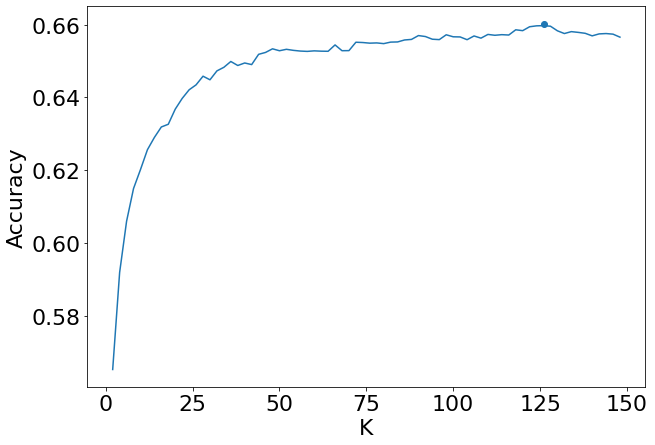

In [36]:
plt.plot(np.arange(2,150,2),r)
plt.scatter([126],[0.6602972499458791])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.savefig(r'img\\Models\\KNN_nghs _choose.pdf',bbox_inches='tight')

### SVM

In [12]:
columns_svm = ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_R',
  'player2_hand_R']

In [59]:
def tune_svm(columns):
    C = np.linspace(0.01,1,10)
    kernel = ['linear','poly','rbf','sigmoid']
    degree = [3,4,5,6]
    gamma = ['scale','auto']
    
    results = {}

    for k in kernel:
        for c in C:
            if k!= 'linear':
                for g in gamma:
                    if k == 'poly':
                        for d in degree:
                            sv = svm.SVC(C=c,kernel=k,gamma=g,degree=d)
                            res = check_performance_window_mean(sv, data_symmetric_enc, columns)
                            results[(c,k,g,d)] = res
                    else:
                        sv = svm.SVC(C=c,kernel=k,gamma=g)
                        res = check_performance_window_mean(sv, data_symmetric_enc, columns)
                        results[(c,k,g,'none')] = res
            else:
                sv = svm.SVC(C=c,kernel=k)
                res = check_performance_window_mean(sv, data_symmetric_enc, columns)
                results[(c,k,'none','none')] = res
    
    m = max(results.values())
    val = search(results, m)
    winsound.Beep(2500,1000)
    return val, m

In [60]:
tune_svm(columns_all)

((0.89, 'rbf', 'auto', 'none'), 0.666924845658678)

In [61]:
tune_svm(columns_svm)

((1.0, 'rbf', 'scale', 'none'), 0.6677018190028046)

In [62]:
tune_svm(columns_corr)

((0.67, 'rbf', 'scale', 'none'), 0.6606696536730347)

### DT

In [9]:
columns_dt = ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'player2_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_QF',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R']

In [42]:
def tune_dt(columns):
    criterions = ['gini','entropy']
    max_depths = [None, 3, 7, 12, 15]
    min_samples_splits = [2, 4, 8]
    max_features = [None, 'sqrt', 'log2']
    
    results = {}
    for c in criterions:
        for mx in max_depths:
            for mn in min_samples_splits:
                for mxf in max_features:
                    dt = tree.DecisionTreeClassifier(criterion=c,max_depth=mx,min_samples_split=mn,max_features=mxf)  

                    res = check_performance_window_mean(dt, data_symmetric_enc, columns)
                    results[(c,mx,mn,mxf)] = res
    
    m = max(results.values())
    val = search(results, m)
    return val, m

In [43]:
tune_dt(columns_all)

(('entropy', 7, 2, 'log2'), 0.6471087797131798)

In [44]:
tune_dt(columns_dt)

(('gini', 3, 2, None), 0.6469825155923726)

In [45]:
tune_dt(columns_corr)

(('entropy', 3, 2, None), 0.6471724457139436)

### NN

In [10]:
columns_nn = ['best_of',
  'year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_played',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'matches_won',
  'matches_lost',
  'consecutive_matches_won',
  'consecutive_matches_lost',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'first_serve_won',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Grass',
  'surface_Hard',
  'tourney_level_Grand Slam',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'tourney_level_Season-ending events',
  'round_F',
  'round_R128',
  'round_R16',
  'round_R32',
  'round_R64',
  'round_RR',
  'round_SF',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R']

In [39]:
    test_scores = []
    train_scores = []
    df = data_symmetric_enc
    for year in range(1999,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_all]
        X_train = X_train[columns_all]
        
        ann = Sequential()
        ann.add(Dense(512, activation="tanh",kernel_regularizer=regularizers.L1(0.00001)))
        ann.add(Dropout(0.4))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
        train_score = ann.evaluate(X_train,  y_train)[1]
        train_scores.append(train_score)
        
    np.mean(test_scores), np.mean(train_scores)

Epoch 1/40
738/738 [==============================] - 2s 1ms/step - loss: 0.6436 - accuracy: 0.6499
Epoch 2/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6309 - accuracy: 0.6590
Epoch 3/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6257 - accuracy: 0.6645
Epoch 4/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6230 - accuracy: 0.6661
Epoch 5/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6221 - accuracy: 0.6640
Epoch 6/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.6681
Epoch 7/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6195 - accuracy: 0.6659
Epoch 8/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6678
Epoch 9/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6171 - accuracy: 0.6646
Epoch 10/40
738/738 [==============================] - 1s 1ms/step - loss: 0.6159 - accuracy: 0.6670

689/689 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.6621
Epoch 38/40
689/689 [==============================] - 1s 1ms/step - loss: 0.6169 - accuracy: 0.6655
Epoch 39/40
689/689 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.6658
Epoch 40/40
689/689 [==============================] - 1s 925us/step - loss: 0.6120 - accuracy: 0.6691
Epoch 1/40
670/670 [==============================] - 1s 1ms/step - loss: 0.6525 - accuracy: 0.6416
Epoch 2/40
670/670 [==============================] - 1s 1ms/step - loss: 0.6392 - accuracy: 0.6511
Epoch 3/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6341 - accuracy: 0.6562
Epoch 4/40
670/670 [==============================] - 1s 1ms/step - loss: 0.6314 - accuracy: 0.6567
Epoch 5/40
670/670 [==============================] - 1s 1ms/step - loss: 0.6303 - accuracy: 0.6559
Epoch 6/40
670/670 [==============================] - 1s 1ms/step - loss: 0.6281 - accuracy: 0.6570
Epoch 

(0.6648647018841335, 0.6679789934839521)

In [110]:
    test_scores = []
    train_scores = []
    df = data_symmetric_enc
    for year in range(1999,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_nn]
        X_train = X_train[columns_nn]
        
        ann = Sequential()
        ann.add(Dense(512, activation="tanh",kernel_regularizer=regularizers.L1(0.00001)))
        ann.add(Dropout(0.4))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
        train_score = ann.evaluate(X_train,  y_train)[1]
        train_scores.append(train_score)
        
    np.mean(test_scores), np.mean(train_scores)

Epoch 1/40
738/738 [==============================] - 2s 2ms/step - loss: 0.6406 - accuracy: 0.6567
Epoch 2/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6296 - accuracy: 0.6619
Epoch 3/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6254 - accuracy: 0.6630
Epoch 4/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.6646
Epoch 5/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6217 - accuracy: 0.6662
Epoch 6/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6203 - accuracy: 0.6642
Epoch 7/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.6687
Epoch 8/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6183 - accuracy: 0.6683
Epoch 9/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6175 - accuracy: 0.6669
Epoch 10/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6161 - accuracy: 0.6671

689/689 [==============================] - 1s 2ms/step - loss: 0.6164 - accuracy: 0.6642
Epoch 38/40
689/689 [==============================] - 1s 2ms/step - loss: 0.6190 - accuracy: 0.6626
Epoch 39/40
689/689 [==============================] - 1s 2ms/step - loss: 0.6162 - accuracy: 0.6659
Epoch 40/40
689/689 [==============================] - 1s 938us/step - loss: 0.6118 - accuracy: 0.6680
Epoch 1/40
670/670 [==============================] - 2s 2ms/step - loss: 0.6505 - accuracy: 0.6449
Epoch 2/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6550
Epoch 3/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6330 - accuracy: 0.6531
Epoch 4/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.6552
Epoch 5/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.6558
Epoch 6/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.6588
Epoch 

(0.6646410397120884, 0.6684249213763646)

In [113]:
    test_scores = []
    train_scores = []
    df = data_symmetric_enc
    for year in range(1999,2006):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_corr]
        X_train = X_train[columns_corr]
        
        ann = Sequential()
        ann.add(Dense(512, activation="tanh",kernel_regularizer=regularizers.L1(0.00001)))
        ann.add(Dropout(0.4))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
        train_score = ann.evaluate(X_train,  y_train)[1]
        train_scores.append(train_score)
        
    np.mean(test_scores), np.mean(train_scores)

Epoch 1/40
738/738 [==============================] - 2s 2ms/step - loss: 0.6431 - accuracy: 0.6483
Epoch 2/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6329 - accuracy: 0.6607
Epoch 3/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6265 - accuracy: 0.6607
Epoch 4/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6247 - accuracy: 0.6599
Epoch 5/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6236 - accuracy: 0.6609
Epoch 6/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6213 - accuracy: 0.6631
Epoch 7/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6201 - accuracy: 0.6650
Epoch 8/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6187 - accuracy: 0.6657
Epoch 9/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6188 - accuracy: 0.6631
Epoch 10/40
738/738 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.6639

689/689 [==============================] - 1s 2ms/step - loss: 0.6202 - accuracy: 0.6585
Epoch 38/40
689/689 [==============================] - 1s 1ms/step - loss: 0.6209 - accuracy: 0.6598
Epoch 39/40
689/689 [==============================] - 1s 1ms/step - loss: 0.6211 - accuracy: 0.6588
Epoch 40/40
689/689 [==============================] - 1s 957us/step - loss: 0.6180 - accuracy: 0.6618
Epoch 1/40
670/670 [==============================] - 2s 2ms/step - loss: 0.6514 - accuracy: 0.6371
Epoch 2/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6401 - accuracy: 0.6480
Epoch 3/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6357 - accuracy: 0.6505
Epoch 4/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6323 - accuracy: 0.6519
Epoch 5/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.6537
Epoch 6/40
670/670 [==============================] - 1s 2ms/step - loss: 0.6301 - accuracy: 0.6541
Epoch 

(0.6609596269471305, 0.6639851672308785)

## Final models

In [16]:
columns_corr2 = columns_corr.copy()
columns_corr2.extend(['Y','target'])

In [17]:
targets = data_symmetric_enc[data_symmetric_enc['Y']>=2006]['target']

In [14]:
def check_performance_window_proba(clf, df):
    start = time.time()
    test_scores = []
    train_scores = []
    test_probas = []
    for year in range(2006,2024):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        #tutaj feature selection

        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        train_score = clf.score(X_train, y_train)
        test_scores.append(test_score)
        train_scores.append(train_score)
        
        test_proba = clf.predict_proba(X_test)
        test_probas.extend(test_proba)
    
    return test_scores, train_scores, np.array(test_probas), time.time()-start

### LR

In [23]:
#old
test, train = check_performance_window(lr, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.6810250653158627 0.684845580349064


In [24]:
#tune selection
columns_lr2 = columns_lr.copy()
columns_lr2.extend(['Y','target'])
test_lr, train_lr, test_lr_proba, time_lr = check_performance_window_proba(lr, data_symmetric_enc[columns_lr2])
print(np.mean(test_lr), np.mean(train_lr))

0.6812723696442774 0.684948204374276


### knn

In [69]:
#old
knn = KNeighborsClassifier(n_neighbors=3)
test, train = check_performance_window(knn, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.6168696576186246 0.8001731270092606


In [25]:
#tune selection
columns_knn2 = columns_knn.copy()
columns_knn2.extend(['Y','target'])
knn = KNeighborsClassifier(n_neighbors=126)
test_knn, train_knn, test_knn_proba, time_knn = check_performance_window_proba(knn, data_symmetric_enc[columns_knn2])
print(np.mean(test_knn), np.mean(train_knn))

0.6775663780576975 0.6864472903494886


### svm

In [16]:
#old
sv = svm.SVC()
test, train = check_performance_window(sv, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.6830779410017814 0.7184270921885485


In [15]:
#tune selection
columns_svm2 = columns_svm.copy()
columns_svm2.extend(['Y','target'])
sv = svm.SVC(C=1, kernel='rbf', gamma='scale',probability=True)
test_svm, train_svm, test_svm_proba, time_svm = check_performance_window_proba(sv, data_symmetric_enc[columns_svm2])
print(np.mean(test_svm), np.mean(train_svm))

0.6832075659382487 0.7175648344144147


### nb

In [27]:
columns_nb = ['year',
  'height',
  'age',
  'rank',
  'elo',
  'glicko',
  'RD',
  'tournaments_won',
  'games_won',
  'games_round_won',
  'games_tourney_won',
  'games_surface_won',
  'games_opponent_won',
  'games_hand_won',
  'consecutive_matches_won',
  'weeks_inactive',
  'games_played_last_weeks',
  'first_serve_in',
  'second_serve_won',
  'aces',
  'double_faults',
  'break_points_converted',
  'first_serve_return_won',
  'second_serve_return_won',
  'break_points_saved',
  'tiebreaks_won',
  'player1_home',
  'surface_Carpet',
  'surface_Clay',
  'surface_Hard',
  'tourney_level_Masters 1000',
  'tourney_level_Other',
  'round_QF',
  'round_R128',
  'round_R64',
  'player1_hand_L',
  'player1_hand_R',
  'player2_hand_L',
  'player2_hand_R']

In [76]:
#old
gnb = GaussianNB()
test, train = check_performance_window(gnb, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.6714150963258765 0.676363627994287


In [28]:
#tune selection
columns_nb2 = columns_nb.copy()
columns_nb2.extend(['Y','target'])
gnb = GaussianNB()
test_nb, train_nb, test_nb_proba, time_nb = check_performance_window_proba(gnb, data_symmetric_enc[columns_nb2])
print(np.mean(test_nb), np.mean(train_nb))

0.6755355694204307 0.6792749313541124


### xgboost

In [22]:
#old
xg = xgb.XGBClassifier(enable_categorical=True)
test, train = check_performance_window(xg, data_symmetric)
print(np.mean(test), np.mean(train))

0.6633499766249293 0.9107207788834807


In [29]:
#tune all
xg = xgb.XGBClassifier(enable_categorical=True,learning_rate=0.1,n_estimators=100,subsample=1,max_depth=3,min_samples_split=2)
test_xgb, train_xgb, test_xgb_proba, time_xgb = check_performance_window_proba(xg, data_symmetric)
print(np.mean(test_xgb), np.mean(train_xgb))

C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [08:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [08:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krych\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [08:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are

0.6828788584682108 0.7020392049524043


### dt

In [26]:
#old
dt = tree.DecisionTreeClassifier()  
test, train = check_performance_window(dt, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.5859625617219746 1.0


In [30]:
#tune corr
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, max_features=None) 
test_dt, train_dt, test_dt_proba, time_dt = check_performance_window_proba(dt, data_symmetric_enc[columns_corr2])
print(np.mean(test_dt), np.mean(train_dt))

0.6709026899035996 0.676760716004306


### rf

In [80]:
#old
rf = RandomForestClassifier()
test, train = check_performance_window(rf, data_symmetric_enc)
print(np.mean(test), np.mean(train))

0.678417865254594 1.0


In [31]:
#tune all
rf = RandomForestClassifier(criterion='gini',n_estimators=80,max_depth=8,min_samples_split=4,max_features='sqrt')
test_rf, train_rf, test_rf_proba, time_rf = check_performance_window_proba(rf, data_symmetric_enc)
print(np.mean(test_rf), np.mean(train_rf))

0.6810672765152919 0.7306297300514063


### nn

In [ ]:
#old 0.661485 0.742170

In [32]:
    #all features  
    test_scores = []
    train_scores = []
    test_nn_proba = []
    df = data_symmetric_enc
    start = time.time()
    for year in range(2006,2024):
        train = df[(df['Y']<year) & (df['Y']>=year-7)]
        test = df[df['Y']==year]
        train = train.drop(['Y'], axis=1)
        test = test.drop(['Y'], axis=1)

        X_train = train.drop(['target'], axis=1)
        y_train = train['target']

        X_test = test.drop(['target'], axis=1)
        y_test = test['target']

        X_test = X_test[columns_all]
        X_train = X_train[columns_all]
        
        ann = Sequential()
        ann.add(Dense(512, activation="tanh",kernel_regularizer=regularizers.L1(0.00001)))
        ann.add(Dropout(0.4))
        ann.add(Dense(1, activation="sigmoid"))

        ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        ann.fit(X_train, y_train, epochs=40, batch_size=32)
        
        test_score = ann.evaluate(X_test,  y_test)[1]
        test_scores.append(test_score)
        
        train_score = ann.evaluate(X_train,  y_train)[1]
        train_scores.append(train_score)
        
        test_nn_proba.extend(ann.predict(X_test))
    
    time_nn = time.time() - start
    test_nn = test_scores
    train_nn = train_scores
    np.mean(test_scores), np.mean(train_scores)



Epoch 1/40


628/628 [==============================] - 2s 1ms/step - loss: 0.6471 - accuracy: 0.6484
Epoch 2/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6334 - accuracy: 0.6559
Epoch 3/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6298 - accuracy: 0.6582
Epoch 4/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6266 - accuracy: 0.6601
Epoch 5/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6255 - accuracy: 0.6608
Epoch 6/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6242 - accuracy: 0.6601
Epoch 7/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6222 - accuracy: 0.6641
Epoch 8/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6205 - accuracy: 0.6620
Epoch 9/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6198 - accuracy: 0.6639
Epoch 10/40
628/628 [==============================] - 1s 1ms/step - loss: 0.6193 - accuracy: 0.

608/608 [==============================] - 1s 1ms/step - loss: 0.5995 - accuracy: 0.6807
Epoch 27/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5983 - accuracy: 0.6805
Epoch 28/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5999 - accuracy: 0.6794
Epoch 29/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5987 - accuracy: 0.6814
Epoch 30/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5975 - accuracy: 0.6826
Epoch 31/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6789
Epoch 32/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6813
Epoch 33/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.6797
Epoch 34/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5979 - accuracy: 0.6818
Epoch 35/40
608/608 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.6826
Ep

588/588 [==============================] - 1s 1ms/step - loss: 0.5823 - accuracy: 0.6965
Epoch 19/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5827 - accuracy: 0.6973
Epoch 20/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5830 - accuracy: 0.6960
Epoch 21/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5825 - accuracy: 0.6984
Epoch 22/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5837 - accuracy: 0.6963
Epoch 23/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5826 - accuracy: 0.6980
Epoch 24/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.6955
Epoch 25/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5823 - accuracy: 0.6966
Epoch 26/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.6973
Epoch 27/40
588/588 [==============================] - 1s 1ms/step - loss: 0.5817 - accuracy: 0.6966
Ep

562/562 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.7005
Epoch 11/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5817 - accuracy: 0.6991
Epoch 12/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.6991
Epoch 13/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5812 - accuracy: 0.6984
Epoch 14/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5811 - accuracy: 0.6968
Epoch 15/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5794 - accuracy: 0.6986
Epoch 16/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.6979
Epoch 17/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5796 - accuracy: 0.6986
Epoch 18/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5802 - accuracy: 0.6985
Epoch 19/40
562/562 [==============================] - 1s 1ms/step - loss: 0.5799 - accuracy: 0.6991
Ep

518/518 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6727
Epoch 3/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.6776
Epoch 4/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.6746
Epoch 5/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6074 - accuracy: 0.6767
Epoch 6/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6068 - accuracy: 0.6781
Epoch 7/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6779
Epoch 8/40
518/518 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.6762
Epoch 9/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6792
Epoch 10/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6797
Epoch 11/40
518/518 [==============================] - 1s 1ms/step - loss: 0.6006 - accuracy: 0.6786
Epoch 12/

(0.6820707188712226, 0.6911008523570167)

### mean season accuracy with boxplots

In [43]:
final_acc = pd.DataFrame()

In [44]:
final_acc['LR test'] = test_lr
final_acc['LR train'] = train_lr
final_acc['DT test'] = test_dt
final_acc['DT train'] = train_dt
final_acc['RF test'] = test_rf
final_acc['RF train'] = train_rf
final_acc['XGB test'] = test_xgb
final_acc['XGB train'] = train_xgb
final_acc['KNN test'] = test_knn
final_acc['KNN train'] = train_knn
final_acc['SVM test'] = test_svm
final_acc['SVM train'] = train_svm
final_acc['NB test'] = test_nb
final_acc['NB train'] = train_nb
final_acc['NN test'] = test_nn
final_acc['NN train'] = train_nn

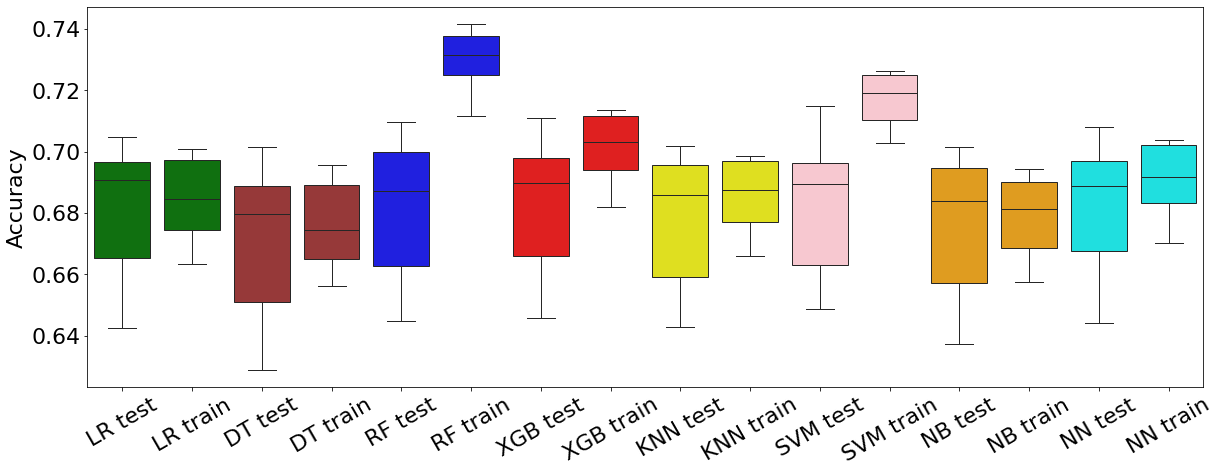

In [47]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
colors={'LR test':'green','LR train':'green','RF test':'blue','RF train':'blue',
        'XGB test':'red','XGB train':'red','KNN test':'yellow','KNN train':'yellow',
        'SVM test':'pink','SVM train':'pink','NB test':'orange','NB train':'orange',
        'NN test':'cyan','NN train':'cyan','DT test':'brown','DT train':'brown'}
sb.boxplot(final_acc,palette=colors)
plt.savefig(r'img\\Models\\final_models_boxplot_train_test.pdf',bbox_inches='tight')

In [48]:
final_acc.mean()

LR test      0.681272
LR train     0.684948
DT test      0.670903
DT train     0.676761
RF test      0.681067
RF train     0.730630
XGB test     0.682879
XGB train    0.702039
KNN test     0.677566
KNN train    0.686447
SVM test     0.681455
SVM train    0.716721
NB test      0.675536
NB train     0.679275
NN test      0.682071
NN train     0.691101
dtype: float64

### accuracy and log loss for all matches

In [56]:
lr_predicted_all = test_lr_proba[:,1]
dt_predicted_all = test_dt_proba[:,1]
rf_predicted_all = test_rf_proba[:,1]
xgb_predicted_all = test_xgb_proba[:,1]
knn_predicted_all = test_knn_proba[:,1]
svm_predicted_all = test_svm_proba[:,1]
nb_predicted_all = test_nb_proba[:,1]
nn_predicted_all = np.array(test_nn_proba)

In [61]:
print('accuracy lr: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in lr_predicted_all]))
print('accuracy dt: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in dt_predicted_all]))
print('accuracy rf: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in rf_predicted_all]))
print('accuracy xgb: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in xgb_predicted_all]))
print('accuracy knn: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in knn_predicted_all]))
print('accuracy svm: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in svm_predicted_all]))
print('accuracy nb: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in nb_predicted_all]))
print('accuracy nn: ', sklearn.metrics.accuracy_score(targets, [0 if x<0.5 else 1 for x in nn_predicted_all]))

accuracy lr:  0.6821583300512013
accuracy dt:  0.6718743162224848
accuracy rf:  0.6821802109316879
accuracy xgb:  0.6836243490438055
accuracy knn:  0.6788324362172334
accuracy svm:  0.6821364491707146
accuracy nb:  0.676600586407597
accuracy nn:  0.6828803991072601


In [64]:
print('log loss lr: ', sklearn.metrics.log_loss(targets, lr_predicted_all))
print('log loss dt: ', sklearn.metrics.log_loss(targets, dt_predicted_all))
print('log loss rf: ', sklearn.metrics.log_loss(targets, rf_predicted_all))
print('log loss xgb: ', sklearn.metrics.log_loss(targets, xgb_predicted_all))
print('log loss knn: ', sklearn.metrics.log_loss(targets, knn_predicted_all))
print('log loss svm: ', sklearn.metrics.log_loss(targets, svm_predicted_all))
print('log loss nb: ', sklearn.metrics.log_loss(targets, nb_predicted_all))
print('log loss nn: ', sklearn.metrics.log_loss(targets,  nn_predicted_all))

log loss lr:  0.5896774828018997
log loss dt:  0.608207968318786
log loss rf:  0.5910495788678398
log loss xgb:  0.588941078489567
log loss knn:  0.5966867773549498
log loss svm:  0.6001825925692739
log loss nb:  1.0903083504041868
log loss nn:  0.5880725945300288


In [81]:
prob_hist = pd.DataFrame()
prob_hist['nb'] = nb_predicted_all
prob_hist['nn'] = nn_predicted_all
prob_hist['target'] = targets

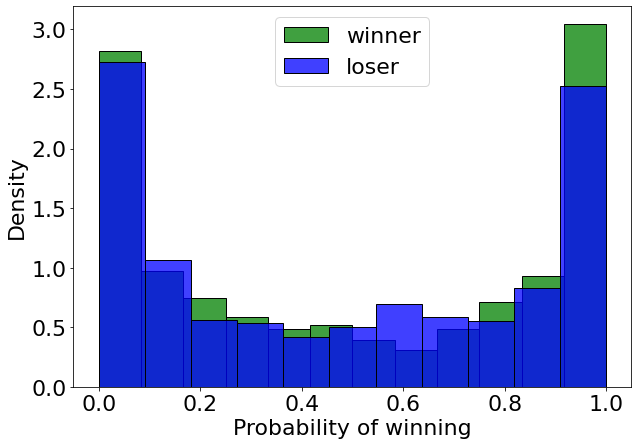

In [92]:
sb.histplot(prob_hist[prob_hist['target']==1]['nb'],stat='density',label='winner',color='green')
sb.histplot(prob_hist[prob_hist['target']==0]['nb'],stat='density',label='loser',color='blue')
plt.xlabel('Probability of winning')
plt.legend()
plt.savefig(r'img\\Models\\histogram_prob_winning_nb.pdf',bbox_inches='tight')

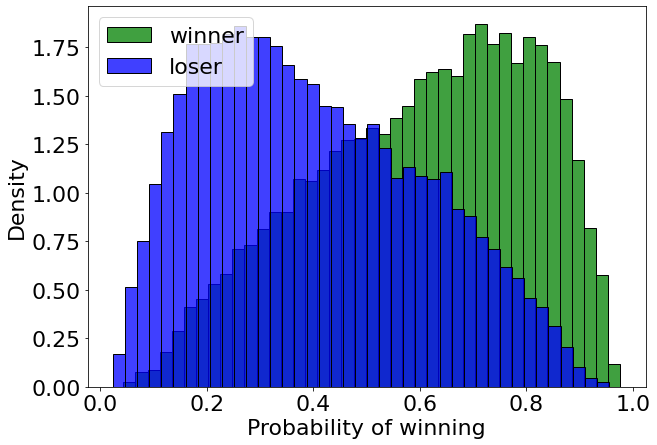

In [10]:
sb.histplot(prob_hist[prob_hist['target']==1]['nn'],stat='density',label='winner',color='green')
sb.histplot(prob_hist[prob_hist['target']==0]['nn'],stat='density',label='loser',color='blue')
plt.xlabel('Probability of winning')
plt.legend()
plt.savefig(r'img\\Models\\histogram_prob_winning_nn.pdf',bbox_inches='tight')

### confusion matrix

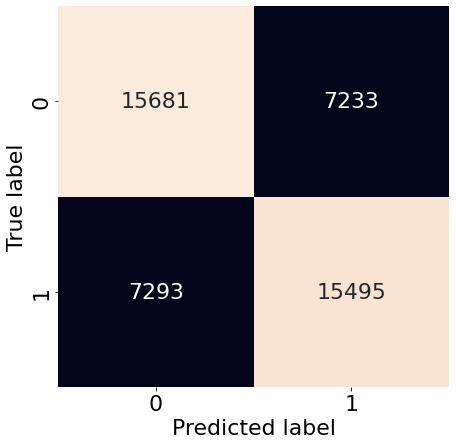

In [148]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in lr_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_lr.pdf',bbox_inches='tight')

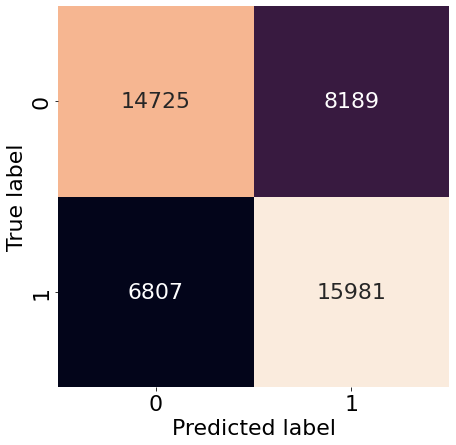

In [149]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in dt_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_dt.pdf',bbox_inches='tight')

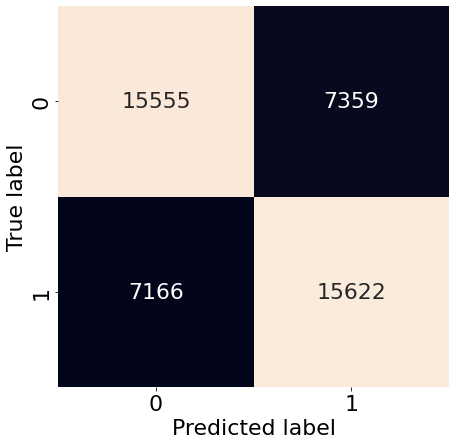

In [150]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in rf_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_rf.pdf',bbox_inches='tight')

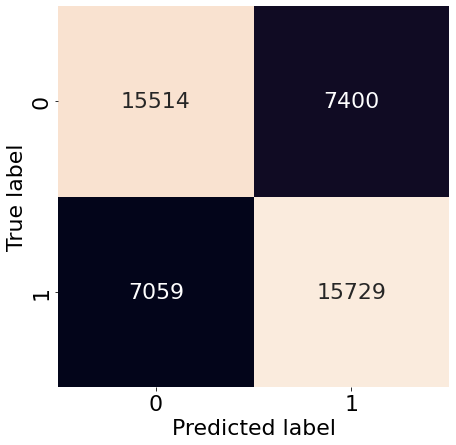

In [151]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in xgb_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_xgb.pdf',bbox_inches='tight')

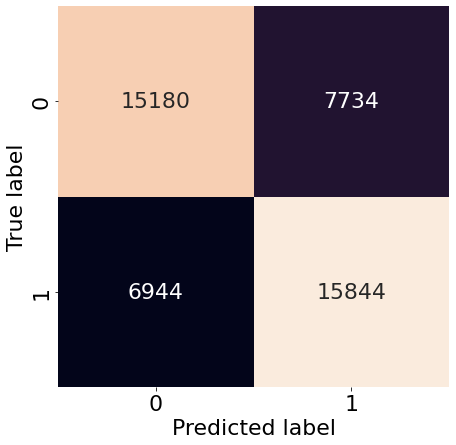

In [152]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in knn_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_knn.pdf',bbox_inches='tight')

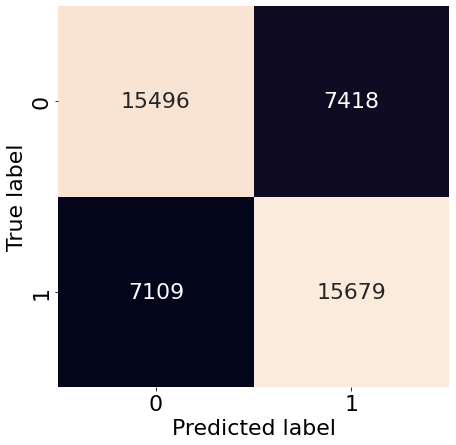

In [153]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in svm_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_svm.pdf',bbox_inches='tight')

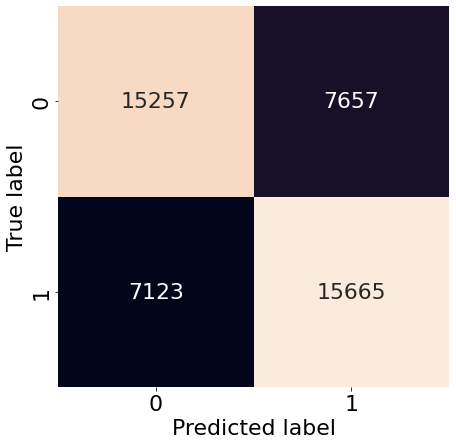

In [154]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in nb_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_nb.pdf',bbox_inches='tight')

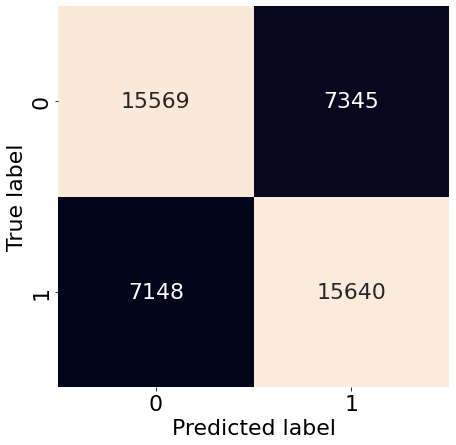

In [155]:
cm = sklearn.metrics.confusion_matrix(targets, [0 if x<0.5 else 1 for x in nn_predicted_all])
plt.figure(figsize=(7,7))
sb.heatmap(cm,annot=True, fmt=".0f",cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(r'img\\Models\\confusion_matrix_nn.pdf',bbox_inches='tight')

### ROC

In [103]:
fpr_lr, tpr_lr, thresholds_lr = sklearn.metrics.roc_curve(targets, lr_predicted_all)
fpr_dt, tpr_dt, thresholds_dt = sklearn.metrics.roc_curve(targets, dt_predicted_all)
fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(targets, rf_predicted_all)
fpr_xgb, tpr_xgb, thresholds_xgb = sklearn.metrics.roc_curve(targets, xgb_predicted_all)
fpr_knn, tpr_knn, thresholds_knn = sklearn.metrics.roc_curve(targets, knn_predicted_all)
fpr_svm, tpr_svm, thresholds_svm = sklearn.metrics.roc_curve(targets, svm_predicted_all)
fpr_nb, tpr_nb, thresholds_nb = sklearn.metrics.roc_curve(targets, nb_predicted_all)
fpr_nn, tpr_nn, thresholds_nn = sklearn.metrics.roc_curve(targets, nn_predicted_all)

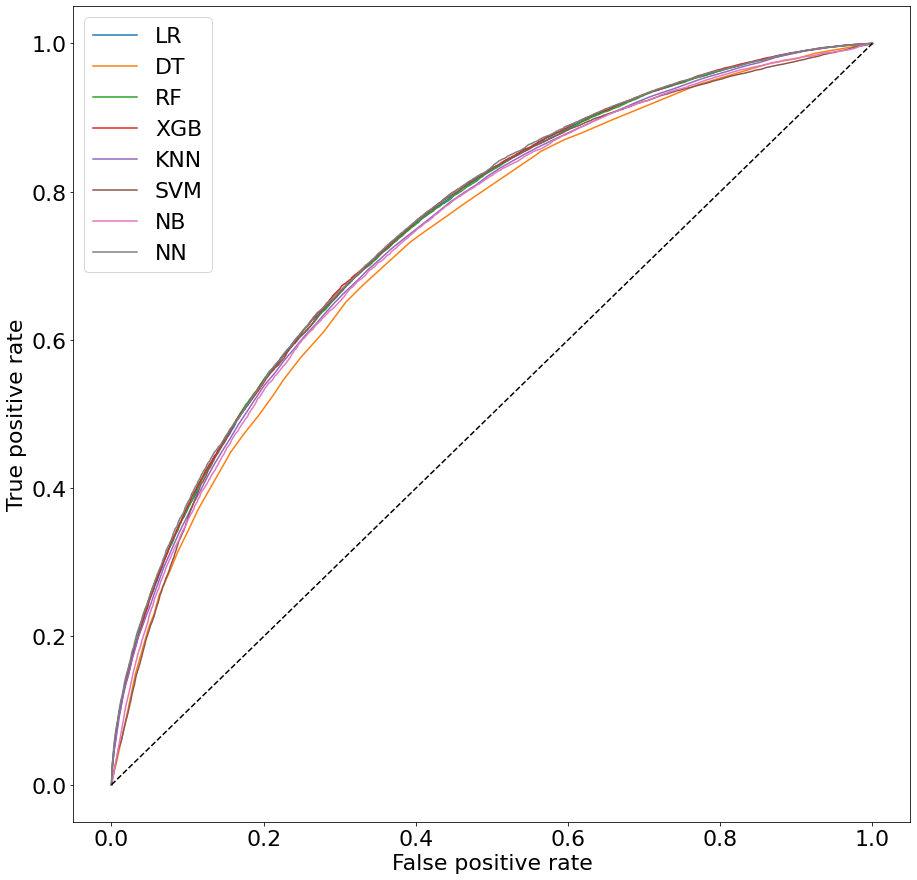

In [118]:
plt.figure(figsize=(15,15))
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_dt, tpr_dt, label='DT')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_xgb, tpr_xgb, label='XGB')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='NB')
plt.plot(fpr_nn, tpr_nn, label='NN')
plt.plot([0,1], [0,1],color='black',linestyle='--')
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.savefig(r'img\\Models\\ROC.pdf',bbox_inches='tight')

In [123]:
print('AUC lr: ', sklearn.metrics.roc_auc_score(targets, lr_predicted_all))
print('AUC dt: ', sklearn.metrics.roc_auc_score(targets, dt_predicted_all))
print('AUC rf: ', sklearn.metrics.roc_auc_score(targets, rf_predicted_all))
print('AUC xgb: ', sklearn.metrics.roc_auc_score(targets, xgb_predicted_all))
print('AUC knn: ', sklearn.metrics.roc_auc_score(targets, knn_predicted_all))
print('AUC svm: ', sklearn.metrics.roc_auc_score(targets, svm_predicted_all))
print('AUC nb: ', sklearn.metrics.roc_auc_score(targets, nb_predicted_all))
print('AUC nn: ', sklearn.metrics.roc_auc_score(targets, nn_predicted_all))

AUC lr:  0.7501640116169428
AUC dt:  0.7304831289171871
AUC rf:  0.7497114720029311
AUC xgb:  0.751335917815221
AUC knn:  0.7444722908558011
AUC svm:  0.7426818177772085
AUC nb:  0.7394968725088775
AUC nn:  0.7526209474263645


### Calibration curves

In [166]:
probabilities_all_models = pd.DataFrame()
probabilities_all_models['lr'] = lr_predicted_all
probabilities_all_models['dt'] = dt_predicted_all
probabilities_all_models['rf'] = rf_predicted_all
probabilities_all_models['xgb'] = xgb_predicted_all
probabilities_all_models['knn'] = knn_predicted_all
probabilities_all_models['svm'] = svm_predicted_all
probabilities_all_models['nb'] = nb_predicted_all
probabilities_all_models['nn'] = nn_predicted_all
probabilities_all_models['target'] = np.array(targets)

In [191]:
probabilities_all_models.to_csv('probabilities.csv')

In [18]:
probabilities_all_models = pd.read_csv('probabilities.csv')

In [199]:
idx = np.linspace(0,1,20)

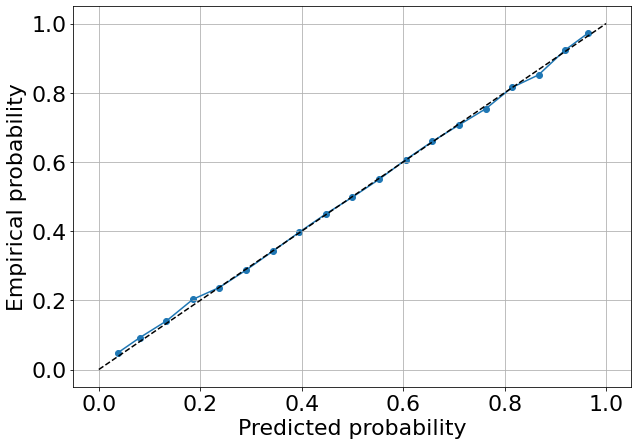

In [200]:
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['lr']>idx[i-1]) 
                                 & (probabilities_all_models['lr']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['lr'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_lr.pdf')

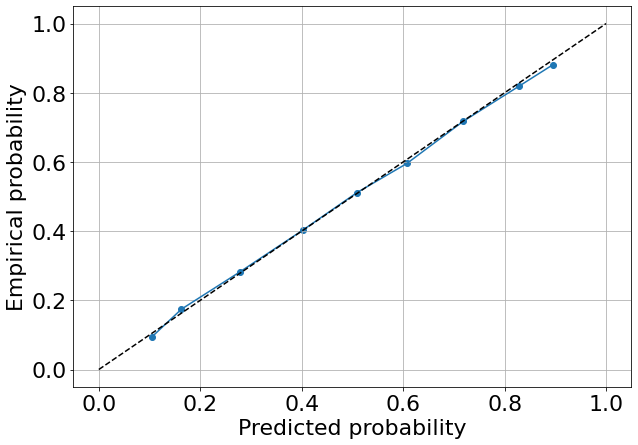

In [190]:
idx = np.linspace(0,1,10)
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['dt']>idx[i-1]) 
                                 & (probabilities_all_models['dt']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['dt'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_dt.pdf')

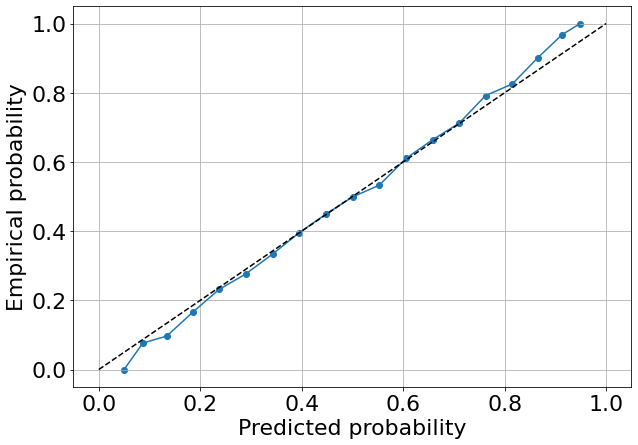

In [198]:
idx = np.linspace(0,1,20)
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['rf']>idx[i-1]) 
                                 & (probabilities_all_models['rf']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['rf'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_rf.pdf')

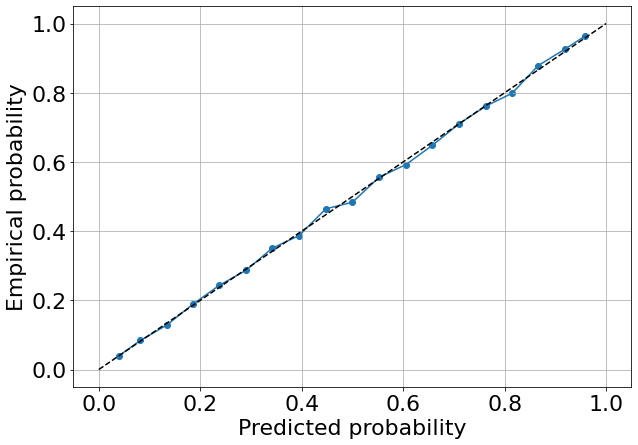

In [201]:
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['xgb']>idx[i-1]) 
                                 & (probabilities_all_models['xgb']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['xgb'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_xgb.pdf')

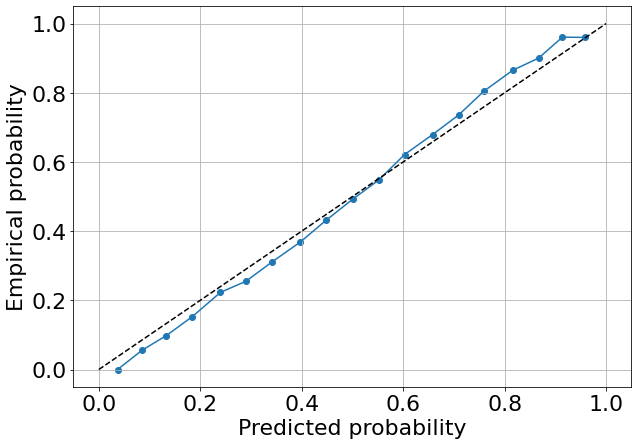

In [202]:
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['knn']>idx[i-1]) 
                                 & (probabilities_all_models['knn']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['knn'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_knn.pdf')

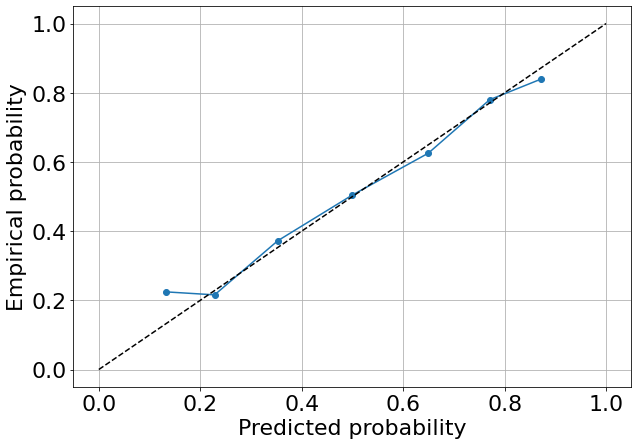

In [24]:
idx = np.linspace(0,1,8)
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['svm']>idx[i-1]) 
                                 & (probabilities_all_models['svm']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['svm'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_svm.pdf')

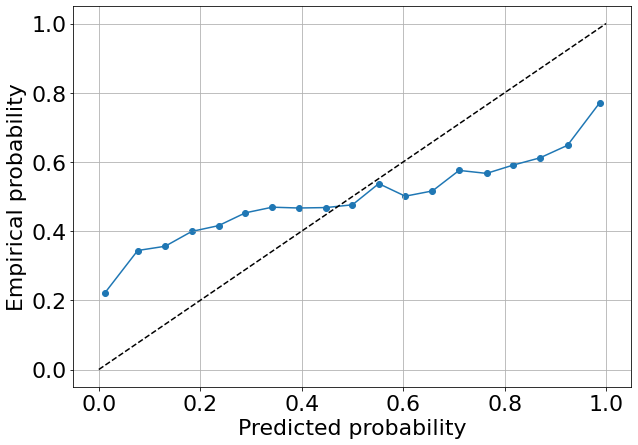

In [213]:
idx = np.linspace(0,1,20)
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['nb']>idx[i-1]) 
                                 & (probabilities_all_models['nb']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['nb'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_nb.pdf')

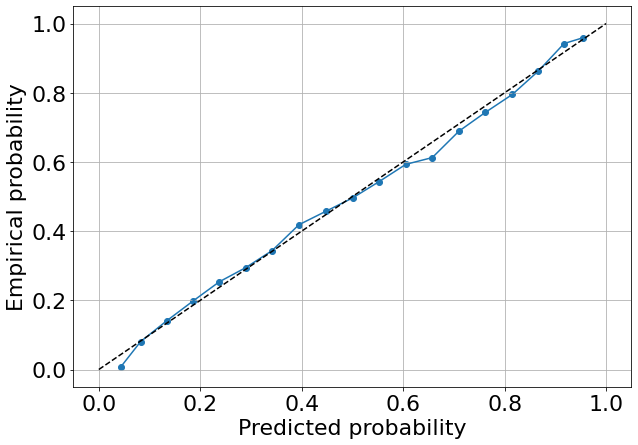

In [214]:
idx = np.linspace(0,1,20)
ps = []
mean= []
for i in range(1,len(idx)):
    a = probabilities_all_models[(probabilities_all_models['nn']>idx[i-1]) 
                                 & (probabilities_all_models['nn']<idx[i])]
    b = a[a['target']==1]
    ps.append(len(b)/len(a))
    mean.append(a['nn'].mean())
    
plt.plot(mean,ps)
plt.scatter(mean,ps)
plt.plot([0,1],[0,1],ls='--',color='black')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.savefig(r'img\\Models\\calibration_curve_nn.pdf')

### time

In [95]:
print('time lr: ', time_lr)
print('time dt: ', time_dt)
print('time rf: ', time_rf)
print('time xgb: ', time_xgb)
print('time knn: ', time_knn)
print('time svm: ', time_svm)
print('time nb: ', time_nb)
print('time nn: ', time_nn)

time lr:  3.7339894771575928
time dt:  2.6201610565185547
time rf:  46.558977365493774
time xgb:  3.456782579421997
time knn:  142.19002509117126
time svm:  2767.4274792671204
time nb:  0.789865255355835
time nn:  623.381064414978


### accuracy for grand slams

In [85]:
prob = pd.read_csv('probabilities.csv')

In [86]:
prob

Unnamed: 0        lr        dt        rf       xgb       knn       svm  \
0               0  0.087305  0.225231  0.171999  0.112969  0.206349  0.228601   
1               1  0.056469  0.225231  0.142397  0.115798  0.182540  0.339950   
2               2  0.757797  0.786872  0.721776  0.795358  0.706349  0.719718   
3               3  0.592925  0.679356  0.529526  0.609789  0.531746  0.521284   
4               4  0.311400  0.225231  0.328846  0.393705  0.444444  0.279601   
...           ...       ...       ...       ...       ...       ...       ...   
45697       45697  0.467406  0.184996  0.293899  0.296400  0.317460  0.407484   
45698       45698  0.421505  0.280492  0.323004  0.372660  0.309524  0.318473   
45699       45699  0.600939  0.539627  0.520587  0.571016  0.579365  0.551608   
45700       45700  0.267615  0.280492  0.241602  0.226520  0.285714  0.214870   
45701       45701  0.622213  0.539627  0.663121  0.663859  0.674603  0.678288   

             nb        nn  target  
0      0.000775  0.085689       0  
1      0.000037  0.075196       0  
2      0.993379  0.772762       1  
3      0.451472  0.585825       0  
4      0.048482  0.317850       0  
...         ...       ...     ...  
45697  0.040143  0.386848       0  
45698  0.127806  0.357164       0  
45699  0.787487  0.619967       1  
45700  0.022349  0.281778       0  
45701  0.972996  0.721116       0  

[45702 rows x 10 columns]

In [94]:
a = data_symmetric[data_symmetric['Y']>2005]['tourney_level'].reset_index()

In [97]:
con = pd.concat([prob,a], axis=1)

In [101]:
gs = con[con['tourney_level']=='Grand Slam']
ngs = con[con['tourney_level']!='Grand Slam']

In [102]:
ngs

Unnamed: 0        lr        dt        rf       xgb       knn       svm  \
0               0  0.087305  0.225231  0.171999  0.112969  0.206349  0.228601   
1               1  0.056469  0.225231  0.142397  0.115798  0.182540  0.339950   
2               2  0.757797  0.786872  0.721776  0.795358  0.706349  0.719718   
3               3  0.592925  0.679356  0.529526  0.609789  0.531746  0.521284   
4               4  0.311400  0.225231  0.328846  0.393705  0.444444  0.279601   
...           ...       ...       ...       ...       ...       ...       ...   
45697       45697  0.467406  0.184996  0.293899  0.296400  0.317460  0.407484   
45698       45698  0.421505  0.280492  0.323004  0.372660  0.309524  0.318473   
45699       45699  0.600939  0.539627  0.520587  0.571016  0.579365  0.551608   
45700       45700  0.267615  0.280492  0.241602  0.226520  0.285714  0.214870   
45701       45701  0.622213  0.539627  0.663121  0.663859  0.674603  0.678288   

             nb        nn  target  index         tourney_level  
0      0.000775  0.085689       0  43661                 Other  
1      0.000037  0.075196       0  43662                 Other  
2      0.993379  0.772762       1  43663                 Other  
3      0.451472  0.585825       0  43664                 Other  
4      0.048482  0.317850       0  43665                 Other  
...         ...       ...     ...    ...                   ...  
45697  0.040143  0.386848       0  89358  Season-ending events  
45698  0.127806  0.357164       0  89359  Season-ending events  
45699  0.787487  0.619967       1  89360  Season-ending events  
45700  0.022349  0.281778       0  89361  Season-ending events  
45701  0.972996  0.721116       0  89362  Season-ending events  

[37057 rows x 12 columns]

In [104]:
print('accuracy lr: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['lr']]))
print('accuracy dt: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['dt']]))
print('accuracy rf: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['rf']]))
print('accuracy xgb: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['xgb']]))
print('accuracy knn: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['knn']]))
print('accuracy svm: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['svm']]))
print('accuracy nb: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['nb']]))
print('accuracy nn: ', sklearn.metrics.accuracy_score(gs['target'], [0 if x<0.5 else 1 for x in gs['nn']]))

accuracy lr:  0.7482938114517061
accuracy dt:  0.7383458646616541
accuracy rf:  0.7477154424522846
accuracy xgb:  0.7513013302486987
accuracy knn:  0.7435511856564488
accuracy svm:  0.7459803354540196
accuracy nb:  0.7428571428571429
accuracy nn:  0.7500289184499711


In [105]:
print('accuracy lr: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['lr']]))
print('accuracy dt: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['dt']]))
print('accuracy rf: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['rf']]))
print('accuracy xgb: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['xgb']]))
print('accuracy knn: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['knn']]))
print('accuracy svm: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['svm']]))
print('accuracy nb: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['nb']]))
print('accuracy nn: ', sklearn.metrics.accuracy_score(ngs['target'], [0 if x<0.5 else 1 for x in ngs['nn']]))

accuracy lr:  0.6667296327279596
accuracy dt:  0.6563672180694605
accuracy rf:  0.6668915454569987
accuracy xgb:  0.6678360363763931
accuracy knn:  0.6637342472407373
accuracy svm:  0.6672423563699166
accuracy nb:  0.6611436435761124
accuracy nn:  0.6672153709150768
